In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import tensorflow as tf
print(tf.__version__)

2.12.0


# 第一份資料集

# PLT

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing1/Test Data_A1.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_PLT_Label = test_array[:,131]
test_PLT_Label[test_PLT_Label==2]=1
print(test_Features.shape)
print(test_PLT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_PLT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_PLT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_PLT_Label.shape)
cm = pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
1   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
2   2022-08-01     A1    6143  0.000000  0.000000  0.003050  0.011153   
3   2022-09-07     A1    6143  0.000000  0.000000  0.001971  0.008043   
4   2022-08-01     A2    6143  0.148252  0.126552  0.111723  0.096499   
..         ...    ...     ...       ...       ...       ...       ...   
533 2022-12-01     A2  359647  0.142292  0.122239  0.107776  0.093027   
534 2022-12-01     A3  359647  0.165795  0.144012  0.124862  0.113425   
535 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
536 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
537 2022-12-01     A3  359647  0.166244  0.144433  0.125244  0.113740   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.013494  0.017496  0.020375  ...   2

Predict    0   1
Labels          
0        279  64
1        113  82

In [19]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 279 TN: 82 FP: 64 FN: 113


Accuracy=  0.671003717472119
Precision=  0.8134110787172012
Recall=  0.7117346938775511
F1 Score=  0.7591836734693878


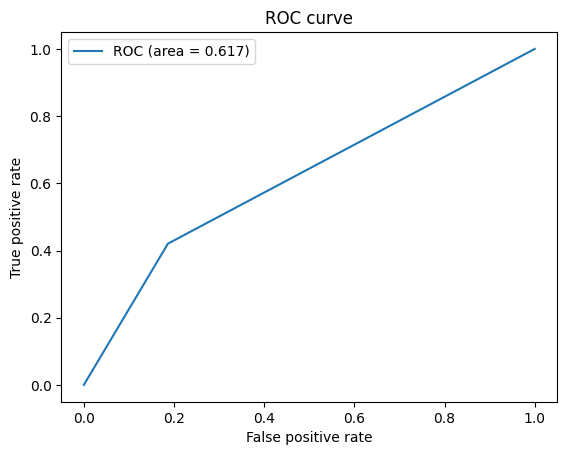

In [20]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_PLT_Label = test_PLT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_PLT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Aug.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_PLT_Label = test_array[:,131]
test_PLT_Label[test_PLT_Label==2]=1
print(test_Features.shape)
print(test_PLT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_PLT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_PLT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_PLT_Label.shape)
cm = pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400  405       410       415       420  \
0   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003031  0.007161   
1   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
2   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
3   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002464  0.005865   
4   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002149  0.005068   
..         ...    ...     ...  ...  ...       ...       ...       ...   
216 2022-08-01     A1  347741  0.0  0.0  0.000889  0.007565  0.013659   
217 2022-08-01     A1  347741  0.0  0.0  0.000487  0.006754  0.012784   
218 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005869  0.011827   
219 2022-08-01     A1  347741  0.0  0.0  0.000135  0.006321  0.012129   
220 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005827  0.012498   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  TIBC  Fer  
0    0.012492  0.018056  ...   2  0    0  

Predict   0    1
Labels          
0        67   32
1        21  101

In [22]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 67 TN: 101 FP: 32 FN: 21


Accuracy=  0.7601809954751131
Precision=  0.6767676767676768
Recall=  0.7613636363636364
F1 Score=  0.716577540106952


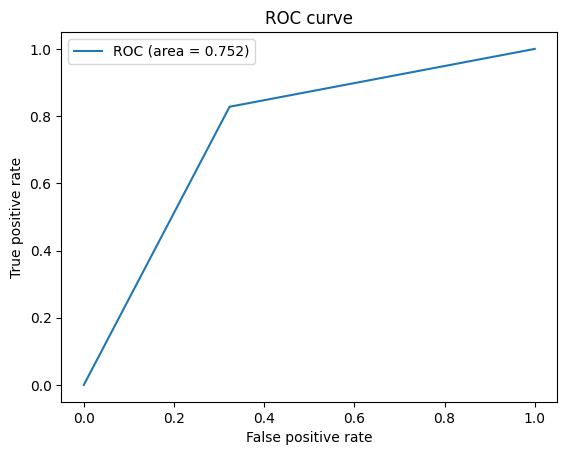

In [23]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_PLT_Label = test_PLT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_PLT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Sep.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_PLT_Label = test_array[:,131]
test_PLT_Label[test_PLT_Label==2]=1
print(test_Features.shape)
print(test_PLT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_PLT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_PLT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_PLT_Label.shape)
cm = pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400       405       410       415       420  \
0   2022-09-07     A1    6143  0.0  0.000000  0.003416  0.011628  0.016787   
1   2022-09-07     A1    6143  0.0  0.000000  0.003301  0.011208  0.016189   
2   2022-09-07     A1    6143  0.0  0.000000  0.002383  0.009399  0.014325   
3   2022-09-07     A1    6143  0.0  0.000000  0.002479  0.009670  0.014610   
4   2022-09-07     A1    6143  0.0  0.000000  0.002516  0.009545  0.014401   
..         ...    ...     ...  ...       ...       ...       ...       ...   
253 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
254 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
255 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
256 2022-09-07     A1  347741  0.0  0.002485  0.010546  0.020140  0.024983   
257 2022-09-07     A1  347741  0.0  0.002077  0.010145  0.019789  0.024635   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  

Predict   0    1
Labels          
0        70  110
1        11   67

In [25]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 70 TN: 67 FP: 110 FN: 11


Accuracy=  0.5310077519379846
Precision=  0.3888888888888889
Recall=  0.8641975308641975
F1 Score=  0.5363984674329502


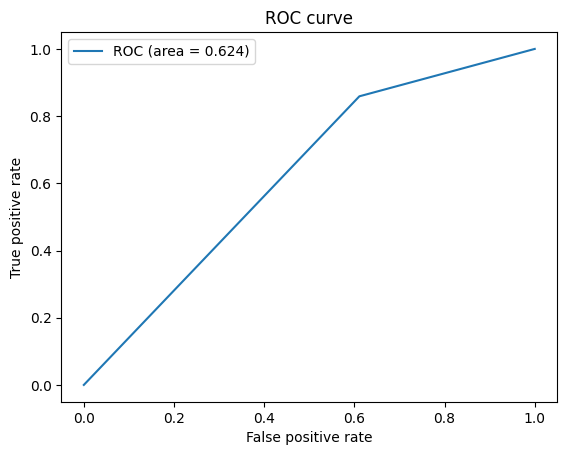

In [26]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_PLT_Label = test_PLT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_PLT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Oct.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_PLT_Label = test_array[:,131]
test_PLT_Label[test_PLT_Label==2]=1
print(test_Features.shape)
print(test_PLT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_PLT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_PLT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_PLT_Label.shape)
cm = pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
1   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
2   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
3   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
4   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
..         ...    ...     ...       ...       ...       ...       ...   
376 2022-10-07     A1  359546  0.004586  0.003429  0.004329  0.004247   
377 2022-10-07     A1  359546  0.004455  0.003365  0.004407  0.004348   
378 2022-10-07     A1  359546  0.004338  0.003259  0.004238  0.004265   
379 2022-10-07     A1  359546  0.004308  0.003270  0.004318  0.004397   
380 2022-10-07     A1  359546  0.004849  0.003680  0.004640  0.004422   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.002593  0.003662  0.006147  ...   0

Predict    0    1
Labels           
0        153   53
1         48  127

In [28]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 153 TN: 127 FP: 53 FN: 48


Accuracy=  0.7349081364829396
Precision=  0.7427184466019418
Recall=  0.7611940298507462
F1 Score=  0.7518427518427517


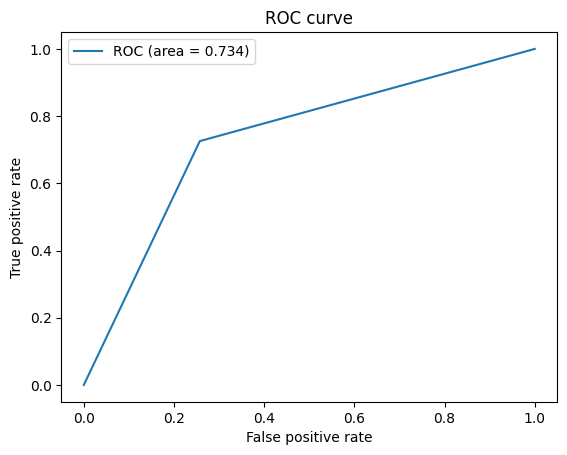

In [29]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_PLT_Label = test_PLT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_PLT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Dec.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_PLT_Label = test_array[:,131]
test_PLT_Label[test_PLT_Label==2]=1
print(test_Features.shape)
print(test_PLT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_PLT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_PLT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_PLT_Label.shape)
cm = pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-12-01     A1   14833  0.000000  0.001545  0.008297  0.015744   
1   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
2   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
3   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
4   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
..         ...    ...     ...       ...       ...       ...       ...   
944 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
945 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
946 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
947 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
948 2022-12-01     A1  349435  0.001541  0.000655  0.002853  0.004389   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.018307  0.017876  0.016148  ...   2

Predict    0    1
Labels           
0        365  284
1        123  177

In [31]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 365 TN: 177 FP: 284 FN: 123


Accuracy=  0.571127502634352
Precision=  0.5624036979969184
Recall=  0.7479508196721312
F1 Score=  0.6420404573438875


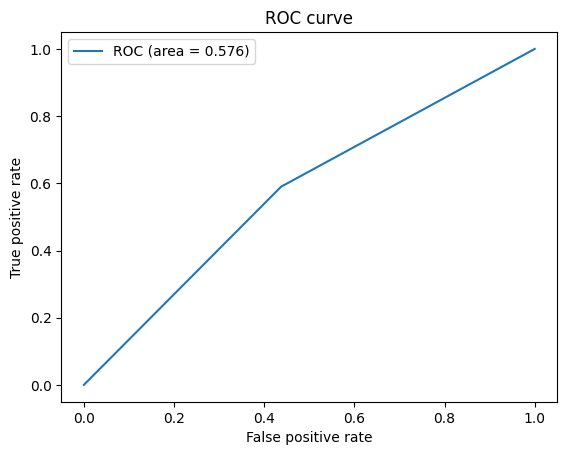

In [32]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_PLT_Label = test_PLT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_PLT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [33]:
import tensorflow as tf
from keras.backend import clear_session

# Clear previous session
clear_session()
tf.keras.backend.clear_session()

# Delete previous model
del model

# Pro

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing1/Test Data_A1.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Pro_Label = test_array[:,150]
test_Pro_Label[test_Pro_Label==2]=1
print(test_Features.shape)
print(test_Pro_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Pro_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_Pro.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Pro_Label.shape)
cm = pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
1   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
2   2022-08-01     A1    6143  0.000000  0.000000  0.003050  0.011153   
3   2022-09-07     A1    6143  0.000000  0.000000  0.001971  0.008043   
4   2022-08-01     A2    6143  0.148252  0.126552  0.111723  0.096499   
..         ...    ...     ...       ...       ...       ...       ...   
533 2022-12-01     A2  359647  0.142292  0.122239  0.107776  0.093027   
534 2022-12-01     A3  359647  0.165795  0.144012  0.124862  0.113425   
535 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
536 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
537 2022-12-01     A3  359647  0.166244  0.144433  0.125244  0.113740   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.013494  0.017496  0.020375  ...   2

Predict    0    1
Labels           
0        235   88
1         95  120

In [95]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 235 TN: 120 FP: 88 FN: 95


Accuracy=  0.6598513011152416
Precision=  0.7275541795665634
Recall=  0.7121212121212122
F1 Score=  0.7197549770290964


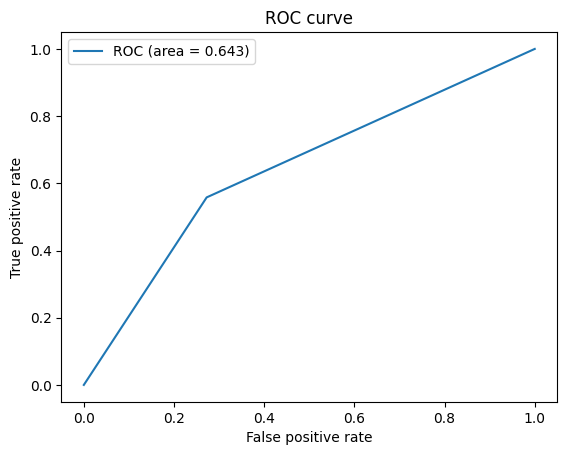

In [96]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Pro_Label = test_Pro_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Pro_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Aug.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Pro_Label = test_array[:,150]
test_Pro_Label[test_Pro_Label==2]=1
print(test_Features.shape)
print(test_Pro_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Pro_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_Pro.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Pro_Label.shape)
cm = pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400  405       410       415       420  \
0   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003031  0.007161   
1   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
2   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
3   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002464  0.005865   
4   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002149  0.005068   
..         ...    ...     ...  ...  ...       ...       ...       ...   
216 2022-08-01     A1  347741  0.0  0.0  0.000889  0.007565  0.013659   
217 2022-08-01     A1  347741  0.0  0.0  0.000487  0.006754  0.012784   
218 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005869  0.011827   
219 2022-08-01     A1  347741  0.0  0.0  0.000135  0.006321  0.012129   
220 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005827  0.012498   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  TIBC  Fer  
0    0.012492  0.018056  ...   2  0    0  

Predict   0   1
Labels         
0        94  80
1        24  23

In [98]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 94 TN: 23 FP: 80 FN: 24


Accuracy=  0.5294117647058824
Precision=  0.5402298850574713
Recall=  0.7966101694915254
F1 Score=  0.6438356164383562


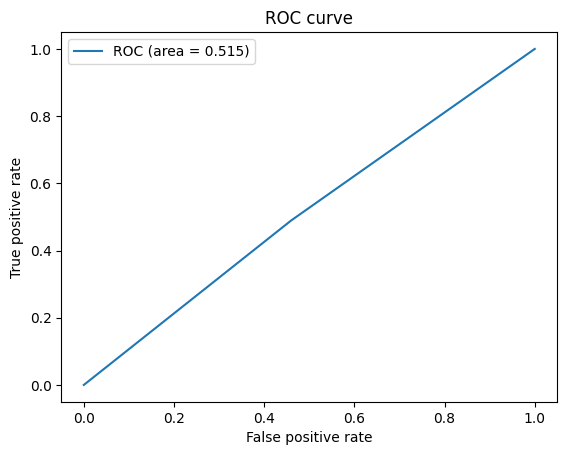

In [99]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Pro_Label = test_Pro_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Pro_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Sep.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Pro_Label = test_array[:,150]
test_Pro_Label[test_Pro_Label==2]=1
print(test_Features.shape)
print(test_Pro_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Pro_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_Pro.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Pro_Label.shape)
cm = pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400       405       410       415       420  \
0   2022-09-07     A1    6143  0.0  0.000000  0.003416  0.011628  0.016787   
1   2022-09-07     A1    6143  0.0  0.000000  0.003301  0.011208  0.016189   
2   2022-09-07     A1    6143  0.0  0.000000  0.002383  0.009399  0.014325   
3   2022-09-07     A1    6143  0.0  0.000000  0.002479  0.009670  0.014610   
4   2022-09-07     A1    6143  0.0  0.000000  0.002516  0.009545  0.014401   
..         ...    ...     ...  ...       ...       ...       ...       ...   
253 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
254 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
255 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
256 2022-09-07     A1  347741  0.0  0.002485  0.010546  0.020140  0.024983   
257 2022-09-07     A1  347741  0.0  0.002077  0.010145  0.019789  0.024635   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  

Predict   0    1
Labels          
0        82  100
1        58   18

In [101]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 82 TN: 18 FP: 100 FN: 58


Accuracy=  0.3875968992248062
Precision=  0.45054945054945056
Recall=  0.5857142857142857
F1 Score=  0.5093167701863354


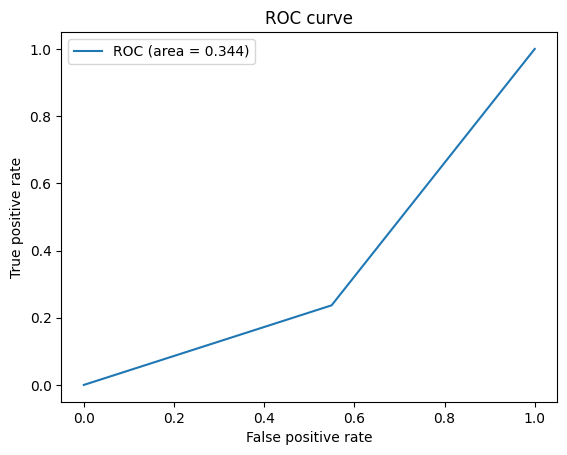

In [102]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Pro_Label = test_Pro_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Pro_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Oct.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Pro_Label = test_array[:,150]
test_Pro_Label[test_Pro_Label==2]=1
print(test_Features.shape)
print(test_Pro_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Pro_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_Pro.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Pro_Label.shape)
cm = pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
1   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
2   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
3   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
4   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
..         ...    ...     ...       ...       ...       ...       ...   
376 2022-10-07     A1  359546  0.004586  0.003429  0.004329  0.004247   
377 2022-10-07     A1  359546  0.004455  0.003365  0.004407  0.004348   
378 2022-10-07     A1  359546  0.004338  0.003259  0.004238  0.004265   
379 2022-10-07     A1  359546  0.004308  0.003270  0.004318  0.004397   
380 2022-10-07     A1  359546  0.004849  0.003680  0.004640  0.004422   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.002593  0.003662  0.006147  ...   0

Predict    0    1
Labels           
0        159  117
1         16   89

In [104]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 159 TN: 89 FP: 117 FN: 16


Accuracy=  0.6509186351706037
Precision=  0.5760869565217391
Recall=  0.9085714285714286
F1 Score=  0.70509977827051


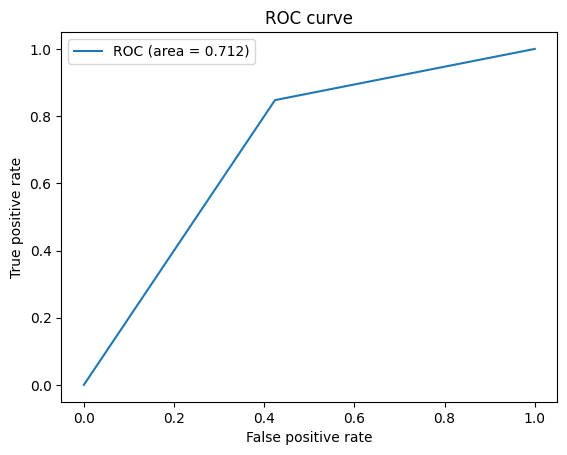

In [105]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Pro_Label = test_Pro_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Pro_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Dec.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Pro_Label = test_array[:,150]
test_Pro_Label[test_Pro_Label==2]=1
print(test_Features.shape)
print(test_Pro_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Pro_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_Pro.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Pro_Label.shape)
cm = pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-12-01     A1   14833  0.000000  0.001545  0.008297  0.015744   
1   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
2   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
3   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
4   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
..         ...    ...     ...       ...       ...       ...       ...   
944 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
945 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
946 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
947 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
948 2022-12-01     A1  349435  0.001541  0.000655  0.002853  0.004389   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.018307  0.017876  0.016148  ...   2

Predict    0    1
Labels           
0        200  299
1         92  358

In [107]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 200 TN: 358 FP: 299 FN: 92


Accuracy=  0.5879873551106428
Precision=  0.40080160320641284
Recall=  0.684931506849315
F1 Score=  0.5056890012642224


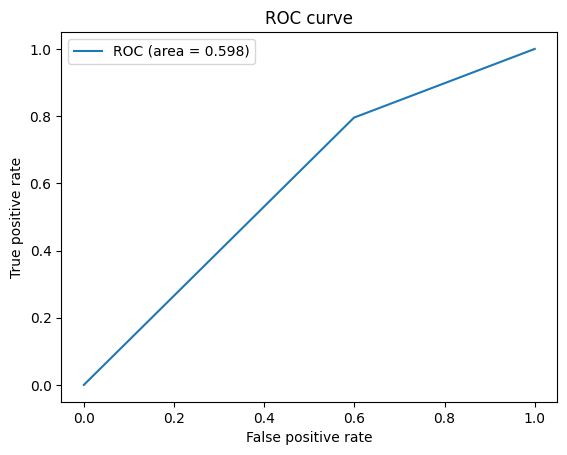

In [108]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Pro_Label = test_Pro_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Pro_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [109]:
import tensorflow as tf
from keras.backend import clear_session

# Clear previous session
clear_session()
tf.keras.backend.clear_session()

# Delete previous model
del model

# Ca

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing1/Test Data_A1.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Ca_Label = test_array[:,146]
test_Ca_Label[test_Ca_Label==2]=1
print(test_Features.shape)
print(test_Ca_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Ca_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_Ca.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Ca_Label.shape)
cm = pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
1   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
2   2022-08-01     A1    6143  0.000000  0.000000  0.003050  0.011153   
3   2022-09-07     A1    6143  0.000000  0.000000  0.001971  0.008043   
4   2022-08-01     A2    6143  0.148252  0.126552  0.111723  0.096499   
..         ...    ...     ...       ...       ...       ...       ...   
533 2022-12-01     A2  359647  0.142292  0.122239  0.107776  0.093027   
534 2022-12-01     A3  359647  0.165795  0.144012  0.124862  0.113425   
535 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
536 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
537 2022-12-01     A3  359647  0.166244  0.144433  0.125244  0.113740   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.013494  0.017496  0.020375  ...   2

Predict    0   1
Labels          
0        301  36
1        117  84

In [111]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 301 TN: 84 FP: 36 FN: 117


Accuracy=  0.7156133828996283
Precision=  0.8931750741839762
Recall=  0.7200956937799043
F1 Score=  0.7973509933774835


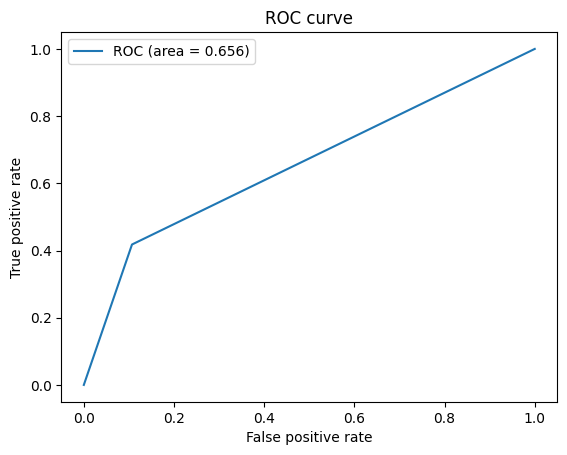

In [112]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Ca_Label = test_Ca_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Ca_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Aug.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Ca_Label = test_array[:,146]
test_Ca_Label[test_Ca_Label==2]=1
print(test_Features.shape)
print(test_Ca_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Ca_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_Ca.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Ca_Label.shape)
cm = pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400  405       410       415       420  \
0   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003031  0.007161   
1   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
2   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
3   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002464  0.005865   
4   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002149  0.005068   
..         ...    ...     ...  ...  ...       ...       ...       ...   
216 2022-08-01     A1  347741  0.0  0.0  0.000889  0.007565  0.013659   
217 2022-08-01     A1  347741  0.0  0.0  0.000487  0.006754  0.012784   
218 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005869  0.011827   
219 2022-08-01     A1  347741  0.0  0.0  0.000135  0.006321  0.012129   
220 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005827  0.012498   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  TIBC  Fer  
0    0.012492  0.018056  ...   2  0    0  

Predict   0   1
Labels         
0        78  47
1        60  36

In [114]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 78 TN: 36 FP: 47 FN: 60


Accuracy=  0.5158371040723982
Precision=  0.624
Recall=  0.5652173913043478
F1 Score=  0.5931558935361216


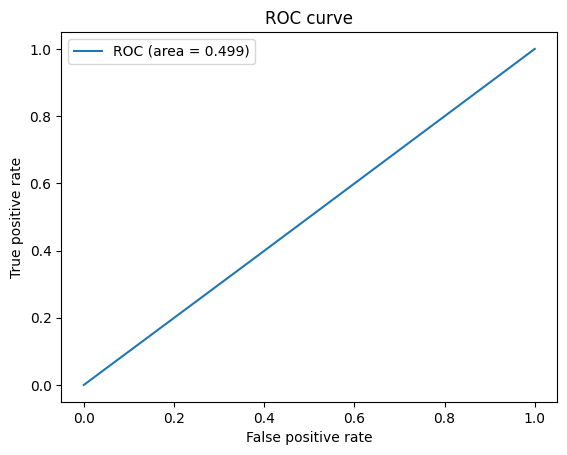

In [115]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Ca_Label = test_Ca_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Ca_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Sep.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Ca_Label = test_array[:,146]
test_Ca_Label[test_Ca_Label==2]=1
print(test_Features.shape)
print(test_Ca_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Ca_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_Ca.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Ca_Label.shape)
cm = pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400       405       410       415       420  \
0   2022-09-07     A1    6143  0.0  0.000000  0.003416  0.011628  0.016787   
1   2022-09-07     A1    6143  0.0  0.000000  0.003301  0.011208  0.016189   
2   2022-09-07     A1    6143  0.0  0.000000  0.002383  0.009399  0.014325   
3   2022-09-07     A1    6143  0.0  0.000000  0.002479  0.009670  0.014610   
4   2022-09-07     A1    6143  0.0  0.000000  0.002516  0.009545  0.014401   
..         ...    ...     ...  ...       ...       ...       ...       ...   
253 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
254 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
255 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
256 2022-09-07     A1  347741  0.0  0.002485  0.010546  0.020140  0.024983   
257 2022-09-07     A1  347741  0.0  0.002077  0.010145  0.019789  0.024635   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  

Predict    0   1
Labels          
0        114  16
1         73  55

In [117]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 114 TN: 55 FP: 16 FN: 73


Accuracy=  0.6550387596899225
Precision=  0.8769230769230769
Recall=  0.6096256684491979
F1 Score=  0.7192429022082019


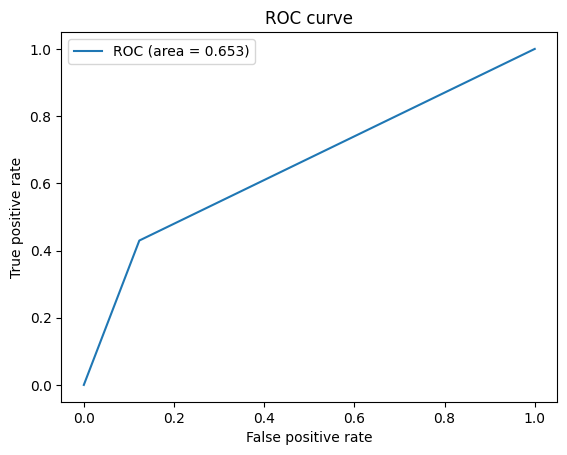

In [118]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Ca_Label = test_Ca_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Ca_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Oct.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Ca_Label = test_array[:,146]
test_Ca_Label[test_Ca_Label==2]=1
print(test_Features.shape)
print(test_Ca_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Ca_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_Ca.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Ca_Label.shape)
cm = pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
1   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
2   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
3   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
4   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
..         ...    ...     ...       ...       ...       ...       ...   
376 2022-10-07     A1  359546  0.004586  0.003429  0.004329  0.004247   
377 2022-10-07     A1  359546  0.004455  0.003365  0.004407  0.004348   
378 2022-10-07     A1  359546  0.004338  0.003259  0.004238  0.004265   
379 2022-10-07     A1  359546  0.004308  0.003270  0.004318  0.004397   
380 2022-10-07     A1  359546  0.004849  0.003680  0.004640  0.004422   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.002593  0.003662  0.006147  ...   0

Predict    0    1
Labels           
0        205   23
1         50  103

In [120]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 205 TN: 103 FP: 23 FN: 50


Accuracy=  0.8083989501312336
Precision=  0.8991228070175439
Recall=  0.803921568627451
F1 Score=  0.8488612836438924


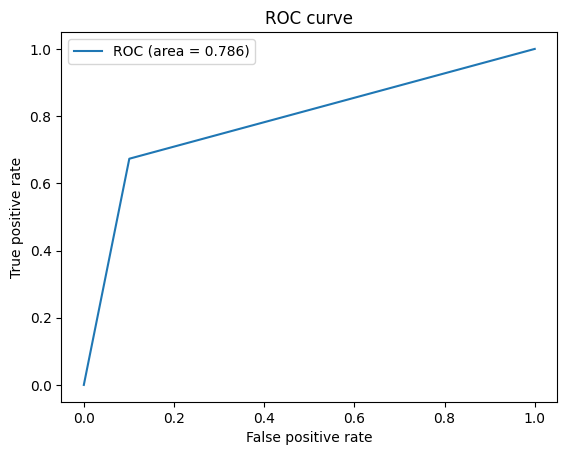

In [121]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Ca_Label = test_Ca_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Ca_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Dec.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Ca_Label = test_array[:,146]
test_Ca_Label[test_Ca_Label==2]=1
print(test_Features.shape)
print(test_Ca_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Ca_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_Ca.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Ca_Label.shape)
cm = pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-12-01     A1   14833  0.000000  0.001545  0.008297  0.015744   
1   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
2   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
3   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
4   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
..         ...    ...     ...       ...       ...       ...       ...   
944 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
945 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
946 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
947 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
948 2022-12-01     A1  349435  0.001541  0.000655  0.002853  0.004389   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.018307  0.017876  0.016148  ...   2

Predict    0    1
Labels           
0        521  178
1         50  200

In [123]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 521 TN: 200 FP: 178 FN: 50


Accuracy=  0.7597471022128557
Precision=  0.7453505007153076
Recall=  0.9124343257443083
F1 Score=  0.820472440944882


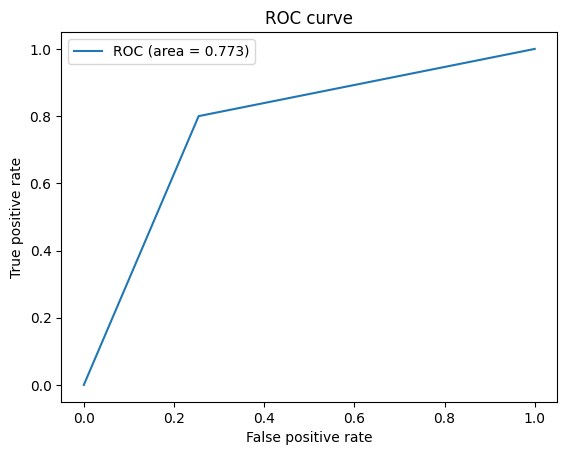

In [124]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Ca_Label = test_Ca_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Ca_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [125]:
import tensorflow as tf
from keras.backend import clear_session

# Clear previous session
clear_session()
tf.keras.backend.clear_session()

# Delete previous model
del model

# P

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing1/Test Data_A1.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_P_Label = test_array[:,147]
test_P_Label[test_P_Label==2]=1
print(test_Features.shape)
print(test_P_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_P_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_P.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_P_Label.shape)
cm = pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
1   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
2   2022-08-01     A1    6143  0.000000  0.000000  0.003050  0.011153   
3   2022-09-07     A1    6143  0.000000  0.000000  0.001971  0.008043   
4   2022-08-01     A2    6143  0.148252  0.126552  0.111723  0.096499   
..         ...    ...     ...       ...       ...       ...       ...   
533 2022-12-01     A2  359647  0.142292  0.122239  0.107776  0.093027   
534 2022-12-01     A3  359647  0.165795  0.144012  0.124862  0.113425   
535 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
536 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
537 2022-12-01     A3  359647  0.166244  0.144433  0.125244  0.113740   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.013494  0.017496  0.020375  ...   2

Predict    0    1
Labels           
0        135  136
1         60  207

In [127]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 135 TN: 207 FP: 136 FN: 60


Accuracy=  0.6356877323420075
Precision=  0.4981549815498155
Recall=  0.6923076923076923
F1 Score=  0.5793991416309013


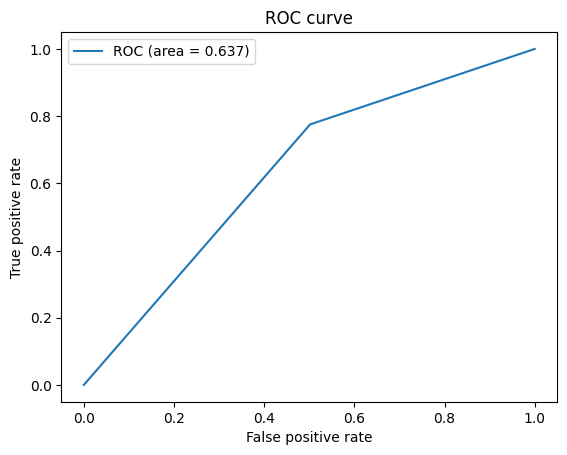

In [128]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_P_Label = test_P_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_P_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Aug.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_P_Label = test_array[:,147]
test_P_Label[test_P_Label==2]=1
print(test_Features.shape)
print(test_P_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_P_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_P.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_P_Label.shape)
cm = pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400  405       410       415       420  \
0   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003031  0.007161   
1   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
2   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
3   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002464  0.005865   
4   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002149  0.005068   
..         ...    ...     ...  ...  ...       ...       ...       ...   
216 2022-08-01     A1  347741  0.0  0.0  0.000889  0.007565  0.013659   
217 2022-08-01     A1  347741  0.0  0.0  0.000487  0.006754  0.012784   
218 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005869  0.011827   
219 2022-08-01     A1  347741  0.0  0.0  0.000135  0.006321  0.012129   
220 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005827  0.012498   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  TIBC  Fer  
0    0.012492  0.018056  ...   2  0    0  

Predict   0   1
Labels         
0        25  97
1        21  78

In [130]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 25 TN: 78 FP: 97 FN: 21


Accuracy=  0.4660633484162896
Precision=  0.20491803278688525
Recall=  0.5434782608695652
F1 Score=  0.2976190476190476


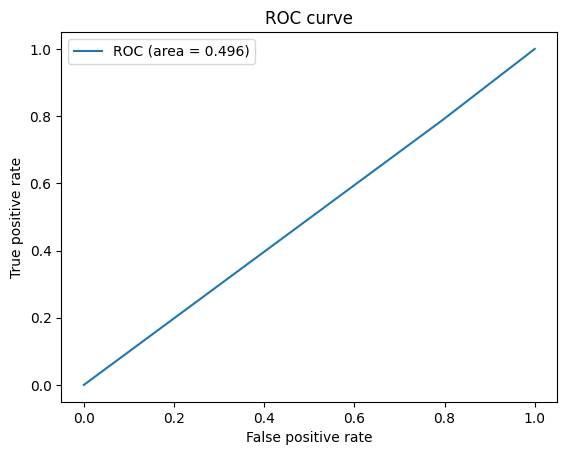

In [131]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_P_Label = test_P_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_P_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Sep.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_P_Label = test_array[:,147]
test_P_Label[test_P_Label==2]=1
print(test_Features.shape)
print(test_P_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_P_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_P.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_P_Label.shape)
cm = pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400       405       410       415       420  \
0   2022-09-07     A1    6143  0.0  0.000000  0.003416  0.011628  0.016787   
1   2022-09-07     A1    6143  0.0  0.000000  0.003301  0.011208  0.016189   
2   2022-09-07     A1    6143  0.0  0.000000  0.002383  0.009399  0.014325   
3   2022-09-07     A1    6143  0.0  0.000000  0.002479  0.009670  0.014610   
4   2022-09-07     A1    6143  0.0  0.000000  0.002516  0.009545  0.014401   
..         ...    ...     ...  ...       ...       ...       ...       ...   
253 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
254 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
255 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
256 2022-09-07     A1  347741  0.0  0.002485  0.010546  0.020140  0.024983   
257 2022-09-07     A1  347741  0.0  0.002077  0.010145  0.019789  0.024635   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  

Predict   0    1
Labels          
0        55   73
1        27  103

In [133]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 55 TN: 103 FP: 73 FN: 27


Accuracy=  0.6124031007751938
Precision=  0.4296875
Recall=  0.6707317073170732
F1 Score=  0.5238095238095238


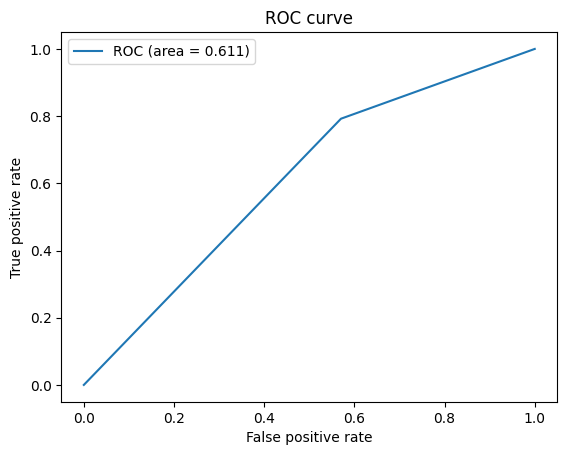

In [134]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_P_Label = test_P_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_P_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Oct.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_P_Label = test_array[:,147]
test_P_Label[test_P_Label==2]=1
print(test_Features.shape)
print(test_P_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_P_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_P.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_P_Label.shape)
cm = pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
1   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
2   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
3   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
4   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
..         ...    ...     ...       ...       ...       ...       ...   
376 2022-10-07     A1  359546  0.004586  0.003429  0.004329  0.004247   
377 2022-10-07     A1  359546  0.004455  0.003365  0.004407  0.004348   
378 2022-10-07     A1  359546  0.004338  0.003259  0.004238  0.004265   
379 2022-10-07     A1  359546  0.004308  0.003270  0.004318  0.004397   
380 2022-10-07     A1  359546  0.004849  0.003680  0.004640  0.004422   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.002593  0.003662  0.006147  ...   0

Predict   0    1
Labels          
0        28  150
1        25  178

In [136]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 28 TN: 178 FP: 150 FN: 25


Accuracy=  0.5406824146981627
Precision=  0.15730337078651685
Recall=  0.5283018867924528
F1 Score=  0.24242424242424243


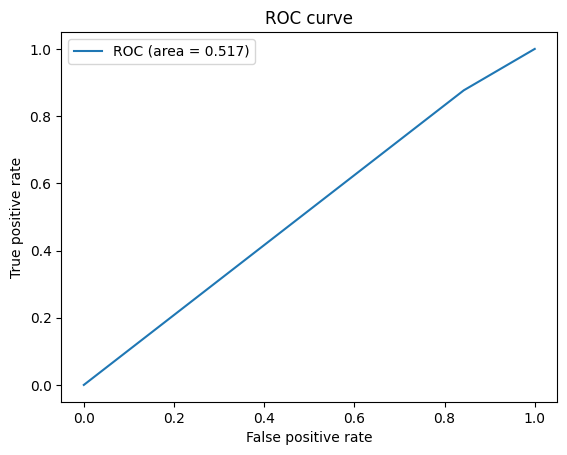

In [137]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_P_Label = test_P_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_P_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Dec.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_P_Label = test_array[:,147]
test_P_Label[test_P_Label==2]=1
print(test_Features.shape)
print(test_P_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_P_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_P.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_P_Label.shape)
cm = pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-12-01     A1   14833  0.000000  0.001545  0.008297  0.015744   
1   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
2   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
3   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
4   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
..         ...    ...     ...       ...       ...       ...       ...   
944 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
945 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
946 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
947 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
948 2022-12-01     A1  349435  0.001541  0.000655  0.002853  0.004389   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.018307  0.017876  0.016148  ...   2

Predict    0    1
Labels           
0        122  303
1         42  482

In [139]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 122 TN: 482 FP: 303 FN: 42


Accuracy=  0.6364594309799789
Precision=  0.28705882352941176
Recall=  0.7439024390243902
F1 Score=  0.41426146010186754


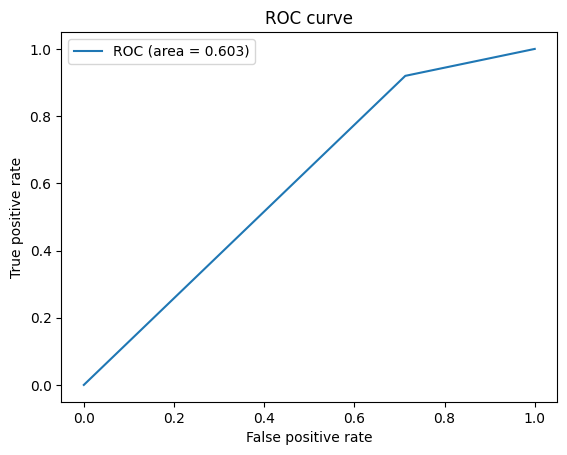

In [140]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_P_Label = test_P_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_P_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [141]:
import tensorflow as tf
from keras.backend import clear_session

# Clear previous session
clear_session()
tf.keras.backend.clear_session()

# Delete previous model
del model

# RBC

In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing1/Test Data_A1.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_RBC.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
cm = pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
1   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
2   2022-08-01     A1    6143  0.000000  0.000000  0.003050  0.011153   
3   2022-09-07     A1    6143  0.000000  0.000000  0.001971  0.008043   
4   2022-08-01     A2    6143  0.148252  0.126552  0.111723  0.096499   
..         ...    ...     ...       ...       ...       ...       ...   
533 2022-12-01     A2  359647  0.142292  0.122239  0.107776  0.093027   
534 2022-12-01     A3  359647  0.165795  0.144012  0.124862  0.113425   
535 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
536 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
537 2022-12-01     A3  359647  0.166244  0.144433  0.125244  0.113740   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.013494  0.017496  0.020375  ...   2

Predict    0    1
Labels           
0        156   76
1        118  188

In [143]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 156 TN: 188 FP: 76 FN: 118


Accuracy=  0.6394052044609665
Precision=  0.6724137931034483
Recall=  0.5693430656934306
F1 Score=  0.616600790513834


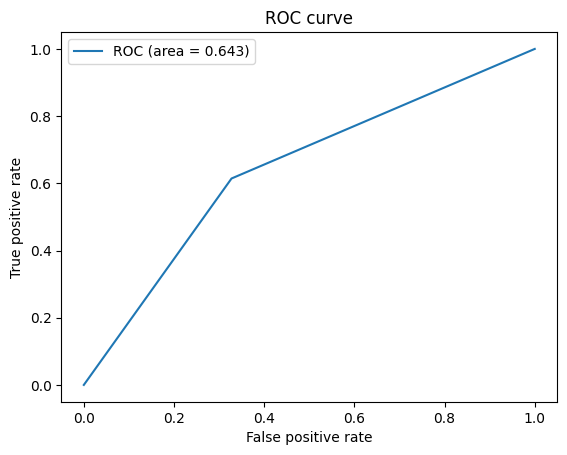

In [144]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_RBC_Label = test_RBC_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_RBC_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Aug.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_RBC.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
cm = pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400  405       410       415       420  \
0   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003031  0.007161   
1   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
2   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
3   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002464  0.005865   
4   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002149  0.005068   
..         ...    ...     ...  ...  ...       ...       ...       ...   
216 2022-08-01     A1  347741  0.0  0.0  0.000889  0.007565  0.013659   
217 2022-08-01     A1  347741  0.0  0.0  0.000487  0.006754  0.012784   
218 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005869  0.011827   
219 2022-08-01     A1  347741  0.0  0.0  0.000135  0.006321  0.012129   
220 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005827  0.012498   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  TIBC  Fer  
0    0.012492  0.018056  ...   2  0    0  

Predict    0   1
Labels          
0         26  49
1        132  14

In [146]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 26 TN: 14 FP: 49 FN: 132


Accuracy=  0.18099547511312217
Precision=  0.3466666666666667
Recall=  0.16455696202531644
F1 Score=  0.22317596566523604


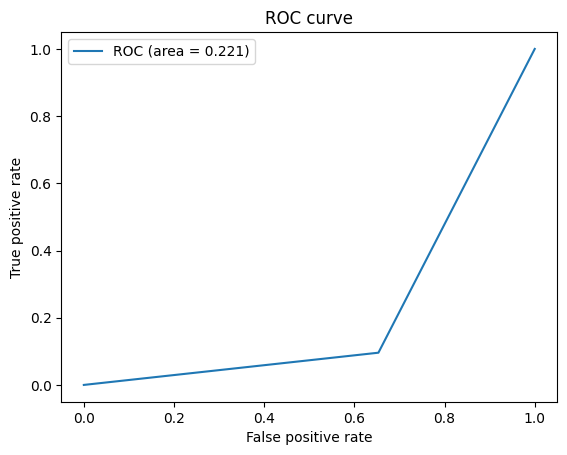

In [147]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_RBC_Label = test_RBC_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_RBC_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Sep.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_RBC.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
cm = pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400       405       410       415       420  \
0   2022-09-07     A1    6143  0.0  0.000000  0.003416  0.011628  0.016787   
1   2022-09-07     A1    6143  0.0  0.000000  0.003301  0.011208  0.016189   
2   2022-09-07     A1    6143  0.0  0.000000  0.002383  0.009399  0.014325   
3   2022-09-07     A1    6143  0.0  0.000000  0.002479  0.009670  0.014610   
4   2022-09-07     A1    6143  0.0  0.000000  0.002516  0.009545  0.014401   
..         ...    ...     ...  ...       ...       ...       ...       ...   
253 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
254 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
255 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
256 2022-09-07     A1  347741  0.0  0.002485  0.010546  0.020140  0.024983   
257 2022-09-07     A1  347741  0.0  0.002077  0.010145  0.019789  0.024635   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  

Predict    0   1
Labels          
0         76  54
1        102  26

In [149]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 76 TN: 26 FP: 54 FN: 102


Accuracy=  0.3953488372093023
Precision=  0.5846153846153846
Recall=  0.42696629213483145
F1 Score=  0.49350649350649356


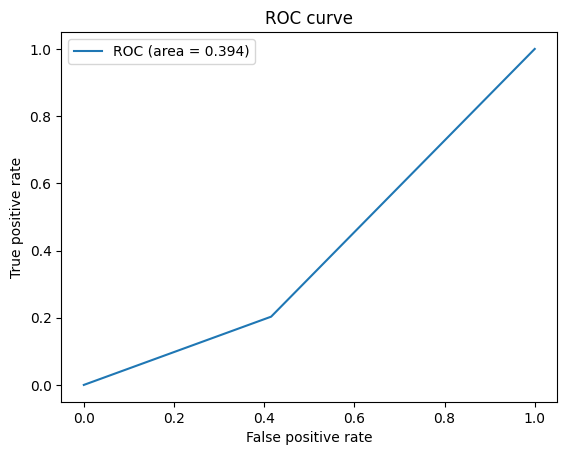

In [150]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_RBC_Label = test_RBC_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_RBC_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Oct.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_RBC.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
cm = pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
1   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
2   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
3   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
4   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
..         ...    ...     ...       ...       ...       ...       ...   
376 2022-10-07     A1  359546  0.004586  0.003429  0.004329  0.004247   
377 2022-10-07     A1  359546  0.004455  0.003365  0.004407  0.004348   
378 2022-10-07     A1  359546  0.004338  0.003259  0.004238  0.004265   
379 2022-10-07     A1  359546  0.004308  0.003270  0.004318  0.004397   
380 2022-10-07     A1  359546  0.004849  0.003680  0.004640  0.004422   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.002593  0.003662  0.006147  ...   0

Predict    0    1
Labels           
0        118   82
1         56  125

In [152]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 118 TN: 125 FP: 82 FN: 56


Accuracy=  0.6377952755905512
Precision=  0.59
Recall=  0.6781609195402298
F1 Score=  0.6310160427807486


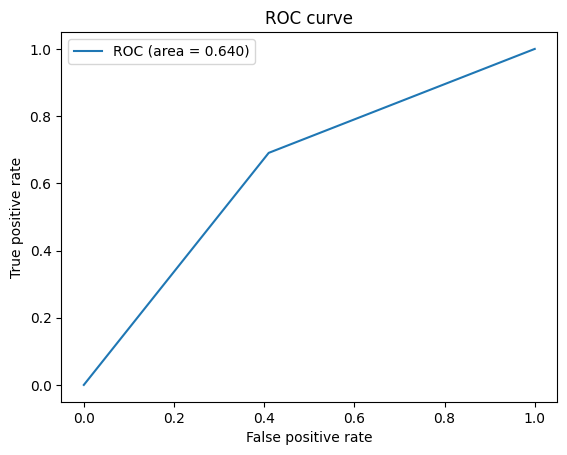

In [153]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_RBC_Label = test_RBC_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_RBC_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Dec.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_RBC.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
cm = pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-12-01     A1   14833  0.000000  0.001545  0.008297  0.015744   
1   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
2   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
3   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
4   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
..         ...    ...     ...       ...       ...       ...       ...   
944 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
945 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
946 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
947 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
948 2022-12-01     A1  349435  0.001541  0.000655  0.002853  0.004389   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.018307  0.017876  0.016148  ...   2

Predict    0    1
Labels           
0        137  262
1        125  425

In [155]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 137 TN: 425 FP: 262 FN: 125


Accuracy=  0.5922023182297155
Precision=  0.3433583959899749
Recall=  0.5229007633587787
F1 Score=  0.4145234493192133


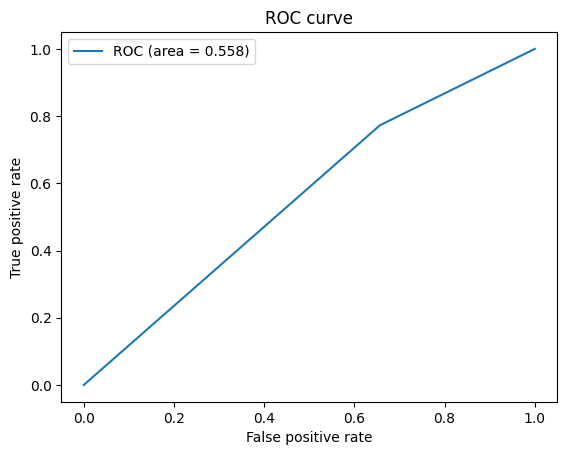

In [156]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_RBC_Label = test_RBC_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_RBC_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [157]:
import tensorflow as tf
from keras.backend import clear_session

# Clear previous session
clear_session()
tf.keras.backend.clear_session()

# Delete previous model
del model

# GOT

In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing1/Test Data_A1.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_GOT_Label = test_array[:,141]
test_GOT_Label[test_GOT_Label==2]=1
print(test_Features.shape)
print(test_GOT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_GOT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_GOT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_GOT_Label.shape)
cm = pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
1   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
2   2022-08-01     A1    6143  0.000000  0.000000  0.003050  0.011153   
3   2022-09-07     A1    6143  0.000000  0.000000  0.001971  0.008043   
4   2022-08-01     A2    6143  0.148252  0.126552  0.111723  0.096499   
..         ...    ...     ...       ...       ...       ...       ...   
533 2022-12-01     A2  359647  0.142292  0.122239  0.107776  0.093027   
534 2022-12-01     A3  359647  0.165795  0.144012  0.124862  0.113425   
535 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
536 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
537 2022-12-01     A3  359647  0.166244  0.144433  0.125244  0.113740   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.013494  0.017496  0.020375  ...   2

Predict    0   1
Labels          
0        272  50
1        144  72

In [159]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 272 TN: 72 FP: 50 FN: 144


Accuracy=  0.6394052044609665
Precision=  0.84472049689441
Recall=  0.6538461538461539
F1 Score=  0.7371273712737129


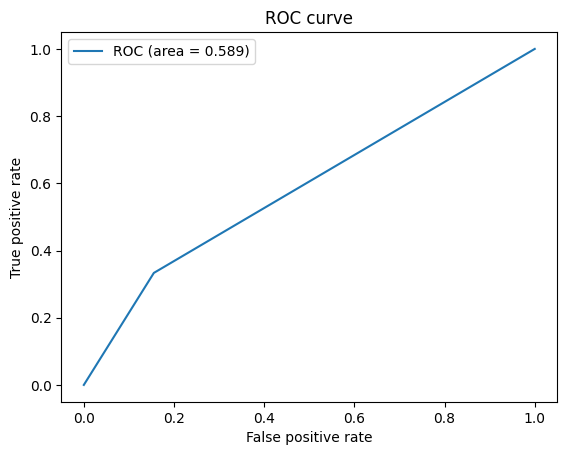

In [160]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_GOT_Label = test_GOT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_GOT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Aug.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_GOT_Label = test_array[:,141]
test_GOT_Label[test_GOT_Label==2]=1
print(test_Features.shape)
print(test_GOT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_GOT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_GOT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_GOT_Label.shape)
cm = pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400  405       410       415       420  \
0   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003031  0.007161   
1   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
2   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
3   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002464  0.005865   
4   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002149  0.005068   
..         ...    ...     ...  ...  ...       ...       ...       ...   
216 2022-08-01     A1  347741  0.0  0.0  0.000889  0.007565  0.013659   
217 2022-08-01     A1  347741  0.0  0.0  0.000487  0.006754  0.012784   
218 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005869  0.011827   
219 2022-08-01     A1  347741  0.0  0.0  0.000135  0.006321  0.012129   
220 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005827  0.012498   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  TIBC  Fer  
0    0.012492  0.018056  ...   2  0    0  

Predict    0   1
Labels          
0         97   0
1        110  14

In [162]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 97 TN: 14 FP: 0 FN: 110


Accuracy=  0.502262443438914
Precision=  1.0
Recall=  0.46859903381642515
F1 Score=  0.6381578947368421


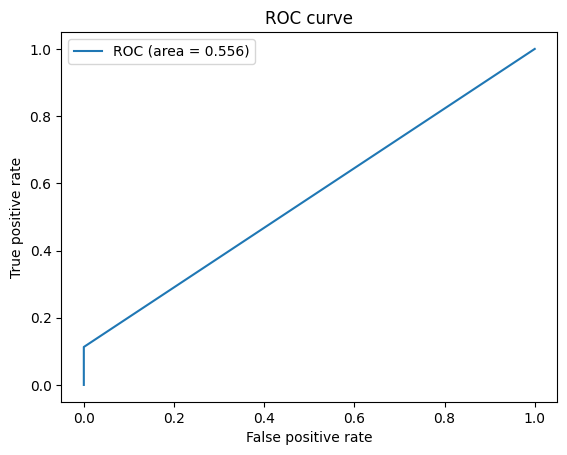

In [163]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_GOT_Label = test_GOT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_GOT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Sep.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_GOT_Label = test_array[:,141]
test_GOT_Label[test_GOT_Label==2]=1
print(test_Features.shape)
print(test_GOT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_GOT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_GOT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_GOT_Label.shape)
cm = pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400       405       410       415       420  \
0   2022-09-07     A1    6143  0.0  0.000000  0.003416  0.011628  0.016787   
1   2022-09-07     A1    6143  0.0  0.000000  0.003301  0.011208  0.016189   
2   2022-09-07     A1    6143  0.0  0.000000  0.002383  0.009399  0.014325   
3   2022-09-07     A1    6143  0.0  0.000000  0.002479  0.009670  0.014610   
4   2022-09-07     A1    6143  0.0  0.000000  0.002516  0.009545  0.014401   
..         ...    ...     ...  ...       ...       ...       ...       ...   
253 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
254 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
255 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
256 2022-09-07     A1  347741  0.0  0.002485  0.010546  0.020140  0.024983   
257 2022-09-07     A1  347741  0.0  0.002077  0.010145  0.019789  0.024635   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  

Predict    0
Labels      
0        180
1         78

In [177]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = 0
FP = 0
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 180 TN: 0 FP: 0 FN: 78


Accuracy=  0.6976744186046512
Precision=  1.0
Recall=  0.6976744186046512
F1 Score=  0.821917808219178


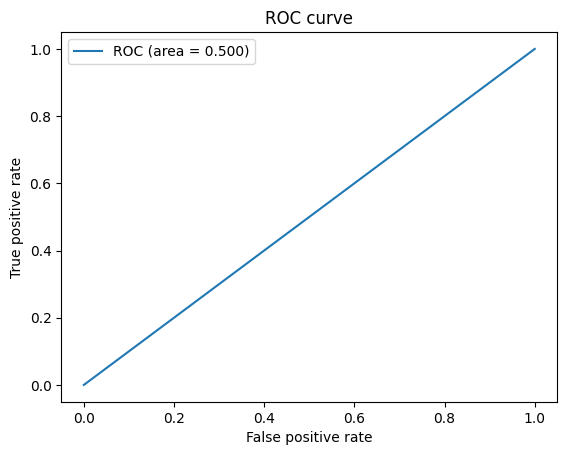

In [178]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_GOT_Label = test_GOT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_GOT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [179]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Oct.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_GOT_Label = test_array[:,141]
test_GOT_Label[test_GOT_Label==2]=1
print(test_Features.shape)
print(test_GOT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_GOT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_GOT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_GOT_Label.shape)
cm = pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
1   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
2   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
3   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
4   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
..         ...    ...     ...       ...       ...       ...       ...   
376 2022-10-07     A1  359546  0.004586  0.003429  0.004329  0.004247   
377 2022-10-07     A1  359546  0.004455  0.003365  0.004407  0.004348   
378 2022-10-07     A1  359546  0.004338  0.003259  0.004238  0.004265   
379 2022-10-07     A1  359546  0.004308  0.003270  0.004318  0.004397   
380 2022-10-07     A1  359546  0.004849  0.003680  0.004640  0.004422   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.002593  0.003662  0.006147  ...   0

Predict    0
Labels      
0        229
1        152

In [180]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = 0
FP = 0
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 229 TN: 0 FP: 0 FN: 152


Accuracy=  0.6010498687664042
Precision=  1.0
Recall=  0.6010498687664042
F1 Score=  0.7508196721311476


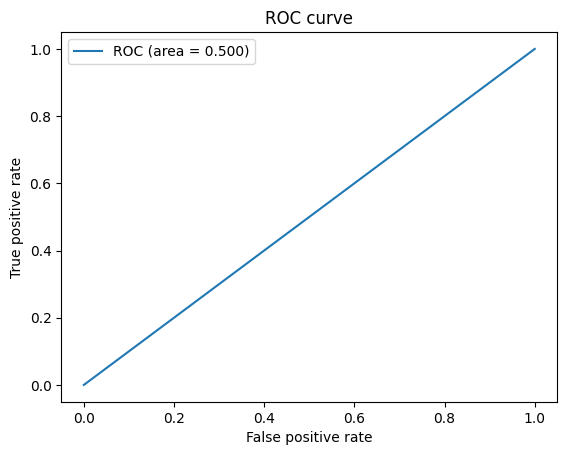

In [181]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_GOT_Label = test_GOT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_GOT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Dec.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_GOT_Label = test_array[:,141]
test_GOT_Label[test_GOT_Label==2]=1
print(test_Features.shape)
print(test_GOT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_GOT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_GOT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_GOT_Label.shape)
cm = pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-12-01     A1   14833  0.000000  0.001545  0.008297  0.015744   
1   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
2   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
3   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
4   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
..         ...    ...     ...       ...       ...       ...       ...   
944 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
945 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
946 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
947 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
948 2022-12-01     A1  349435  0.001541  0.000655  0.002853  0.004389   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.018307  0.017876  0.016148  ...   2

Predict    0   1
Labels          
0        624   0
1        284  41

In [183]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 624 TN: 41 FP: 0 FN: 284


Accuracy=  0.7007376185458377
Precision=  1.0
Recall=  0.6872246696035242
F1 Score=  0.814621409921671


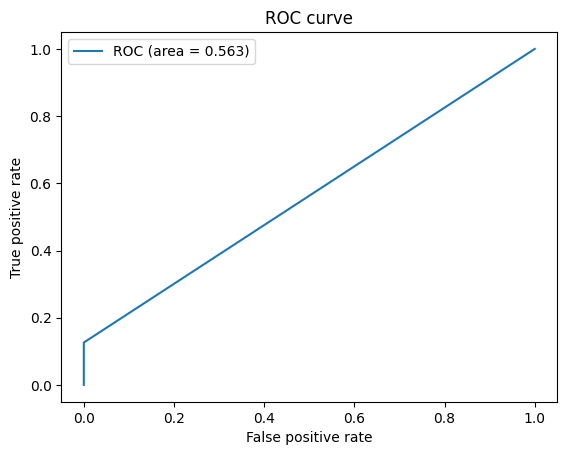

In [184]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_GOT_Label = test_GOT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_GOT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [185]:
import tensorflow as tf
from keras.backend import clear_session

# Clear previous session
clear_session()
tf.keras.backend.clear_session()

# Delete previous model
del model

# Na

In [186]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing1/Test Data_A1.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Na_Label = test_array[:,148]
test_Na_Label[test_Na_Label==2]=1
print(test_Features.shape)
print(test_Na_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Na_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_Na.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Na_Label.shape)
cm = pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
1   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
2   2022-08-01     A1    6143  0.000000  0.000000  0.003050  0.011153   
3   2022-09-07     A1    6143  0.000000  0.000000  0.001971  0.008043   
4   2022-08-01     A2    6143  0.148252  0.126552  0.111723  0.096499   
..         ...    ...     ...       ...       ...       ...       ...   
533 2022-12-01     A2  359647  0.142292  0.122239  0.107776  0.093027   
534 2022-12-01     A3  359647  0.165795  0.144012  0.124862  0.113425   
535 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
536 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
537 2022-12-01     A3  359647  0.166244  0.144433  0.125244  0.113740   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.013494  0.017496  0.020375  ...   2

Predict    0   1
Labels          
0        273  56
1        126  83

In [187]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 273 TN: 83 FP: 56 FN: 126


Accuracy=  0.6617100371747212
Precision=  0.8297872340425532
Recall=  0.6842105263157895
F1 Score=  0.75


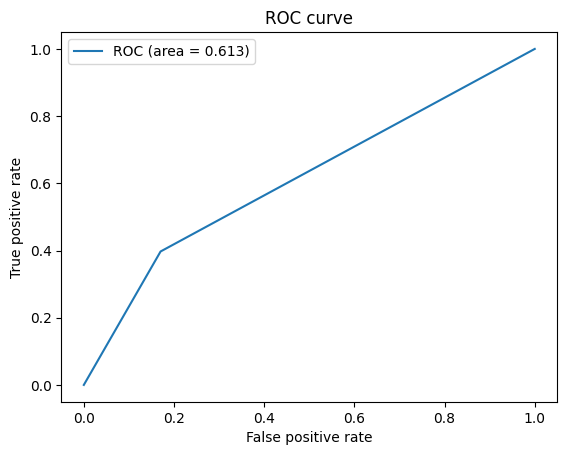

In [188]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Na_Label = test_Na_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Na_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Aug.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Na_Label = test_array[:,148]
test_Na_Label[test_Na_Label==2]=1
print(test_Features.shape)
print(test_Na_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Na_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_Na.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Na_Label.shape)
cm = pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400  405       410       415       420  \
0   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003031  0.007161   
1   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
2   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
3   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002464  0.005865   
4   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002149  0.005068   
..         ...    ...     ...  ...  ...       ...       ...       ...   
216 2022-08-01     A1  347741  0.0  0.0  0.000889  0.007565  0.013659   
217 2022-08-01     A1  347741  0.0  0.0  0.000487  0.006754  0.012784   
218 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005869  0.011827   
219 2022-08-01     A1  347741  0.0  0.0  0.000135  0.006321  0.012129   
220 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005827  0.012498   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  TIBC  Fer  
0    0.012492  0.018056  ...   2  0    0  

Predict   0   1
Labels         
0        71  52
1        54  44

In [190]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 71 TN: 44 FP: 52 FN: 54


Accuracy=  0.5203619909502263
Precision=  0.5772357723577236
Recall=  0.568
F1 Score=  0.5725806451612904


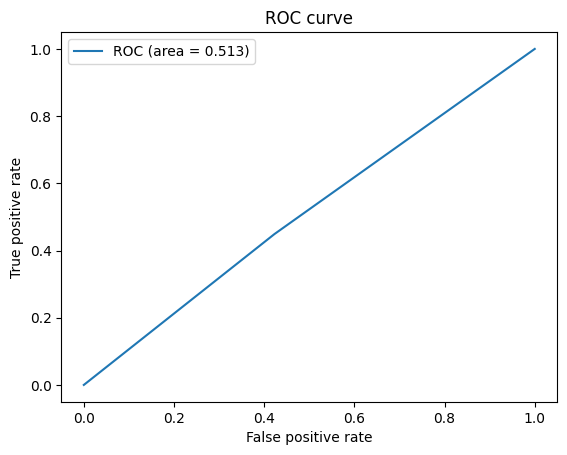

In [191]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Na_Label = test_Na_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Na_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Sep.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Na_Label = test_array[:,148]
test_Na_Label[test_Na_Label==2]=1
print(test_Features.shape)
print(test_Na_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Na_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_Na.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Na_Label.shape)
cm = pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400       405       410       415       420  \
0   2022-09-07     A1    6143  0.0  0.000000  0.003416  0.011628  0.016787   
1   2022-09-07     A1    6143  0.0  0.000000  0.003301  0.011208  0.016189   
2   2022-09-07     A1    6143  0.0  0.000000  0.002383  0.009399  0.014325   
3   2022-09-07     A1    6143  0.0  0.000000  0.002479  0.009670  0.014610   
4   2022-09-07     A1    6143  0.0  0.000000  0.002516  0.009545  0.014401   
..         ...    ...     ...  ...       ...       ...       ...       ...   
253 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
254 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
255 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
256 2022-09-07     A1  347741  0.0  0.002485  0.010546  0.020140  0.024983   
257 2022-09-07     A1  347741  0.0  0.002077  0.010145  0.019789  0.024635   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  

Predict   0   1
Labels         
0        39  89
1        75  55

In [193]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 39 TN: 55 FP: 89 FN: 75


Accuracy=  0.3643410852713178
Precision=  0.3046875
Recall=  0.34210526315789475
F1 Score=  0.3223140495867769


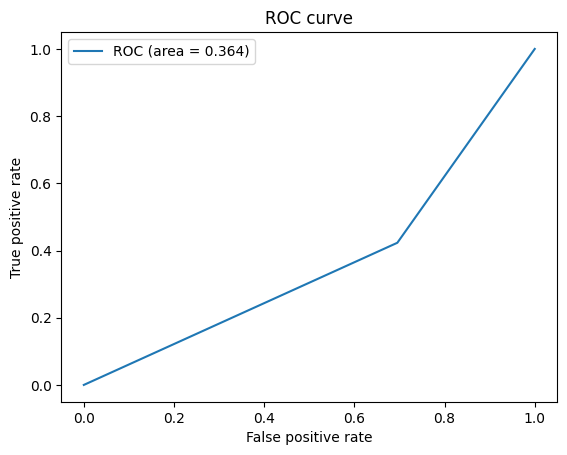

In [194]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Na_Label = test_Na_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Na_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Oct.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Na_Label = test_array[:,148]
test_Na_Label[test_Na_Label==2]=1
print(test_Features.shape)
print(test_Na_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Na_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_Na.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Na_Label.shape)
cm = pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
1   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
2   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
3   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
4   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
..         ...    ...     ...       ...       ...       ...       ...   
376 2022-10-07     A1  359546  0.004586  0.003429  0.004329  0.004247   
377 2022-10-07     A1  359546  0.004455  0.003365  0.004407  0.004348   
378 2022-10-07     A1  359546  0.004338  0.003259  0.004238  0.004265   
379 2022-10-07     A1  359546  0.004308  0.003270  0.004318  0.004397   
380 2022-10-07     A1  359546  0.004849  0.003680  0.004640  0.004422   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.002593  0.003662  0.006147  ...   0

Predict    0    1
Labels           
0        140  116
1         75   50

In [196]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 140 TN: 50 FP: 116 FN: 75


Accuracy=  0.49868766404199477
Precision=  0.546875
Recall=  0.6511627906976745
F1 Score=  0.59447983014862


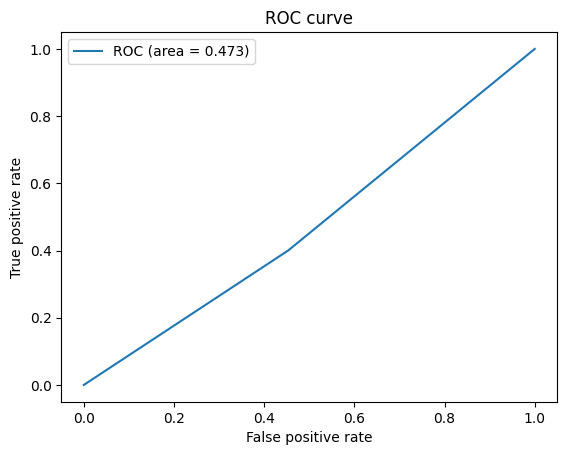

In [197]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Na_Label = test_Na_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Na_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [198]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Dec.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Na_Label = test_array[:,148]
test_Na_Label[test_Na_Label==2]=1
print(test_Features.shape)
print(test_Na_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Na_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing1/A1_Na.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Na_Label.shape)
cm = pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-12-01     A1   14833  0.000000  0.001545  0.008297  0.015744   
1   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
2   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
3   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
4   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
..         ...    ...     ...       ...       ...       ...       ...   
944 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
945 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
946 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
947 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
948 2022-12-01     A1  349435  0.001541  0.000655  0.002853  0.004389   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.018307  0.017876  0.016148  ...   2

Predict    0    1
Labels           
0        318  282
1         28  321

In [199]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 318 TN: 321 FP: 282 FN: 28


Accuracy=  0.6733403582718651
Precision=  0.53
Recall=  0.9190751445086706
F1 Score=  0.6723044397463002


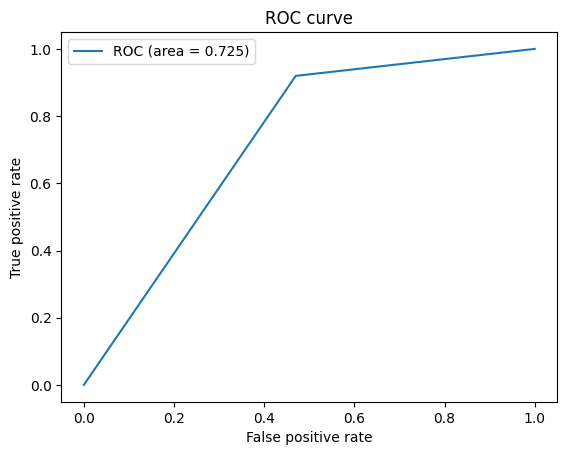

In [200]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Na_Label = test_Na_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Na_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [201]:
import tensorflow as tf
from keras.backend import clear_session

# Clear previous session
clear_session()
tf.keras.backend.clear_session()

# Delete previous model
del model

# 第二份資料集

# PLT

In [202]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing2/Test Data_A1.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_PLT_Label = test_array[:,131]
test_PLT_Label[test_PLT_Label==2]=1
print(test_Features.shape)
print(test_PLT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_PLT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_PLT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_PLT_Label.shape)
cm = pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
1   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
2   2022-08-01     A1    6143  0.000000  0.000000  0.003050  0.011153   
3   2022-09-07     A1    6143  0.000000  0.000000  0.001971  0.008043   
4   2022-08-01     A2    6143  0.148252  0.126552  0.111723  0.096499   
..         ...    ...     ...       ...       ...       ...       ...   
533 2022-12-01     A2  359647  0.142292  0.122239  0.107776  0.093027   
534 2022-12-01     A3  359647  0.165795  0.144012  0.124862  0.113425   
535 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
536 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
537 2022-12-01     A3  359647  0.166244  0.144433  0.125244  0.113740   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.013494  0.017496  0.020375  ...   2

Predict    0    1
Labels           
0        278   65
1         90  105

In [203]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 278 TN: 105 FP: 65 FN: 90


Accuracy=  0.7118959107806692
Precision=  0.8104956268221575
Recall=  0.7554347826086957
F1 Score=  0.7819971870604783


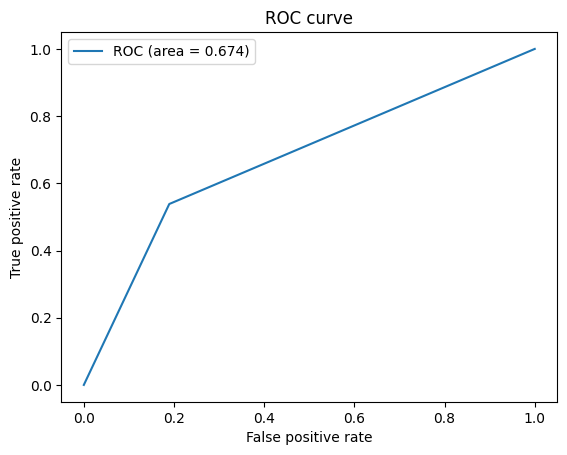

In [204]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_PLT_Label = test_PLT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_PLT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [205]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Aug.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_PLT_Label = test_array[:,131]
test_PLT_Label[test_PLT_Label==2]=1
print(test_Features.shape)
print(test_PLT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_PLT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_PLT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_PLT_Label.shape)
cm = pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400  405       410       415       420  \
0   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003031  0.007161   
1   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
2   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
3   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002464  0.005865   
4   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002149  0.005068   
..         ...    ...     ...  ...  ...       ...       ...       ...   
216 2022-08-01     A1  347741  0.0  0.0  0.000889  0.007565  0.013659   
217 2022-08-01     A1  347741  0.0  0.0  0.000487  0.006754  0.012784   
218 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005869  0.011827   
219 2022-08-01     A1  347741  0.0  0.0  0.000135  0.006321  0.012129   
220 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005827  0.012498   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  TIBC  Fer  
0    0.012492  0.018056  ...   2  0    0  

Predict   0   1
Labels         
0        59  40
1        29  93

In [206]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 59 TN: 93 FP: 40 FN: 29


Accuracy=  0.6877828054298643
Precision=  0.5959595959595959
Recall=  0.6704545454545454
F1 Score=  0.6310160427807486


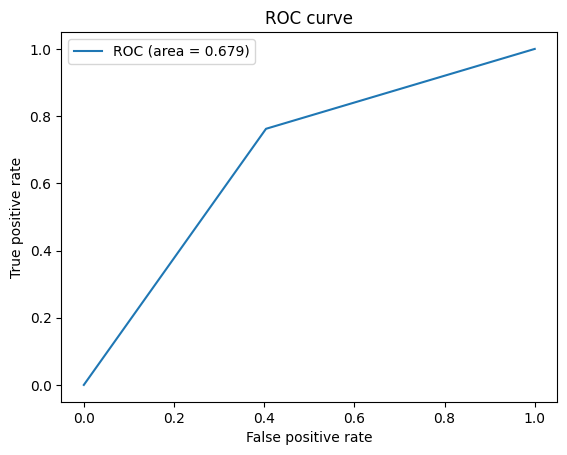

In [207]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_PLT_Label = test_PLT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_PLT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [208]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Sep.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_PLT_Label = test_array[:,131]
test_PLT_Label[test_PLT_Label==2]=1
print(test_Features.shape)
print(test_PLT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_PLT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_PLT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_PLT_Label.shape)
cm = pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400       405       410       415       420  \
0   2022-09-07     A1    6143  0.0  0.000000  0.003416  0.011628  0.016787   
1   2022-09-07     A1    6143  0.0  0.000000  0.003301  0.011208  0.016189   
2   2022-09-07     A1    6143  0.0  0.000000  0.002383  0.009399  0.014325   
3   2022-09-07     A1    6143  0.0  0.000000  0.002479  0.009670  0.014610   
4   2022-09-07     A1    6143  0.0  0.000000  0.002516  0.009545  0.014401   
..         ...    ...     ...  ...       ...       ...       ...       ...   
253 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
254 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
255 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
256 2022-09-07     A1  347741  0.0  0.002485  0.010546  0.020140  0.024983   
257 2022-09-07     A1  347741  0.0  0.002077  0.010145  0.019789  0.024635   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  

Predict   0    1
Labels          
0        55  125
1        65   13

In [209]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 55 TN: 13 FP: 125 FN: 65


Accuracy=  0.26356589147286824
Precision=  0.3055555555555556
Recall=  0.4583333333333333
F1 Score=  0.36666666666666664


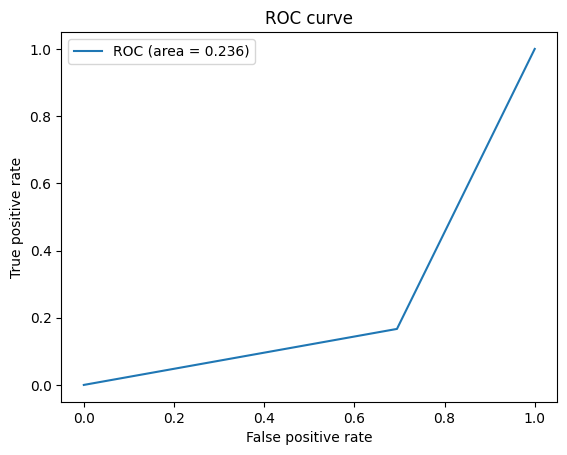

In [210]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_PLT_Label = test_PLT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_PLT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [211]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Oct.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_PLT_Label = test_array[:,131]
test_PLT_Label[test_PLT_Label==2]=1
print(test_Features.shape)
print(test_PLT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_PLT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_PLT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_PLT_Label.shape)
cm = pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
1   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
2   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
3   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
4   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
..         ...    ...     ...       ...       ...       ...       ...   
376 2022-10-07     A1  359546  0.004586  0.003429  0.004329  0.004247   
377 2022-10-07     A1  359546  0.004455  0.003365  0.004407  0.004348   
378 2022-10-07     A1  359546  0.004338  0.003259  0.004238  0.004265   
379 2022-10-07     A1  359546  0.004308  0.003270  0.004318  0.004397   
380 2022-10-07     A1  359546  0.004849  0.003680  0.004640  0.004422   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.002593  0.003662  0.006147  ...   0

Predict    0    1
Labels           
0        105  101
1         55  120

In [212]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 105 TN: 120 FP: 101 FN: 55


Accuracy=  0.5905511811023622
Precision=  0.5097087378640777
Recall=  0.65625
F1 Score=  0.5737704918032787


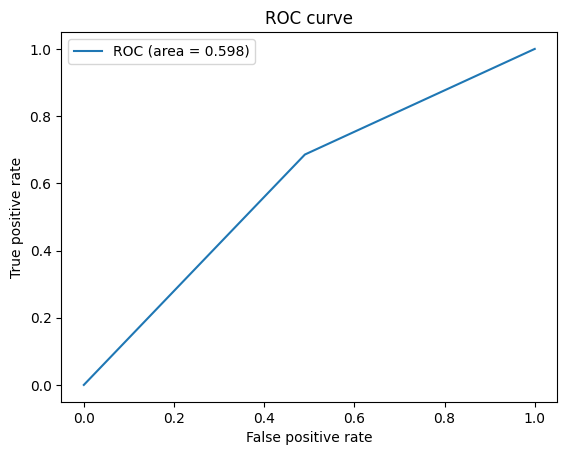

In [213]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_PLT_Label = test_PLT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_PLT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [214]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Dec.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_PLT_Label = test_array[:,131]
test_PLT_Label[test_PLT_Label==2]=1
print(test_Features.shape)
print(test_PLT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_PLT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_PLT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_PLT_Label.shape)
cm = pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-12-01     A1   14833  0.000000  0.001545  0.008297  0.015744   
1   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
2   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
3   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
4   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
..         ...    ...     ...       ...       ...       ...       ...   
944 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
945 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
946 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
947 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
948 2022-12-01     A1  349435  0.001541  0.000655  0.002853  0.004389   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.018307  0.017876  0.016148  ...   2

Predict    0    1
Labels           
0        322  327
1        134  166

In [215]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 322 TN: 166 FP: 327 FN: 134


Accuracy=  0.5142255005268704
Precision=  0.49614791987673346
Recall=  0.706140350877193
F1 Score=  0.5828054298642534


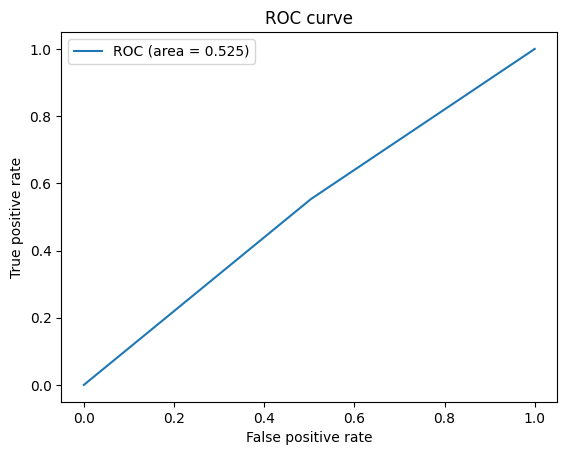

In [216]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_PLT_Label = test_PLT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_PLT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [217]:
import tensorflow as tf
from keras.backend import clear_session

# Clear previous session
clear_session()
tf.keras.backend.clear_session()

# Delete previous model
del model

# Pro

In [218]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing2/Test Data_A1.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Pro_Label = test_array[:,150]
test_Pro_Label[test_Pro_Label==2]=1
print(test_Features.shape)
print(test_Pro_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Pro_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_Pro.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Pro_Label.shape)
cm = pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
1   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
2   2022-08-01     A1    6143  0.000000  0.000000  0.003050  0.011153   
3   2022-09-07     A1    6143  0.000000  0.000000  0.001971  0.008043   
4   2022-08-01     A2    6143  0.148252  0.126552  0.111723  0.096499   
..         ...    ...     ...       ...       ...       ...       ...   
533 2022-12-01     A2  359647  0.142292  0.122239  0.107776  0.093027   
534 2022-12-01     A3  359647  0.165795  0.144012  0.124862  0.113425   
535 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
536 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
537 2022-12-01     A3  359647  0.166244  0.144433  0.125244  0.113740   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.013494  0.017496  0.020375  ...   2

Predict    0   1
Labels          
0        280  43
1        131  84

In [219]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 280 TN: 84 FP: 43 FN: 131


Accuracy=  0.6765799256505576
Precision=  0.8668730650154799
Recall=  0.681265206812652
F1 Score=  0.7629427792915531


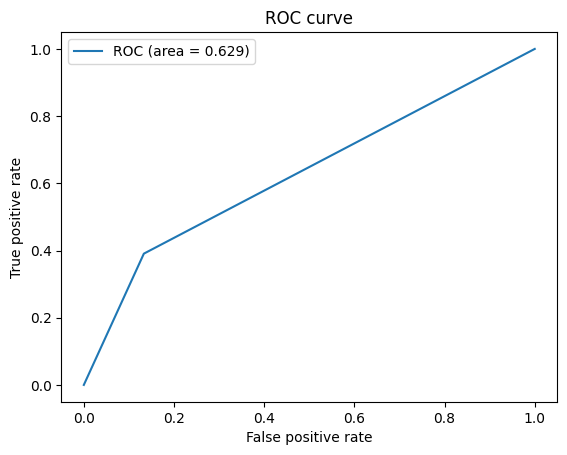

In [220]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Pro_Label = test_Pro_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Pro_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [221]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Aug.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Pro_Label = test_array[:,150]
test_Pro_Label[test_Pro_Label==2]=1
print(test_Features.shape)
print(test_Pro_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Pro_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_Pro.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Pro_Label.shape)
cm = pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400  405       410       415       420  \
0   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003031  0.007161   
1   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
2   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
3   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002464  0.005865   
4   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002149  0.005068   
..         ...    ...     ...  ...  ...       ...       ...       ...   
216 2022-08-01     A1  347741  0.0  0.0  0.000889  0.007565  0.013659   
217 2022-08-01     A1  347741  0.0  0.0  0.000487  0.006754  0.012784   
218 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005869  0.011827   
219 2022-08-01     A1  347741  0.0  0.0  0.000135  0.006321  0.012129   
220 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005827  0.012498   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  TIBC  Fer  
0    0.012492  0.018056  ...   2  0    0  

Predict    0   1
Labels          
0        132  42
1         24  23

In [222]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 132 TN: 23 FP: 42 FN: 24


Accuracy=  0.7013574660633484
Precision=  0.7586206896551724
Recall=  0.8461538461538461
F1 Score=  0.8


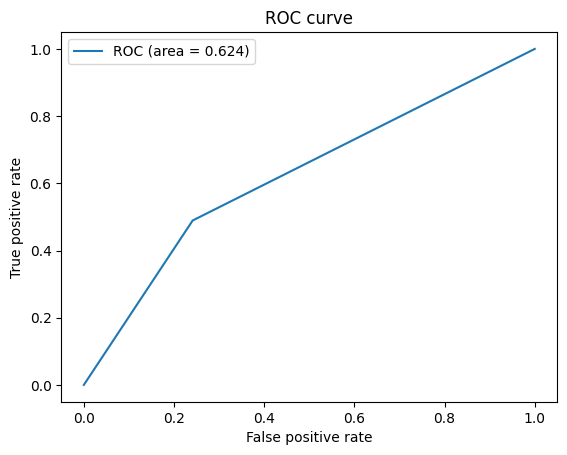

In [223]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Pro_Label = test_Pro_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Pro_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [224]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Sep.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Pro_Label = test_array[:,150]
test_Pro_Label[test_Pro_Label==2]=1
print(test_Features.shape)
print(test_Pro_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Pro_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_Pro.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Pro_Label.shape)
cm = pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400       405       410       415       420  \
0   2022-09-07     A1    6143  0.0  0.000000  0.003416  0.011628  0.016787   
1   2022-09-07     A1    6143  0.0  0.000000  0.003301  0.011208  0.016189   
2   2022-09-07     A1    6143  0.0  0.000000  0.002383  0.009399  0.014325   
3   2022-09-07     A1    6143  0.0  0.000000  0.002479  0.009670  0.014610   
4   2022-09-07     A1    6143  0.0  0.000000  0.002516  0.009545  0.014401   
..         ...    ...     ...  ...       ...       ...       ...       ...   
253 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
254 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
255 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
256 2022-09-07     A1  347741  0.0  0.002485  0.010546  0.020140  0.024983   
257 2022-09-07     A1  347741  0.0  0.002077  0.010145  0.019789  0.024635   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  

Predict   0   1
Labels         
0        84  98
1        74   2

In [225]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 84 TN: 2 FP: 98 FN: 74


Accuracy=  0.3333333333333333
Precision=  0.46153846153846156
Recall=  0.5316455696202531
F1 Score=  0.49411764705882355


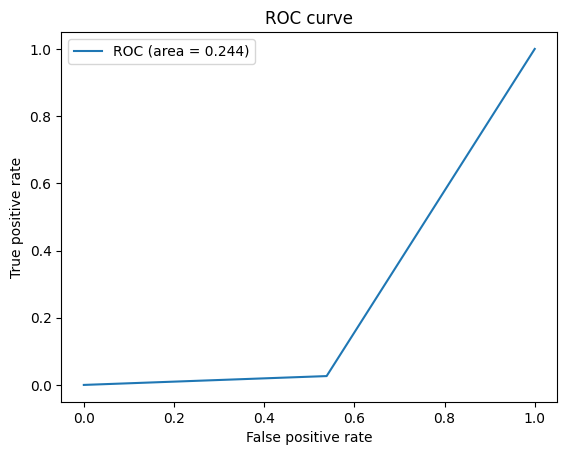

In [226]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Pro_Label = test_Pro_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Pro_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [227]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Oct.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Pro_Label = test_array[:,150]
test_Pro_Label[test_Pro_Label==2]=1
print(test_Features.shape)
print(test_Pro_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Pro_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_Pro.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Pro_Label.shape)
cm = pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
1   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
2   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
3   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
4   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
..         ...    ...     ...       ...       ...       ...       ...   
376 2022-10-07     A1  359546  0.004586  0.003429  0.004329  0.004247   
377 2022-10-07     A1  359546  0.004455  0.003365  0.004407  0.004348   
378 2022-10-07     A1  359546  0.004338  0.003259  0.004238  0.004265   
379 2022-10-07     A1  359546  0.004308  0.003270  0.004318  0.004397   
380 2022-10-07     A1  359546  0.004849  0.003680  0.004640  0.004422   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.002593  0.003662  0.006147  ...   0

Predict    0    1
Labels           
0        200   76
1          1  104

In [228]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 200 TN: 104 FP: 76 FN: 1


Accuracy=  0.7979002624671916
Precision=  0.7246376811594203
Recall=  0.9950248756218906
F1 Score=  0.8385744234800839


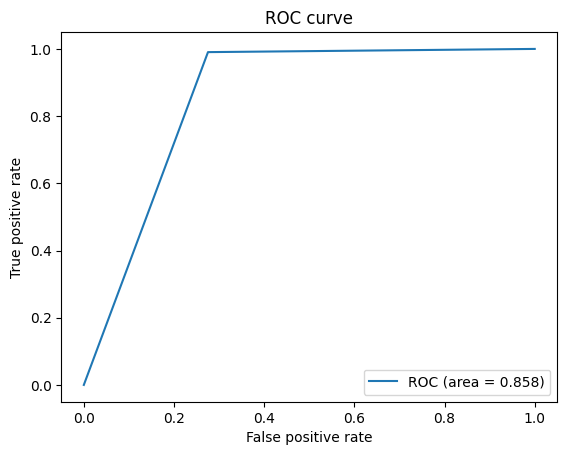

In [229]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Pro_Label = test_Pro_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Pro_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [230]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Dec.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Pro_Label = test_array[:,150]
test_Pro_Label[test_Pro_Label==2]=1
print(test_Features.shape)
print(test_Pro_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Pro_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_Pro.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Pro_Label.shape)
cm = pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-12-01     A1   14833  0.000000  0.001545  0.008297  0.015744   
1   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
2   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
3   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
4   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
..         ...    ...     ...       ...       ...       ...       ...   
944 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
945 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
946 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
947 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
948 2022-12-01     A1  349435  0.001541  0.000655  0.002853  0.004389   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.018307  0.017876  0.016148  ...   2

Predict    0    1
Labels           
0        219  280
1        173  277

In [231]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 219 TN: 277 FP: 280 FN: 173


Accuracy=  0.5226554267650158
Precision=  0.43887775551102204
Recall=  0.5586734693877551
F1 Score=  0.4915824915824916


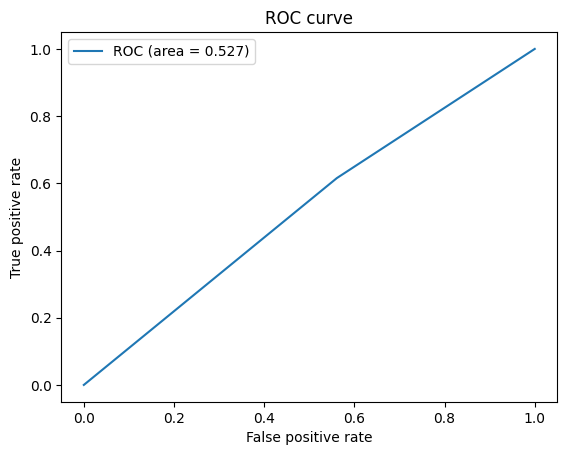

In [232]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Pro_Label = test_Pro_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Pro_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [233]:
import tensorflow as tf
from keras.backend import clear_session

# Clear previous session
clear_session()
tf.keras.backend.clear_session()

# Delete previous model
del model

# Ca

In [234]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing2/Test Data_A1.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Ca_Label = test_array[:,146]
test_Ca_Label[test_Ca_Label==2]=1
print(test_Features.shape)
print(test_Ca_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Ca_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_Ca.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Ca_Label.shape)
cm = pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
1   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
2   2022-08-01     A1    6143  0.000000  0.000000  0.003050  0.011153   
3   2022-09-07     A1    6143  0.000000  0.000000  0.001971  0.008043   
4   2022-08-01     A2    6143  0.148252  0.126552  0.111723  0.096499   
..         ...    ...     ...       ...       ...       ...       ...   
533 2022-12-01     A2  359647  0.142292  0.122239  0.107776  0.093027   
534 2022-12-01     A3  359647  0.165795  0.144012  0.124862  0.113425   
535 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
536 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
537 2022-12-01     A3  359647  0.166244  0.144433  0.125244  0.113740   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.013494  0.017496  0.020375  ...   2

Predict    0   1
Labels          
0        290  47
1        123  78

In [235]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 290 TN: 78 FP: 47 FN: 123


Accuracy=  0.6840148698884758
Precision=  0.8605341246290801
Recall=  0.7021791767554479
F1 Score=  0.7733333333333333


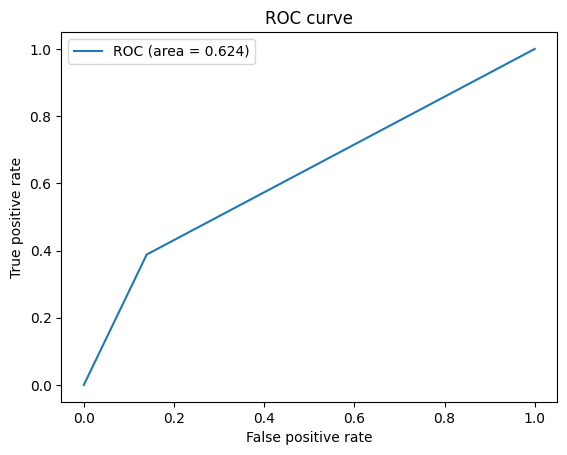

In [236]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Ca_Label = test_Ca_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Ca_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [237]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Aug.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Ca_Label = test_array[:,146]
test_Ca_Label[test_Ca_Label==2]=1
print(test_Features.shape)
print(test_Ca_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Ca_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_Ca.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Ca_Label.shape)
cm = pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400  405       410       415       420  \
0   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003031  0.007161   
1   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
2   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
3   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002464  0.005865   
4   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002149  0.005068   
..         ...    ...     ...  ...  ...       ...       ...       ...   
216 2022-08-01     A1  347741  0.0  0.0  0.000889  0.007565  0.013659   
217 2022-08-01     A1  347741  0.0  0.0  0.000487  0.006754  0.012784   
218 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005869  0.011827   
219 2022-08-01     A1  347741  0.0  0.0  0.000135  0.006321  0.012129   
220 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005827  0.012498   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  TIBC  Fer  
0    0.012492  0.018056  ...   2  0    0  

Predict   0   1
Labels         
0        71  54
1        49  47

In [238]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 71 TN: 47 FP: 54 FN: 49


Accuracy=  0.5339366515837104
Precision=  0.568
Recall=  0.5916666666666667
F1 Score=  0.5795918367346938


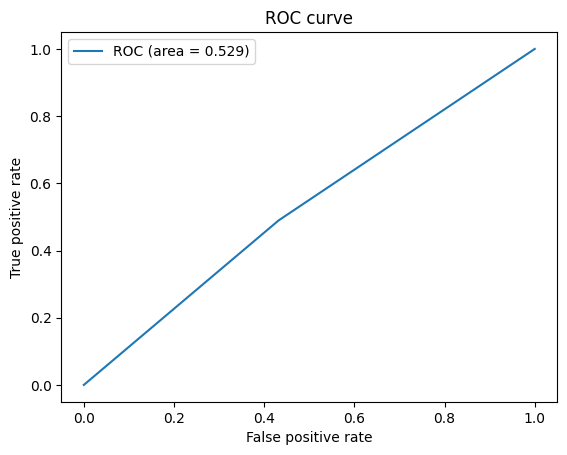

In [239]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Ca_Label = test_Ca_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Ca_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [240]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Sep.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Ca_Label = test_array[:,146]
test_Ca_Label[test_Ca_Label==2]=1
print(test_Features.shape)
print(test_Ca_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Ca_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_Ca.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Ca_Label.shape)
cm = pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400       405       410       415       420  \
0   2022-09-07     A1    6143  0.0  0.000000  0.003416  0.011628  0.016787   
1   2022-09-07     A1    6143  0.0  0.000000  0.003301  0.011208  0.016189   
2   2022-09-07     A1    6143  0.0  0.000000  0.002383  0.009399  0.014325   
3   2022-09-07     A1    6143  0.0  0.000000  0.002479  0.009670  0.014610   
4   2022-09-07     A1    6143  0.0  0.000000  0.002516  0.009545  0.014401   
..         ...    ...     ...  ...       ...       ...       ...       ...   
253 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
254 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
255 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
256 2022-09-07     A1  347741  0.0  0.002485  0.010546  0.020140  0.024983   
257 2022-09-07     A1  347741  0.0  0.002077  0.010145  0.019789  0.024635   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  

Predict    0   1
Labels          
0        107  23
1         47  81

In [241]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 107 TN: 81 FP: 23 FN: 47


Accuracy=  0.7286821705426356
Precision=  0.823076923076923
Recall=  0.6948051948051948
F1 Score=  0.7535211267605633


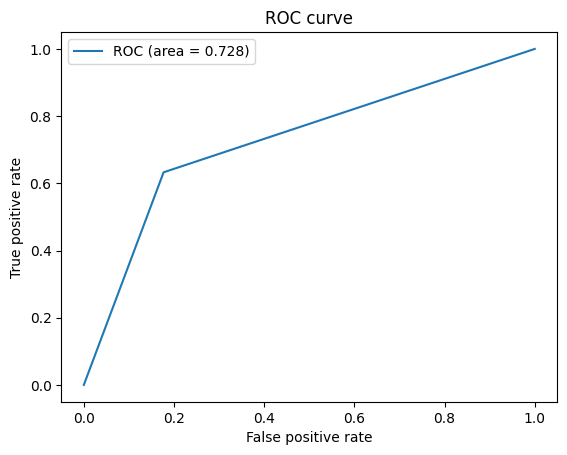

In [242]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Ca_Label = test_Ca_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Ca_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [243]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Oct.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Ca_Label = test_array[:,146]
test_Ca_Label[test_Ca_Label==2]=1
print(test_Features.shape)
print(test_Ca_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Ca_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_Ca.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Ca_Label.shape)
cm = pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
1   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
2   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
3   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
4   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
..         ...    ...     ...       ...       ...       ...       ...   
376 2022-10-07     A1  359546  0.004586  0.003429  0.004329  0.004247   
377 2022-10-07     A1  359546  0.004455  0.003365  0.004407  0.004348   
378 2022-10-07     A1  359546  0.004338  0.003259  0.004238  0.004265   
379 2022-10-07     A1  359546  0.004308  0.003270  0.004318  0.004397   
380 2022-10-07     A1  359546  0.004849  0.003680  0.004640  0.004422   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.002593  0.003662  0.006147  ...   0

Predict    0    1
Labels           
0        103  125
1         25  128

In [244]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 103 TN: 128 FP: 125 FN: 25


Accuracy=  0.6062992125984252
Precision=  0.4517543859649123
Recall=  0.8046875
F1 Score=  0.5786516853932585


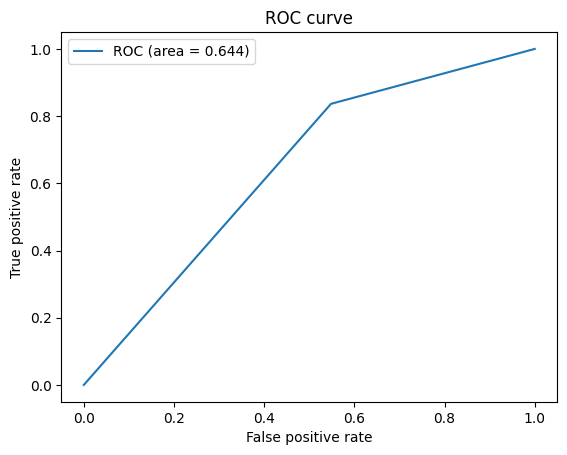

In [245]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Ca_Label = test_Ca_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Ca_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [246]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Dec.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Ca_Label = test_array[:,146]
test_Ca_Label[test_Ca_Label==2]=1
print(test_Features.shape)
print(test_Ca_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Ca_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_Ca.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Ca_Label.shape)
cm = pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-12-01     A1   14833  0.000000  0.001545  0.008297  0.015744   
1   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
2   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
3   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
4   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
..         ...    ...     ...       ...       ...       ...       ...   
944 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
945 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
946 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
947 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
948 2022-12-01     A1  349435  0.001541  0.000655  0.002853  0.004389   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.018307  0.017876  0.016148  ...   2

Predict    0    1
Labels           
0        430  269
1         59  191

In [247]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 430 TN: 191 FP: 269 FN: 59


Accuracy=  0.6543730242360379
Precision=  0.6151645207439199
Recall=  0.8793456032719836
F1 Score=  0.7239057239057239


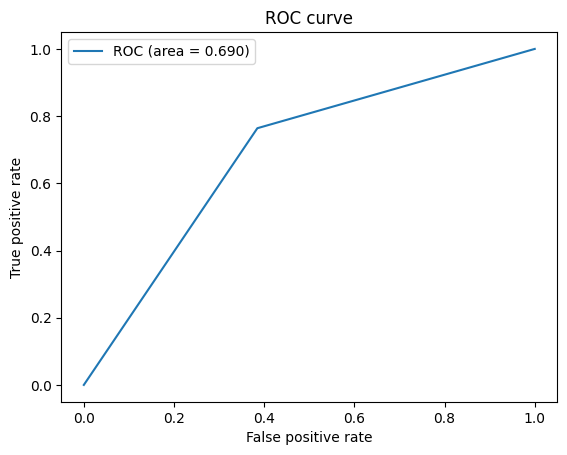

In [248]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Ca_Label = test_Ca_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Ca_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [249]:
import tensorflow as tf
from keras.backend import clear_session

# Clear previous session
clear_session()
tf.keras.backend.clear_session()

# Delete previous model
del model

# P

In [250]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing2/Test Data_A1.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_P_Label = test_array[:,147]
test_P_Label[test_P_Label==2]=1
print(test_Features.shape)
print(test_P_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_P_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_P.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_P_Label.shape)
cm = pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
1   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
2   2022-08-01     A1    6143  0.000000  0.000000  0.003050  0.011153   
3   2022-09-07     A1    6143  0.000000  0.000000  0.001971  0.008043   
4   2022-08-01     A2    6143  0.148252  0.126552  0.111723  0.096499   
..         ...    ...     ...       ...       ...       ...       ...   
533 2022-12-01     A2  359647  0.142292  0.122239  0.107776  0.093027   
534 2022-12-01     A3  359647  0.165795  0.144012  0.124862  0.113425   
535 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
536 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
537 2022-12-01     A3  359647  0.166244  0.144433  0.125244  0.113740   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.013494  0.017496  0.020375  ...   2

Predict    0    1
Labels           
0        122  149
1         54  213

In [251]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 122 TN: 213 FP: 149 FN: 54


Accuracy=  0.6226765799256505
Precision=  0.45018450184501846
Recall=  0.6931818181818182
F1 Score=  0.5458612975391499


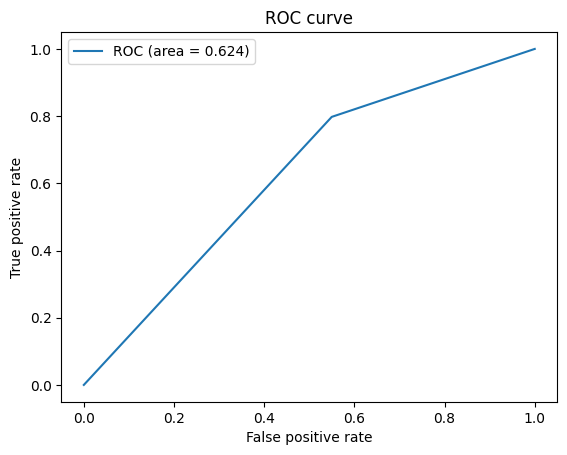

In [252]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_P_Label = test_P_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_P_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [253]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Aug.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_P_Label = test_array[:,147]
test_P_Label[test_P_Label==2]=1
print(test_Features.shape)
print(test_P_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_P_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_P.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_P_Label.shape)
cm = pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400  405       410       415       420  \
0   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003031  0.007161   
1   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
2   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
3   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002464  0.005865   
4   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002149  0.005068   
..         ...    ...     ...  ...  ...       ...       ...       ...   
216 2022-08-01     A1  347741  0.0  0.0  0.000889  0.007565  0.013659   
217 2022-08-01     A1  347741  0.0  0.0  0.000487  0.006754  0.012784   
218 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005869  0.011827   
219 2022-08-01     A1  347741  0.0  0.0  0.000135  0.006321  0.012129   
220 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005827  0.012498   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  TIBC  Fer  
0    0.012492  0.018056  ...   2  0    0  

Predict   0   1
Labels         
0        58  64
1        46  53

In [254]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 58 TN: 53 FP: 64 FN: 46


Accuracy=  0.502262443438914
Precision=  0.47540983606557374
Recall=  0.5576923076923077
F1 Score=  0.5132743362831859


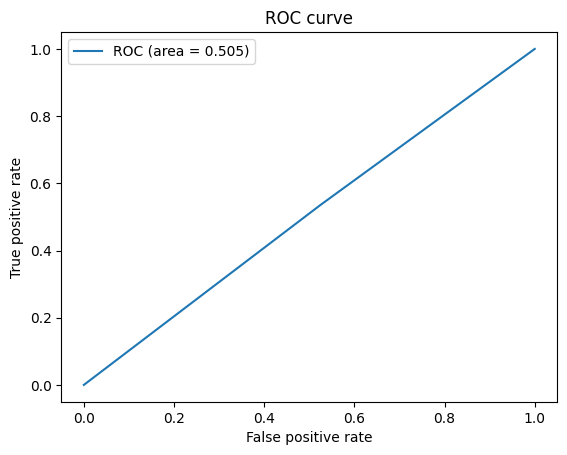

In [255]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_P_Label = test_P_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_P_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [256]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Sep.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_P_Label = test_array[:,147]
test_P_Label[test_P_Label==2]=1
print(test_Features.shape)
print(test_P_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_P_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_P.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_P_Label.shape)
cm = pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400       405       410       415       420  \
0   2022-09-07     A1    6143  0.0  0.000000  0.003416  0.011628  0.016787   
1   2022-09-07     A1    6143  0.0  0.000000  0.003301  0.011208  0.016189   
2   2022-09-07     A1    6143  0.0  0.000000  0.002383  0.009399  0.014325   
3   2022-09-07     A1    6143  0.0  0.000000  0.002479  0.009670  0.014610   
4   2022-09-07     A1    6143  0.0  0.000000  0.002516  0.009545  0.014401   
..         ...    ...     ...  ...       ...       ...       ...       ...   
253 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
254 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
255 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
256 2022-09-07     A1  347741  0.0  0.002485  0.010546  0.020140  0.024983   
257 2022-09-07     A1  347741  0.0  0.002077  0.010145  0.019789  0.024635   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  

Predict    0    1
Labels           
0        102   26
1         22  108

In [257]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 102 TN: 108 FP: 26 FN: 22


Accuracy=  0.813953488372093
Precision=  0.796875
Recall=  0.8225806451612904
F1 Score=  0.8095238095238095


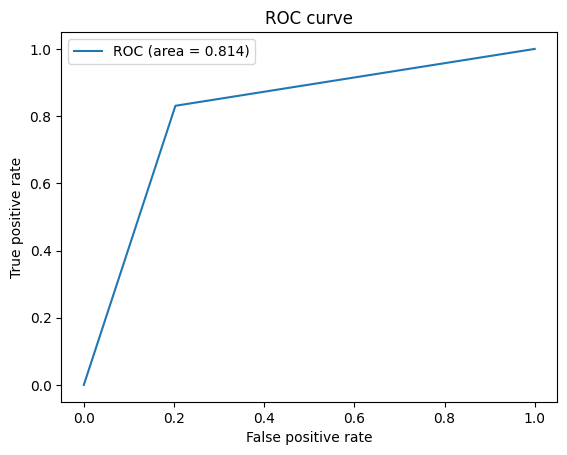

In [258]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_P_Label = test_P_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_P_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [259]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Oct.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_P_Label = test_array[:,147]
test_P_Label[test_P_Label==2]=1
print(test_Features.shape)
print(test_P_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_P_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_P.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_P_Label.shape)
cm = pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
1   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
2   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
3   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
4   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
..         ...    ...     ...       ...       ...       ...       ...   
376 2022-10-07     A1  359546  0.004586  0.003429  0.004329  0.004247   
377 2022-10-07     A1  359546  0.004455  0.003365  0.004407  0.004348   
378 2022-10-07     A1  359546  0.004338  0.003259  0.004238  0.004265   
379 2022-10-07     A1  359546  0.004308  0.003270  0.004318  0.004397   
380 2022-10-07     A1  359546  0.004849  0.003680  0.004640  0.004422   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.002593  0.003662  0.006147  ...   0

Predict   0    1
Labels          
0        63  115
1        57  146

In [260]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 63 TN: 146 FP: 115 FN: 57


Accuracy=  0.5485564304461942
Precision=  0.3539325842696629
Recall=  0.525
F1 Score=  0.4228187919463087


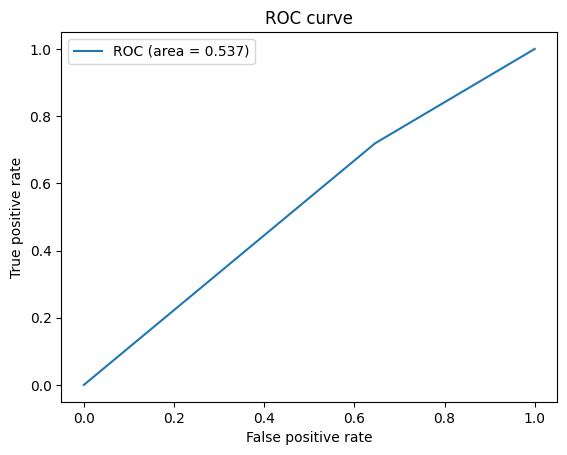

In [261]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_P_Label = test_P_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_P_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [262]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Dec.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_P_Label = test_array[:,147]
test_P_Label[test_P_Label==2]=1
print(test_Features.shape)
print(test_P_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_P_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_P.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_P_Label.shape)
cm = pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-12-01     A1   14833  0.000000  0.001545  0.008297  0.015744   
1   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
2   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
3   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
4   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
..         ...    ...     ...       ...       ...       ...       ...   
944 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
945 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
946 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
947 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
948 2022-12-01     A1  349435  0.001541  0.000655  0.002853  0.004389   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.018307  0.017876  0.016148  ...   2

Predict    0    1
Labels           
0        150  275
1        120  404

In [263]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 150 TN: 404 FP: 275 FN: 120


Accuracy=  0.58377239199157
Precision=  0.35294117647058826
Recall=  0.5555555555555556
F1 Score=  0.43165467625899284


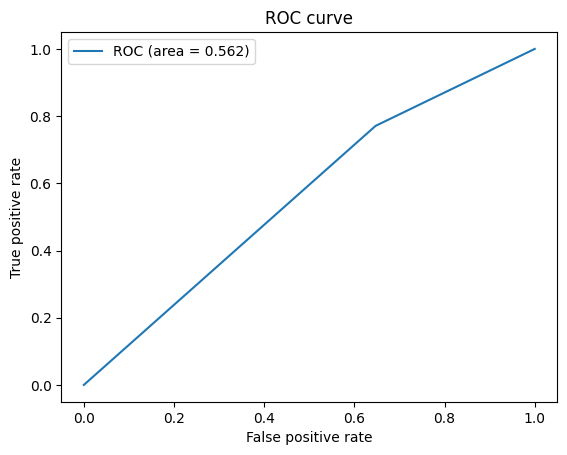

In [264]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_P_Label = test_P_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_P_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [265]:
import tensorflow as tf
from keras.backend import clear_session

# Clear previous session
clear_session()
tf.keras.backend.clear_session()

# Delete previous model
del model

# RBC

In [266]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing2/Test Data_A1.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_RBC.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
cm = pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
1   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
2   2022-08-01     A1    6143  0.000000  0.000000  0.003050  0.011153   
3   2022-09-07     A1    6143  0.000000  0.000000  0.001971  0.008043   
4   2022-08-01     A2    6143  0.148252  0.126552  0.111723  0.096499   
..         ...    ...     ...       ...       ...       ...       ...   
533 2022-12-01     A2  359647  0.142292  0.122239  0.107776  0.093027   
534 2022-12-01     A3  359647  0.165795  0.144012  0.124862  0.113425   
535 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
536 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
537 2022-12-01     A3  359647  0.166244  0.144433  0.125244  0.113740   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.013494  0.017496  0.020375  ...   2

Predict   0    1
Labels          
0        99  133
1        58  248

In [267]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 99 TN: 248 FP: 133 FN: 58


Accuracy=  0.6449814126394052
Precision=  0.4267241379310345
Recall=  0.6305732484076433
F1 Score=  0.5089974293059126


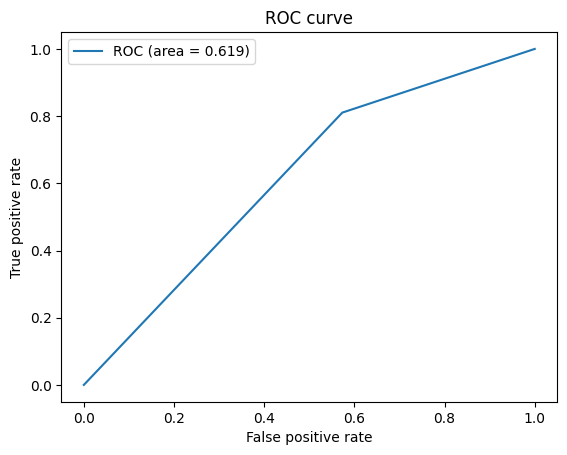

In [268]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_RBC_Label = test_RBC_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_RBC_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [269]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Aug.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_RBC.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
cm = pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400  405       410       415       420  \
0   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003031  0.007161   
1   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
2   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
3   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002464  0.005865   
4   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002149  0.005068   
..         ...    ...     ...  ...  ...       ...       ...       ...   
216 2022-08-01     A1  347741  0.0  0.0  0.000889  0.007565  0.013659   
217 2022-08-01     A1  347741  0.0  0.0  0.000487  0.006754  0.012784   
218 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005869  0.011827   
219 2022-08-01     A1  347741  0.0  0.0  0.000135  0.006321  0.012129   
220 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005827  0.012498   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  TIBC  Fer  
0    0.012492  0.018056  ...   2  0    0  

Predict   0    1
Labels          
0        41   34
1         5  141

In [270]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 41 TN: 141 FP: 34 FN: 5


Accuracy=  0.8235294117647058
Precision=  0.5466666666666666
Recall=  0.8913043478260869
F1 Score=  0.6776859504132231


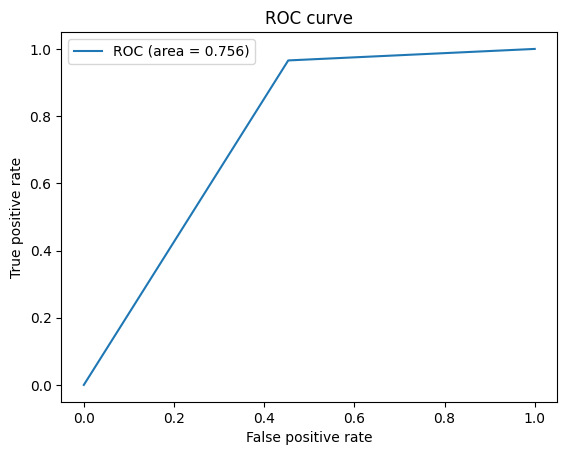

In [271]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_RBC_Label = test_RBC_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_RBC_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [272]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Sep.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_RBC.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
cm = pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400       405       410       415       420  \
0   2022-09-07     A1    6143  0.0  0.000000  0.003416  0.011628  0.016787   
1   2022-09-07     A1    6143  0.0  0.000000  0.003301  0.011208  0.016189   
2   2022-09-07     A1    6143  0.0  0.000000  0.002383  0.009399  0.014325   
3   2022-09-07     A1    6143  0.0  0.000000  0.002479  0.009670  0.014610   
4   2022-09-07     A1    6143  0.0  0.000000  0.002516  0.009545  0.014401   
..         ...    ...     ...  ...       ...       ...       ...       ...   
253 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
254 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
255 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
256 2022-09-07     A1  347741  0.0  0.002485  0.010546  0.020140  0.024983   
257 2022-09-07     A1  347741  0.0  0.002077  0.010145  0.019789  0.024635   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  

Predict   0    1
Labels          
0        24  106
1        41   87

In [273]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 24 TN: 87 FP: 106 FN: 41


Accuracy=  0.43023255813953487
Precision=  0.18461538461538463
Recall=  0.36923076923076925
F1 Score=  0.24615384615384617


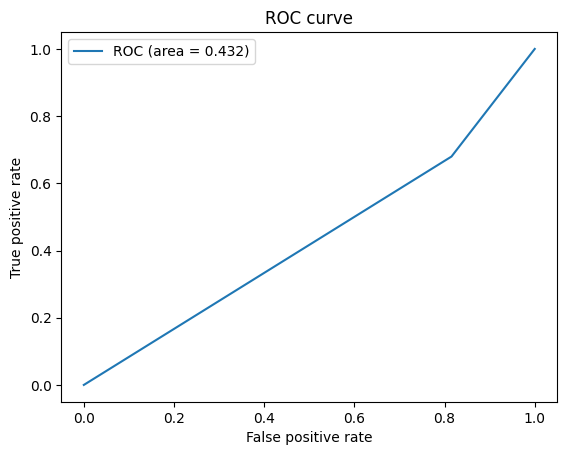

In [274]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_RBC_Label = test_RBC_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_RBC_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [275]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Oct.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_RBC.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
cm = pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
1   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
2   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
3   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
4   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
..         ...    ...     ...       ...       ...       ...       ...   
376 2022-10-07     A1  359546  0.004586  0.003429  0.004329  0.004247   
377 2022-10-07     A1  359546  0.004455  0.003365  0.004407  0.004348   
378 2022-10-07     A1  359546  0.004338  0.003259  0.004238  0.004265   
379 2022-10-07     A1  359546  0.004308  0.003270  0.004318  0.004397   
380 2022-10-07     A1  359546  0.004849  0.003680  0.004640  0.004422   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.002593  0.003662  0.006147  ...   0

Predict   0    1
Labels          
0        69  131
1        37  144

In [276]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 69 TN: 144 FP: 131 FN: 37


Accuracy=  0.5590551181102362
Precision=  0.345
Recall=  0.6509433962264151
F1 Score=  0.45098039215686275


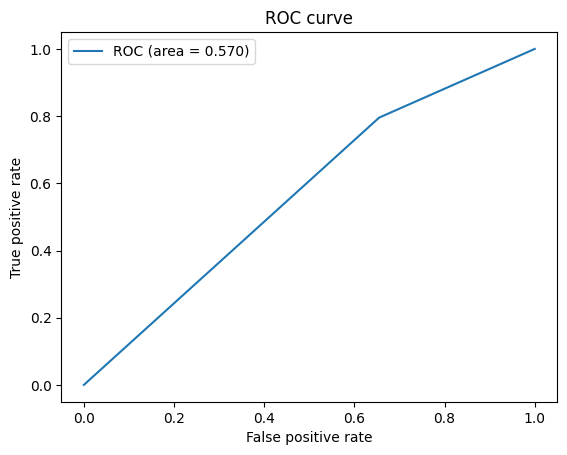

In [277]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_RBC_Label = test_RBC_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_RBC_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [278]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Dec.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_RBC.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
cm = pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-12-01     A1   14833  0.000000  0.001545  0.008297  0.015744   
1   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
2   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
3   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
4   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
..         ...    ...     ...       ...       ...       ...       ...   
944 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
945 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
946 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
947 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
948 2022-12-01     A1  349435  0.001541  0.000655  0.002853  0.004389   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.018307  0.017876  0.016148  ...   2

Predict    0    1
Labels           
0        201  198
1        110  440

In [279]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 201 TN: 440 FP: 198 FN: 110


Accuracy=  0.6754478398314014
Precision=  0.5037593984962406
Recall=  0.6463022508038585
F1 Score=  0.5661971830985916


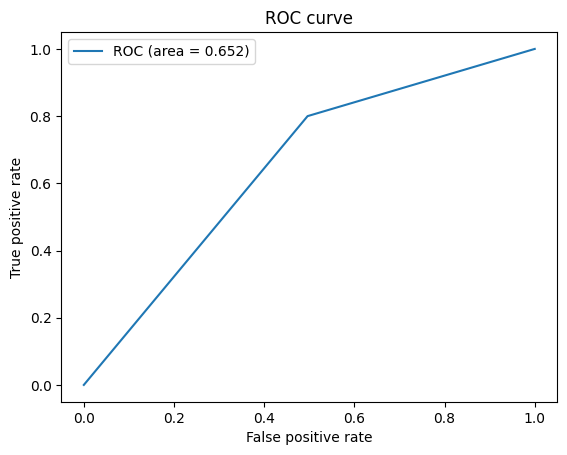

In [280]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_RBC_Label = test_RBC_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_RBC_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [281]:
import tensorflow as tf
from keras.backend import clear_session

# Clear previous session
clear_session()
tf.keras.backend.clear_session()

# Delete previous model
del model

# GOT

In [282]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing2/Test Data_A1.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_GOT_Label = test_array[:,141]
test_GOT_Label[test_GOT_Label==2]=1
print(test_Features.shape)
print(test_GOT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_GOT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_GOT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_GOT_Label.shape)
cm = pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
1   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
2   2022-08-01     A1    6143  0.000000  0.000000  0.003050  0.011153   
3   2022-09-07     A1    6143  0.000000  0.000000  0.001971  0.008043   
4   2022-08-01     A2    6143  0.148252  0.126552  0.111723  0.096499   
..         ...    ...     ...       ...       ...       ...       ...   
533 2022-12-01     A2  359647  0.142292  0.122239  0.107776  0.093027   
534 2022-12-01     A3  359647  0.165795  0.144012  0.124862  0.113425   
535 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
536 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
537 2022-12-01     A3  359647  0.166244  0.144433  0.125244  0.113740   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.013494  0.017496  0.020375  ...   2

Predict    0   1
Labels          
0        300  22
1        157  59

In [283]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 300 TN: 59 FP: 22 FN: 157


Accuracy=  0.6672862453531598
Precision=  0.9316770186335404
Recall=  0.6564551422319475
F1 Score=  0.7702182284980744


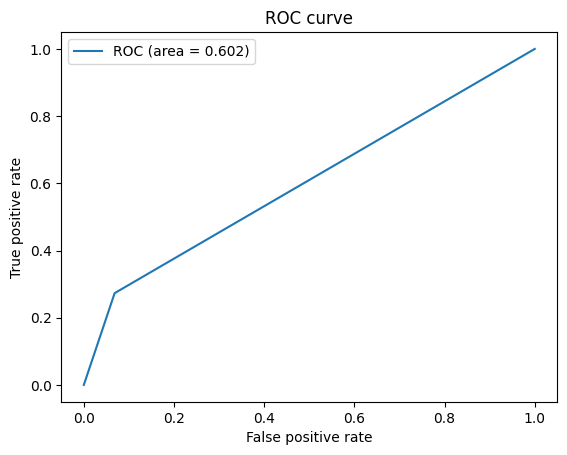

In [284]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_GOT_Label = test_GOT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_GOT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [285]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Aug.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_GOT_Label = test_array[:,141]
test_GOT_Label[test_GOT_Label==2]=1
print(test_Features.shape)
print(test_GOT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_GOT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_GOT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_GOT_Label.shape)
cm = pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400  405       410       415       420  \
0   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003031  0.007161   
1   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
2   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
3   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002464  0.005865   
4   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002149  0.005068   
..         ...    ...     ...  ...  ...       ...       ...       ...   
216 2022-08-01     A1  347741  0.0  0.0  0.000889  0.007565  0.013659   
217 2022-08-01     A1  347741  0.0  0.0  0.000487  0.006754  0.012784   
218 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005869  0.011827   
219 2022-08-01     A1  347741  0.0  0.0  0.000135  0.006321  0.012129   
220 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005827  0.012498   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  TIBC  Fer  
0    0.012492  0.018056  ...   2  0    0  

Predict    0   1
Labels          
0         97   0
1        106  18

In [286]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 97 TN: 18 FP: 0 FN: 106


Accuracy=  0.5203619909502263
Precision=  1.0
Recall=  0.47783251231527096
F1 Score=  0.6466666666666667


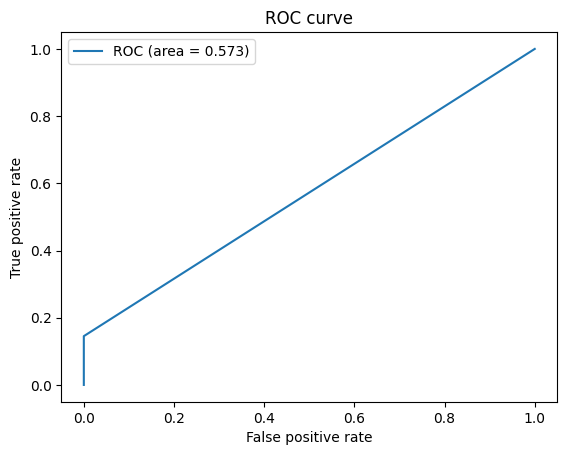

In [287]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_GOT_Label = test_GOT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_GOT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [290]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Sep.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_GOT_Label = test_array[:,141]
test_GOT_Label[test_GOT_Label==2]=1
print(test_Features.shape)
print(test_GOT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_GOT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_GOT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_GOT_Label.shape)
cm = pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400       405       410       415       420  \
0   2022-09-07     A1    6143  0.0  0.000000  0.003416  0.011628  0.016787   
1   2022-09-07     A1    6143  0.0  0.000000  0.003301  0.011208  0.016189   
2   2022-09-07     A1    6143  0.0  0.000000  0.002383  0.009399  0.014325   
3   2022-09-07     A1    6143  0.0  0.000000  0.002479  0.009670  0.014610   
4   2022-09-07     A1    6143  0.0  0.000000  0.002516  0.009545  0.014401   
..         ...    ...     ...  ...       ...       ...       ...       ...   
253 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
254 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
255 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
256 2022-09-07     A1  347741  0.0  0.002485  0.010546  0.020140  0.024983   
257 2022-09-07     A1  347741  0.0  0.002077  0.010145  0.019789  0.024635   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  

Predict    0
Labels      
0        180
1         78

In [291]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = 0
FP = 0
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 180 TN: 0 FP: 0 FN: 78


Accuracy=  0.6976744186046512
Precision=  1.0
Recall=  0.6976744186046512
F1 Score=  0.821917808219178


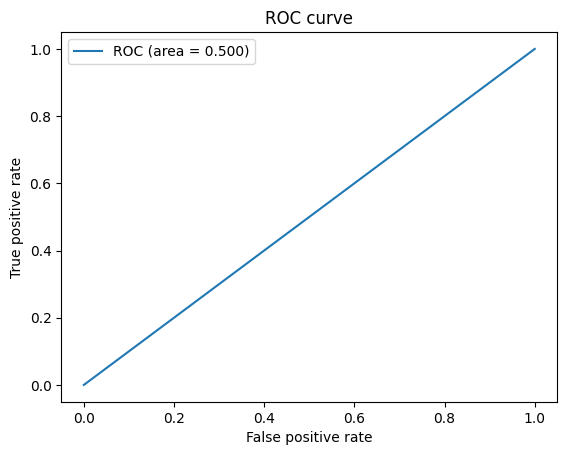

In [292]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_GOT_Label = test_GOT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_GOT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [295]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Oct.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_GOT_Label = test_array[:,141]
test_GOT_Label[test_GOT_Label==2]=1
print(test_Features.shape)
print(test_GOT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_GOT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_GOT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_GOT_Label.shape)
cm = pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
1   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
2   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
3   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
4   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
..         ...    ...     ...       ...       ...       ...       ...   
376 2022-10-07     A1  359546  0.004586  0.003429  0.004329  0.004247   
377 2022-10-07     A1  359546  0.004455  0.003365  0.004407  0.004348   
378 2022-10-07     A1  359546  0.004338  0.003259  0.004238  0.004265   
379 2022-10-07     A1  359546  0.004308  0.003270  0.004318  0.004397   
380 2022-10-07     A1  359546  0.004849  0.003680  0.004640  0.004422   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.002593  0.003662  0.006147  ...   0

Predict    0
Labels      
0        229
1        152

In [296]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = 0
FP = 0
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 229 TN: 0 FP: 0 FN: 152


Accuracy=  0.6010498687664042
Precision=  1.0
Recall=  0.6010498687664042
F1 Score=  0.7508196721311476


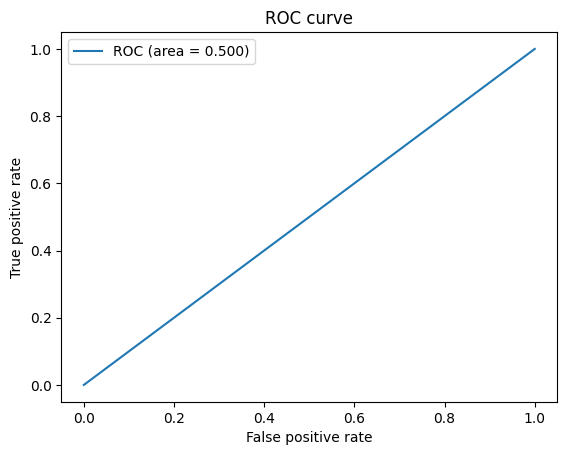

In [297]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_GOT_Label = test_GOT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_GOT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [298]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Dec.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_GOT_Label = test_array[:,141]
test_GOT_Label[test_GOT_Label==2]=1
print(test_Features.shape)
print(test_GOT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_GOT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_GOT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_GOT_Label.shape)
cm = pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-12-01     A1   14833  0.000000  0.001545  0.008297  0.015744   
1   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
2   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
3   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
4   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
..         ...    ...     ...       ...       ...       ...       ...   
944 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
945 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
946 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
947 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
948 2022-12-01     A1  349435  0.001541  0.000655  0.002853  0.004389   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.018307  0.017876  0.016148  ...   2

Predict    0   1
Labels          
0        624   0
1        300  25

In [299]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 624 TN: 25 FP: 0 FN: 300


Accuracy=  0.6838777660695469
Precision=  1.0
Recall=  0.6753246753246753
F1 Score=  0.8062015503875969


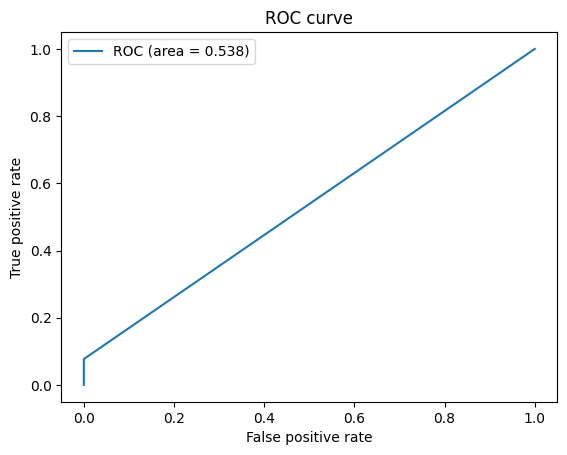

In [300]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_GOT_Label = test_GOT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_GOT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [301]:
import tensorflow as tf
from keras.backend import clear_session

# Clear previous session
clear_session()
tf.keras.backend.clear_session()

# Delete previous model
del model

# Na

In [302]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing2/Test Data_A1.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Na_Label = test_array[:,148]
test_Na_Label[test_Na_Label==2]=1
print(test_Features.shape)
print(test_Na_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Na_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_Na.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Na_Label.shape)
cm = pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
1   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
2   2022-08-01     A1    6143  0.000000  0.000000  0.003050  0.011153   
3   2022-09-07     A1    6143  0.000000  0.000000  0.001971  0.008043   
4   2022-08-01     A2    6143  0.148252  0.126552  0.111723  0.096499   
..         ...    ...     ...       ...       ...       ...       ...   
533 2022-12-01     A2  359647  0.142292  0.122239  0.107776  0.093027   
534 2022-12-01     A3  359647  0.165795  0.144012  0.124862  0.113425   
535 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
536 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
537 2022-12-01     A3  359647  0.166244  0.144433  0.125244  0.113740   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.013494  0.017496  0.020375  ...   2

Predict    0   1
Labels          
0        279  50
1        142  67

In [303]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 279 TN: 67 FP: 50 FN: 142


Accuracy=  0.6431226765799256
Precision=  0.8480243161094225
Recall=  0.66270783847981
F1 Score=  0.7439999999999999


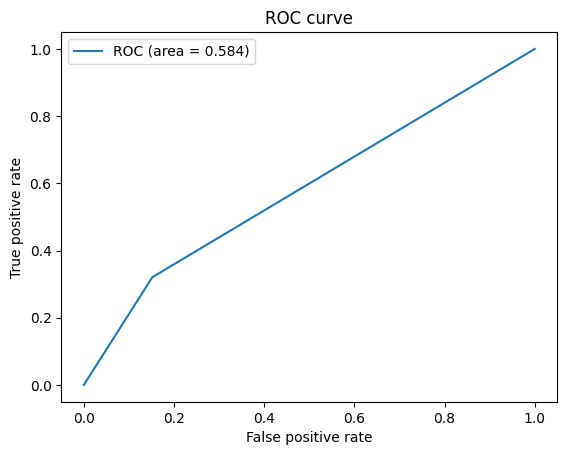

In [304]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Na_Label = test_Na_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Na_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [305]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Aug.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Na_Label = test_array[:,148]
test_Na_Label[test_Na_Label==2]=1
print(test_Features.shape)
print(test_Na_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Na_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_Na.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Na_Label.shape)
cm = pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400  405       410       415       420  \
0   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003031  0.007161   
1   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
2   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
3   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002464  0.005865   
4   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002149  0.005068   
..         ...    ...     ...  ...  ...       ...       ...       ...   
216 2022-08-01     A1  347741  0.0  0.0  0.000889  0.007565  0.013659   
217 2022-08-01     A1  347741  0.0  0.0  0.000487  0.006754  0.012784   
218 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005869  0.011827   
219 2022-08-01     A1  347741  0.0  0.0  0.000135  0.006321  0.012129   
220 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005827  0.012498   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  TIBC  Fer  
0    0.012492  0.018056  ...   2  0    0  

Predict   0   1
Labels         
0        90  33
1        33  65

In [306]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 90 TN: 65 FP: 33 FN: 33


Accuracy=  0.7013574660633484
Precision=  0.7317073170731707
Recall=  0.7317073170731707
F1 Score=  0.7317073170731707


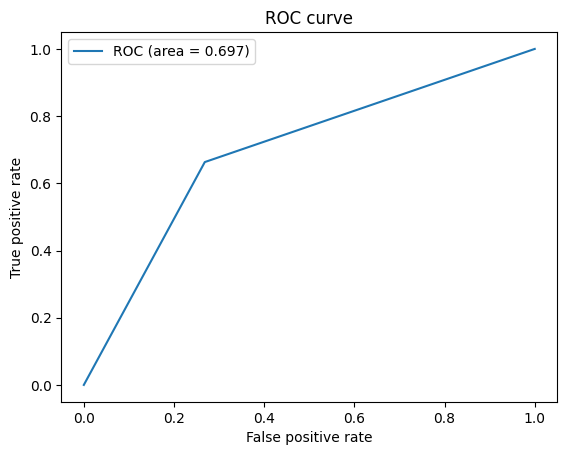

In [307]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Na_Label = test_Na_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Na_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [308]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Sep.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Na_Label = test_array[:,148]
test_Na_Label[test_Na_Label==2]=1
print(test_Features.shape)
print(test_Na_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Na_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_Na.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Na_Label.shape)
cm = pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400       405       410       415       420  \
0   2022-09-07     A1    6143  0.0  0.000000  0.003416  0.011628  0.016787   
1   2022-09-07     A1    6143  0.0  0.000000  0.003301  0.011208  0.016189   
2   2022-09-07     A1    6143  0.0  0.000000  0.002383  0.009399  0.014325   
3   2022-09-07     A1    6143  0.0  0.000000  0.002479  0.009670  0.014610   
4   2022-09-07     A1    6143  0.0  0.000000  0.002516  0.009545  0.014401   
..         ...    ...     ...  ...       ...       ...       ...       ...   
253 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
254 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
255 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
256 2022-09-07     A1  347741  0.0  0.002485  0.010546  0.020140  0.024983   
257 2022-09-07     A1  347741  0.0  0.002077  0.010145  0.019789  0.024635   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  

Predict   0   1
Labels         
0        36  92
1        81  49

In [309]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 36 TN: 49 FP: 92 FN: 81


Accuracy=  0.32945736434108525
Precision=  0.28125
Recall=  0.3076923076923077
F1 Score=  0.2938775510204082


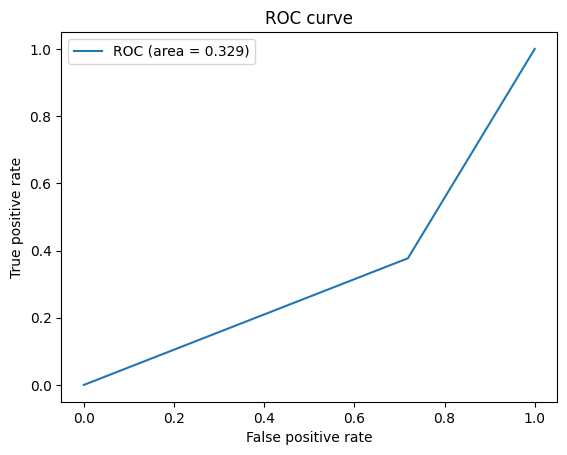

In [310]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Na_Label = test_Na_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Na_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [311]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Oct.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Na_Label = test_array[:,148]
test_Na_Label[test_Na_Label==2]=1
print(test_Features.shape)
print(test_Na_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Na_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_Na.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Na_Label.shape)
cm = pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
1   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
2   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
3   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
4   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
..         ...    ...     ...       ...       ...       ...       ...   
376 2022-10-07     A1  359546  0.004586  0.003429  0.004329  0.004247   
377 2022-10-07     A1  359546  0.004455  0.003365  0.004407  0.004348   
378 2022-10-07     A1  359546  0.004338  0.003259  0.004238  0.004265   
379 2022-10-07     A1  359546  0.004308  0.003270  0.004318  0.004397   
380 2022-10-07     A1  359546  0.004849  0.003680  0.004640  0.004422   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.002593  0.003662  0.006147  ...   0

Predict    0   1
Labels          
0        166  90
1         76  49

In [312]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 166 TN: 49 FP: 90 FN: 76


Accuracy=  0.5643044619422573
Precision=  0.6484375
Recall=  0.6859504132231405
F1 Score=  0.6666666666666666


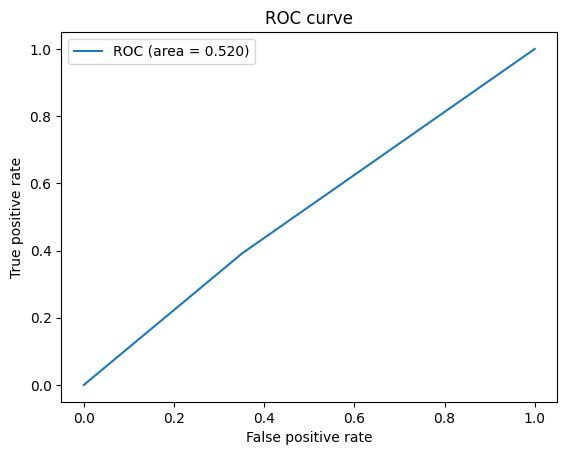

In [313]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Na_Label = test_Na_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Na_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [314]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Dec.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Na_Label = test_array[:,148]
test_Na_Label[test_Na_Label==2]=1
print(test_Features.shape)
print(test_Na_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Na_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing2/A1_Na.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Na_Label.shape)
cm = pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-12-01     A1   14833  0.000000  0.001545  0.008297  0.015744   
1   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
2   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
3   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
4   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
..         ...    ...     ...       ...       ...       ...       ...   
944 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
945 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
946 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
947 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
948 2022-12-01     A1  349435  0.001541  0.000655  0.002853  0.004389   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.018307  0.017876  0.016148  ...   2

Predict    0    1
Labels           
0        271  329
1         94  255

In [315]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 271 TN: 255 FP: 329 FN: 94


Accuracy=  0.5542676501580611
Precision=  0.45166666666666666
Recall=  0.7424657534246575
F1 Score=  0.5616580310880829


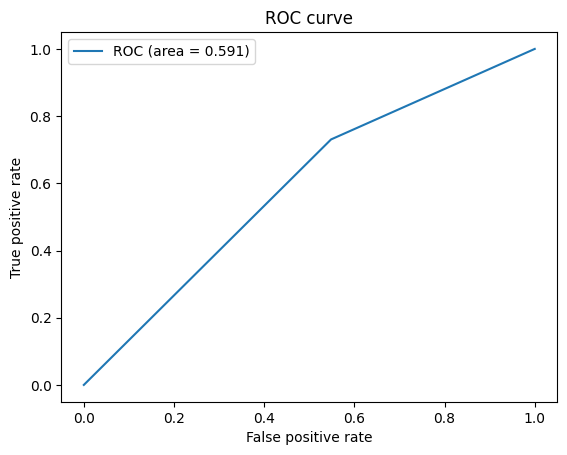

In [316]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Na_Label = test_Na_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Na_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [317]:
import tensorflow as tf
from keras.backend import clear_session

# Clear previous session
clear_session()
tf.keras.backend.clear_session()

# Delete previous model
del model

# 第三份資料集

# PLT

In [318]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing3/Test Data_A1.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_PLT_Label = test_array[:,131]
test_PLT_Label[test_PLT_Label==2]=1
print(test_Features.shape)
print(test_PLT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_PLT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_PLT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_PLT_Label.shape)
cm = pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
1   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
2   2022-08-01     A1    6143  0.000000  0.000000  0.003050  0.011153   
3   2022-09-07     A1    6143  0.000000  0.000000  0.001971  0.008043   
4   2022-08-01     A2    6143  0.148252  0.126552  0.111723  0.096499   
..         ...    ...     ...       ...       ...       ...       ...   
533 2022-12-01     A2  359647  0.142292  0.122239  0.107776  0.093027   
534 2022-12-01     A3  359647  0.165795  0.144012  0.124862  0.113425   
535 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
536 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
537 2022-12-01     A3  359647  0.166244  0.144433  0.125244  0.113740   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.013494  0.017496  0.020375  ...   2

Predict    0   1
Labels          
0        332  11
1        137  58

In [319]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 332 TN: 58 FP: 11 FN: 137


Accuracy=  0.724907063197026
Precision=  0.967930029154519
Recall=  0.7078891257995735
F1 Score=  0.8177339901477831


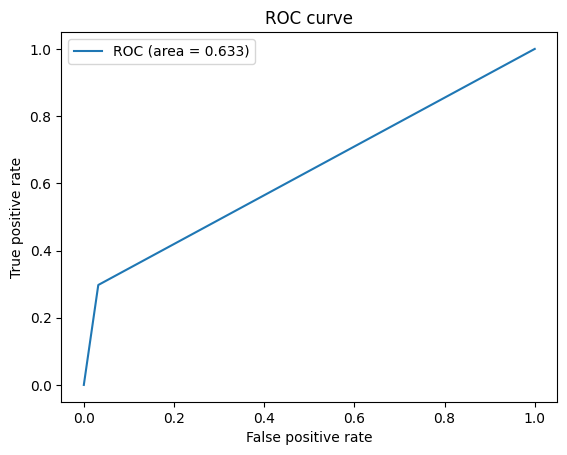

In [320]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_PLT_Label = test_PLT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_PLT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [321]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Aug.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_PLT_Label = test_array[:,131]
test_PLT_Label[test_PLT_Label==2]=1
print(test_Features.shape)
print(test_PLT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_PLT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_PLT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_PLT_Label.shape)
cm = pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400  405       410       415       420  \
0   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003031  0.007161   
1   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
2   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
3   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002464  0.005865   
4   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002149  0.005068   
..         ...    ...     ...  ...  ...       ...       ...       ...   
216 2022-08-01     A1  347741  0.0  0.0  0.000889  0.007565  0.013659   
217 2022-08-01     A1  347741  0.0  0.0  0.000487  0.006754  0.012784   
218 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005869  0.011827   
219 2022-08-01     A1  347741  0.0  0.0  0.000135  0.006321  0.012129   
220 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005827  0.012498   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  TIBC  Fer  
0    0.012492  0.018056  ...   2  0    0  

Predict   0    1
Labels          
0        64   35
1        19  103

In [322]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 64 TN: 103 FP: 35 FN: 19


Accuracy=  0.755656108597285
Precision=  0.6464646464646465
Recall=  0.7710843373493976
F1 Score=  0.7032967032967034


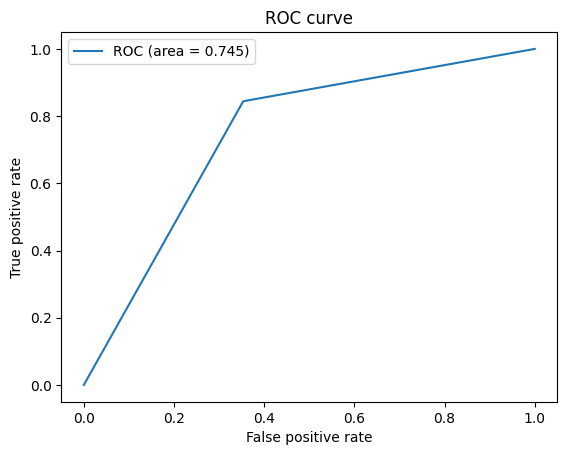

In [323]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_PLT_Label = test_PLT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_PLT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [324]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Sep.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_PLT_Label = test_array[:,131]
test_PLT_Label[test_PLT_Label==2]=1
print(test_Features.shape)
print(test_PLT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_PLT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_PLT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_PLT_Label.shape)
cm = pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400       405       410       415       420  \
0   2022-09-07     A1    6143  0.0  0.000000  0.003416  0.011628  0.016787   
1   2022-09-07     A1    6143  0.0  0.000000  0.003301  0.011208  0.016189   
2   2022-09-07     A1    6143  0.0  0.000000  0.002383  0.009399  0.014325   
3   2022-09-07     A1    6143  0.0  0.000000  0.002479  0.009670  0.014610   
4   2022-09-07     A1    6143  0.0  0.000000  0.002516  0.009545  0.014401   
..         ...    ...     ...  ...       ...       ...       ...       ...   
253 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
254 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
255 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
256 2022-09-07     A1  347741  0.0  0.002485  0.010546  0.020140  0.024983   
257 2022-09-07     A1  347741  0.0  0.002077  0.010145  0.019789  0.024635   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  

Predict   0   1
Labels         
0        87  93
1        42  36

In [325]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 87 TN: 36 FP: 93 FN: 42


Accuracy=  0.47674418604651164
Precision=  0.48333333333333334
Recall=  0.6744186046511628
F1 Score=  0.5631067961165048


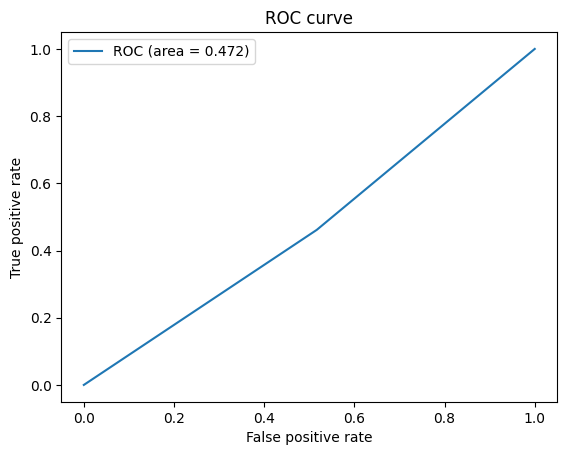

In [326]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_PLT_Label = test_PLT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_PLT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [327]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Oct.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_PLT_Label = test_array[:,131]
test_PLT_Label[test_PLT_Label==2]=1
print(test_Features.shape)
print(test_PLT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_PLT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_PLT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_PLT_Label.shape)
cm = pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
1   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
2   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
3   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
4   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
..         ...    ...     ...       ...       ...       ...       ...   
376 2022-10-07     A1  359546  0.004586  0.003429  0.004329  0.004247   
377 2022-10-07     A1  359546  0.004455  0.003365  0.004407  0.004348   
378 2022-10-07     A1  359546  0.004338  0.003259  0.004238  0.004265   
379 2022-10-07     A1  359546  0.004308  0.003270  0.004318  0.004397   
380 2022-10-07     A1  359546  0.004849  0.003680  0.004640  0.004422   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.002593  0.003662  0.006147  ...   0

Predict   0    1
Labels          
0        71  135
1        70  105

In [328]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 71 TN: 105 FP: 135 FN: 70


Accuracy=  0.46194225721784776
Precision=  0.3446601941747573
Recall=  0.5035460992907801
F1 Score=  0.40922190201729103


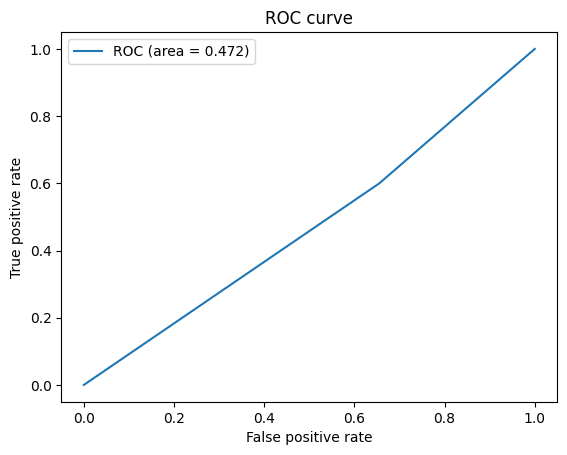

In [329]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_PLT_Label = test_PLT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_PLT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [330]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Dec.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_PLT_Label = test_array[:,131]
test_PLT_Label[test_PLT_Label==2]=1
print(test_Features.shape)
print(test_PLT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_PLT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_PLT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_PLT_Label.shape)
cm = pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_PLT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-12-01     A1   14833  0.000000  0.001545  0.008297  0.015744   
1   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
2   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
3   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
4   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
..         ...    ...     ...       ...       ...       ...       ...   
944 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
945 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
946 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
947 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
948 2022-12-01     A1  349435  0.001541  0.000655  0.002853  0.004389   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.018307  0.017876  0.016148  ...   2

Predict    0    1
Labels           
0        308  341
1         63  237

In [331]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 308 TN: 237 FP: 341 FN: 63


Accuracy=  0.5742887249736565
Precision=  0.4745762711864407
Recall=  0.8301886792452831
F1 Score=  0.6039215686274509


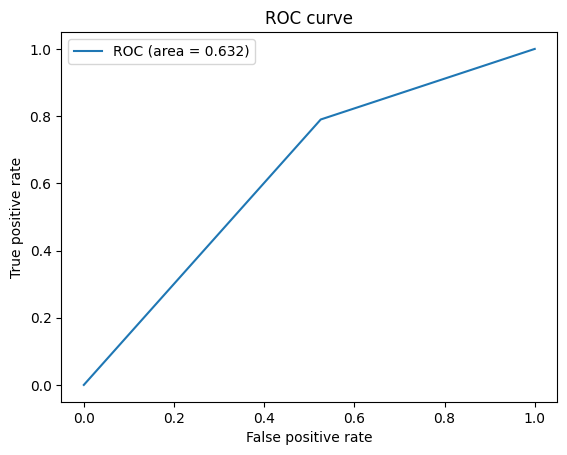

In [332]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_PLT_Label = test_PLT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_PLT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [333]:
import tensorflow as tf
from keras.backend import clear_session

# Clear previous session
clear_session()
tf.keras.backend.clear_session()

# Delete previous model
del model

# Pro

In [334]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing3/Test Data_A1.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Pro_Label = test_array[:,150]
test_Pro_Label[test_Pro_Label==2]=1
print(test_Features.shape)
print(test_Pro_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Pro_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_Pro.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Pro_Label.shape)
cm = pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
1   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
2   2022-08-01     A1    6143  0.000000  0.000000  0.003050  0.011153   
3   2022-09-07     A1    6143  0.000000  0.000000  0.001971  0.008043   
4   2022-08-01     A2    6143  0.148252  0.126552  0.111723  0.096499   
..         ...    ...     ...       ...       ...       ...       ...   
533 2022-12-01     A2  359647  0.142292  0.122239  0.107776  0.093027   
534 2022-12-01     A3  359647  0.165795  0.144012  0.124862  0.113425   
535 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
536 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
537 2022-12-01     A3  359647  0.166244  0.144433  0.125244  0.113740   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.013494  0.017496  0.020375  ...   2

Predict    0    1
Labels           
0        251   72
1        110  105

In [335]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 251 TN: 105 FP: 72 FN: 110


Accuracy=  0.6617100371747212
Precision=  0.7770897832817337
Recall=  0.6952908587257618
F1 Score=  0.7339181286549707


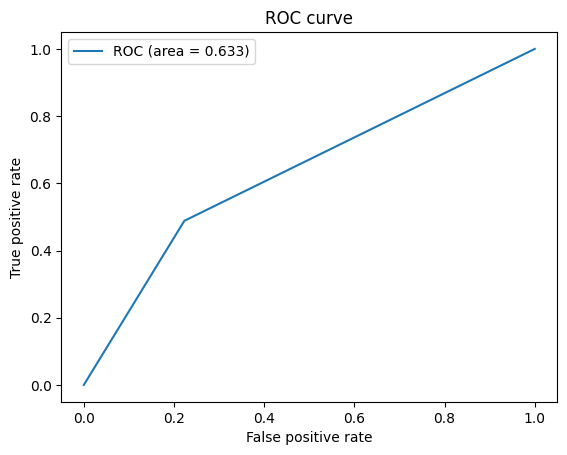

In [336]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Pro_Label = test_Pro_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Pro_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [337]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Aug.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Pro_Label = test_array[:,150]
test_Pro_Label[test_Pro_Label==2]=1
print(test_Features.shape)
print(test_Pro_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Pro_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_Pro.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Pro_Label.shape)
cm = pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400  405       410       415       420  \
0   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003031  0.007161   
1   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
2   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
3   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002464  0.005865   
4   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002149  0.005068   
..         ...    ...     ...  ...  ...       ...       ...       ...   
216 2022-08-01     A1  347741  0.0  0.0  0.000889  0.007565  0.013659   
217 2022-08-01     A1  347741  0.0  0.0  0.000487  0.006754  0.012784   
218 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005869  0.011827   
219 2022-08-01     A1  347741  0.0  0.0  0.000135  0.006321  0.012129   
220 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005827  0.012498   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  TIBC  Fer  
0    0.012492  0.018056  ...   2  0    0  

Predict   0   1
Labels         
0        89  85
1        24  23

In [338]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 89 TN: 23 FP: 85 FN: 24


Accuracy=  0.5067873303167421
Precision=  0.5114942528735632
Recall=  0.7876106194690266
F1 Score=  0.6202090592334495


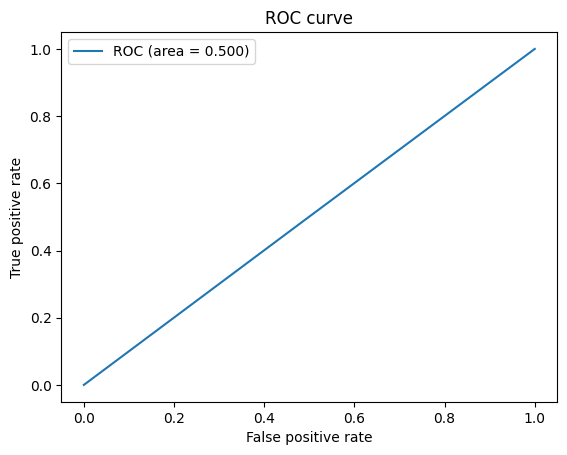

In [339]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Pro_Label = test_Pro_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Pro_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [340]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Sep.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Pro_Label = test_array[:,150]
test_Pro_Label[test_Pro_Label==2]=1
print(test_Features.shape)
print(test_Pro_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Pro_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_Pro.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Pro_Label.shape)
cm = pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400       405       410       415       420  \
0   2022-09-07     A1    6143  0.0  0.000000  0.003416  0.011628  0.016787   
1   2022-09-07     A1    6143  0.0  0.000000  0.003301  0.011208  0.016189   
2   2022-09-07     A1    6143  0.0  0.000000  0.002383  0.009399  0.014325   
3   2022-09-07     A1    6143  0.0  0.000000  0.002479  0.009670  0.014610   
4   2022-09-07     A1    6143  0.0  0.000000  0.002516  0.009545  0.014401   
..         ...    ...     ...  ...       ...       ...       ...       ...   
253 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
254 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
255 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
256 2022-09-07     A1  347741  0.0  0.002485  0.010546  0.020140  0.024983   
257 2022-09-07     A1  347741  0.0  0.002077  0.010145  0.019789  0.024635   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  

Predict   0    1
Labels          
0        78  104
1        72    4

In [341]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 78 TN: 4 FP: 104 FN: 72


Accuracy=  0.3178294573643411
Precision=  0.42857142857142855
Recall=  0.52
F1 Score=  0.46987951807228917


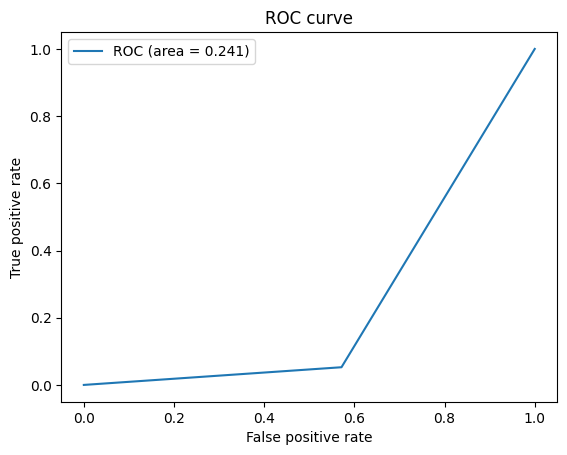

In [342]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Pro_Label = test_Pro_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Pro_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [343]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Oct.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Pro_Label = test_array[:,150]
test_Pro_Label[test_Pro_Label==2]=1
print(test_Features.shape)
print(test_Pro_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Pro_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_Pro.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Pro_Label.shape)
cm = pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
1   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
2   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
3   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
4   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
..         ...    ...     ...       ...       ...       ...       ...   
376 2022-10-07     A1  359546  0.004586  0.003429  0.004329  0.004247   
377 2022-10-07     A1  359546  0.004455  0.003365  0.004407  0.004348   
378 2022-10-07     A1  359546  0.004338  0.003259  0.004238  0.004265   
379 2022-10-07     A1  359546  0.004308  0.003270  0.004318  0.004397   
380 2022-10-07     A1  359546  0.004849  0.003680  0.004640  0.004422   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.002593  0.003662  0.006147  ...   0

Predict    0    1
Labels           
0        163  113
1          0  105

In [344]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 163 TN: 105 FP: 113 FN: 0


Accuracy=  0.7034120734908137
Precision=  0.5905797101449275
Recall=  1.0
F1 Score=  0.7425968109339408


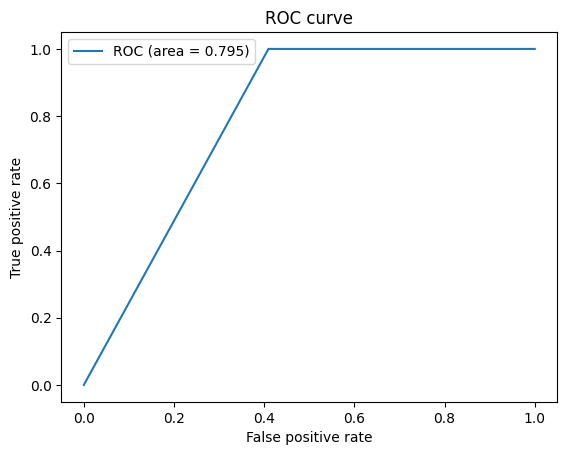

In [345]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Pro_Label = test_Pro_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Pro_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [346]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Dec.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Pro_Label = test_array[:,150]
test_Pro_Label[test_Pro_Label==2]=1
print(test_Features.shape)
print(test_Pro_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Pro_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_Pro.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Pro_Label.shape)
cm = pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Pro_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-12-01     A1   14833  0.000000  0.001545  0.008297  0.015744   
1   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
2   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
3   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
4   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
..         ...    ...     ...       ...       ...       ...       ...   
944 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
945 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
946 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
947 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
948 2022-12-01     A1  349435  0.001541  0.000655  0.002853  0.004389   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.018307  0.017876  0.016148  ...   2

Predict    0    1
Labels           
0        135  364
1         91  359

In [347]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 135 TN: 359 FP: 364 FN: 91


Accuracy=  0.5205479452054794
Precision=  0.27054108216432865
Recall=  0.5973451327433629
F1 Score=  0.3724137931034483


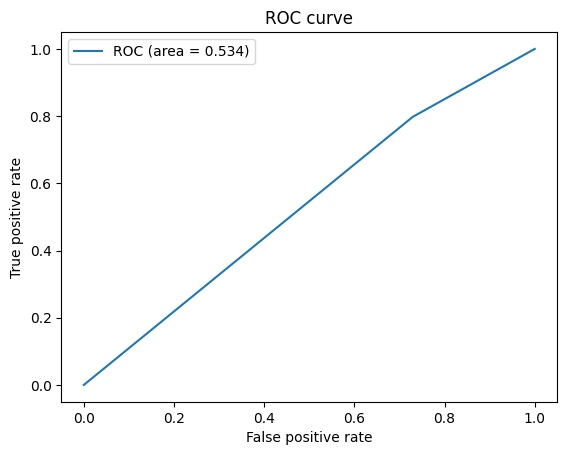

In [348]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Pro_Label = test_Pro_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Pro_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [349]:
import tensorflow as tf
from keras.backend import clear_session

# Clear previous session
clear_session()
tf.keras.backend.clear_session()

# Delete previous model
del model

# Ca

In [350]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing3/Test Data_A1.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Ca_Label = test_array[:,146]
test_Ca_Label[test_Ca_Label==2]=1
print(test_Features.shape)
print(test_Ca_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Ca_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_Ca.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Ca_Label.shape)
cm = pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
1   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
2   2022-08-01     A1    6143  0.000000  0.000000  0.003050  0.011153   
3   2022-09-07     A1    6143  0.000000  0.000000  0.001971  0.008043   
4   2022-08-01     A2    6143  0.148252  0.126552  0.111723  0.096499   
..         ...    ...     ...       ...       ...       ...       ...   
533 2022-12-01     A2  359647  0.142292  0.122239  0.107776  0.093027   
534 2022-12-01     A3  359647  0.165795  0.144012  0.124862  0.113425   
535 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
536 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
537 2022-12-01     A3  359647  0.166244  0.144433  0.125244  0.113740   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.013494  0.017496  0.020375  ...   2

Predict    0   1
Labels          
0        303  34
1        108  93

In [351]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 303 TN: 93 FP: 34 FN: 108


Accuracy=  0.7360594795539034
Precision=  0.8991097922848664
Recall=  0.7372262773722628
F1 Score=  0.8101604278074865


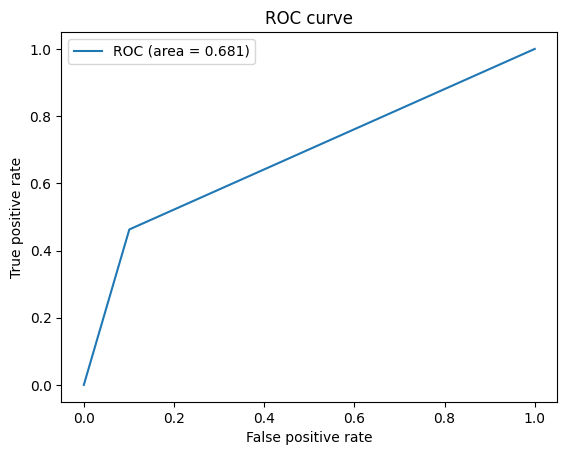

In [352]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Ca_Label = test_Ca_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Ca_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [353]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Aug.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Ca_Label = test_array[:,146]
test_Ca_Label[test_Ca_Label==2]=1
print(test_Features.shape)
print(test_Ca_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Ca_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_Ca.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Ca_Label.shape)
cm = pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400  405       410       415       420  \
0   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003031  0.007161   
1   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
2   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
3   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002464  0.005865   
4   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002149  0.005068   
..         ...    ...     ...  ...  ...       ...       ...       ...   
216 2022-08-01     A1  347741  0.0  0.0  0.000889  0.007565  0.013659   
217 2022-08-01     A1  347741  0.0  0.0  0.000487  0.006754  0.012784   
218 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005869  0.011827   
219 2022-08-01     A1  347741  0.0  0.0  0.000135  0.006321  0.012129   
220 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005827  0.012498   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  TIBC  Fer  
0    0.012492  0.018056  ...   2  0    0  

Predict    0   1
Labels          
0        113  12
1         61  35

In [354]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 113 TN: 35 FP: 12 FN: 61


Accuracy=  0.669683257918552
Precision=  0.904
Recall=  0.6494252873563219
F1 Score=  0.7558528428093646


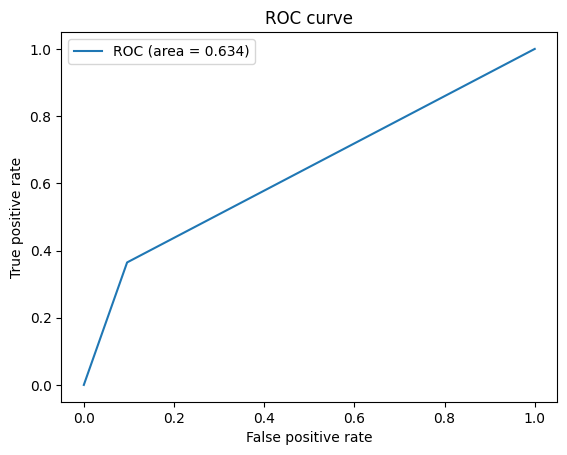

In [355]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Ca_Label = test_Ca_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Ca_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [356]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Sep.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Ca_Label = test_array[:,146]
test_Ca_Label[test_Ca_Label==2]=1
print(test_Features.shape)
print(test_Ca_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Ca_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_Ca.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Ca_Label.shape)
cm = pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400       405       410       415       420  \
0   2022-09-07     A1    6143  0.0  0.000000  0.003416  0.011628  0.016787   
1   2022-09-07     A1    6143  0.0  0.000000  0.003301  0.011208  0.016189   
2   2022-09-07     A1    6143  0.0  0.000000  0.002383  0.009399  0.014325   
3   2022-09-07     A1    6143  0.0  0.000000  0.002479  0.009670  0.014610   
4   2022-09-07     A1    6143  0.0  0.000000  0.002516  0.009545  0.014401   
..         ...    ...     ...  ...       ...       ...       ...       ...   
253 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
254 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
255 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
256 2022-09-07     A1  347741  0.0  0.002485  0.010546  0.020140  0.024983   
257 2022-09-07     A1  347741  0.0  0.002077  0.010145  0.019789  0.024635   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  

Predict   0   1
Labels         
0        99  31
1        43  85

In [357]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 99 TN: 85 FP: 31 FN: 43


Accuracy=  0.7131782945736435
Precision=  0.7615384615384615
Recall=  0.6971830985915493
F1 Score=  0.7279411764705882


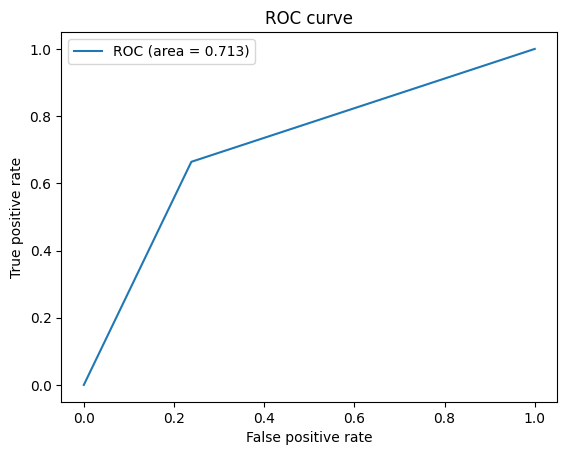

In [358]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Ca_Label = test_Ca_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Ca_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [359]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Oct.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Ca_Label = test_array[:,146]
test_Ca_Label[test_Ca_Label==2]=1
print(test_Features.shape)
print(test_Ca_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Ca_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_Ca.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Ca_Label.shape)
cm = pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
1   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
2   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
3   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
4   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
..         ...    ...     ...       ...       ...       ...       ...   
376 2022-10-07     A1  359546  0.004586  0.003429  0.004329  0.004247   
377 2022-10-07     A1  359546  0.004455  0.003365  0.004407  0.004348   
378 2022-10-07     A1  359546  0.004338  0.003259  0.004238  0.004265   
379 2022-10-07     A1  359546  0.004308  0.003270  0.004318  0.004397   
380 2022-10-07     A1  359546  0.004849  0.003680  0.004640  0.004422   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.002593  0.003662  0.006147  ...   0

Predict    0    1
Labels           
0        182   46
1         25  128

In [360]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 182 TN: 128 FP: 46 FN: 25


Accuracy=  0.8136482939632546
Precision=  0.7982456140350878
Recall=  0.8792270531400966
F1 Score=  0.8367816091954023


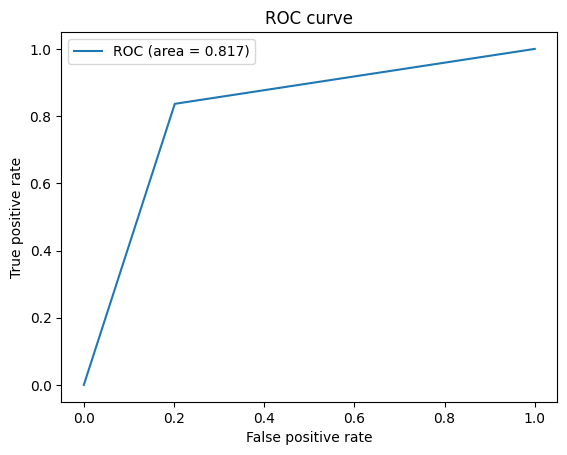

In [361]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Ca_Label = test_Ca_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Ca_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [362]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Dec.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Ca_Label = test_array[:,146]
test_Ca_Label[test_Ca_Label==2]=1
print(test_Features.shape)
print(test_Ca_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Ca_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_Ca.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Ca_Label.shape)
cm = pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Ca_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-12-01     A1   14833  0.000000  0.001545  0.008297  0.015744   
1   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
2   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
3   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
4   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
..         ...    ...     ...       ...       ...       ...       ...   
944 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
945 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
946 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
947 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
948 2022-12-01     A1  349435  0.001541  0.000655  0.002853  0.004389   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.018307  0.017876  0.016148  ...   2

Predict    0    1
Labels           
0        620   79
1         87  163

In [363]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 620 TN: 163 FP: 79 FN: 87


Accuracy=  0.8250790305584826
Precision=  0.8869814020028612
Recall=  0.8769448373408769
F1 Score=  0.8819345661450925


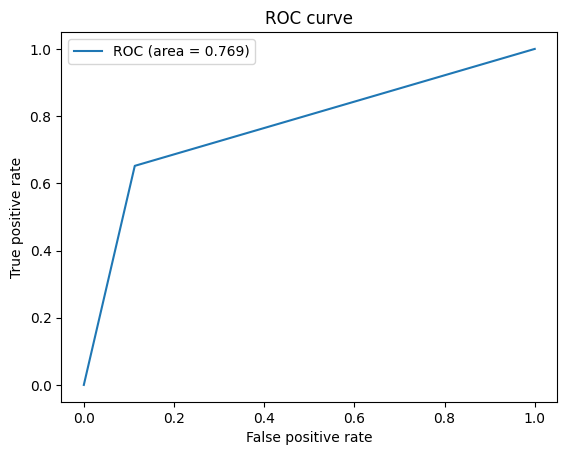

In [364]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Ca_Label = test_Ca_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Ca_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [365]:
import tensorflow as tf
from keras.backend import clear_session

# Clear previous session
clear_session()
tf.keras.backend.clear_session()

# Delete previous model
del model

# P

In [366]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing3/Test Data_A1.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_P_Label = test_array[:,147]
test_P_Label[test_P_Label==2]=1
print(test_Features.shape)
print(test_P_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_P_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_P.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_P_Label.shape)
cm = pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
1   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
2   2022-08-01     A1    6143  0.000000  0.000000  0.003050  0.011153   
3   2022-09-07     A1    6143  0.000000  0.000000  0.001971  0.008043   
4   2022-08-01     A2    6143  0.148252  0.126552  0.111723  0.096499   
..         ...    ...     ...       ...       ...       ...       ...   
533 2022-12-01     A2  359647  0.142292  0.122239  0.107776  0.093027   
534 2022-12-01     A3  359647  0.165795  0.144012  0.124862  0.113425   
535 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
536 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
537 2022-12-01     A3  359647  0.166244  0.144433  0.125244  0.113740   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.013494  0.017496  0.020375  ...   2

Predict    0    1
Labels           
0        160  111
1         93  174

In [367]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 160 TN: 174 FP: 111 FN: 93


Accuracy=  0.620817843866171
Precision=  0.5904059040590406
Recall=  0.6324110671936759
F1 Score=  0.6106870229007633


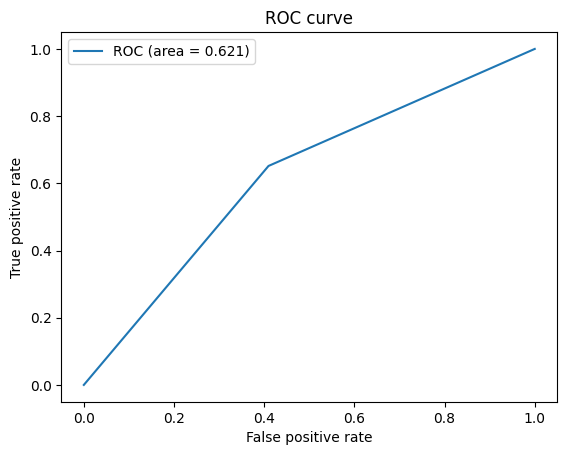

In [368]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_P_Label = test_P_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_P_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [369]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Aug.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_P_Label = test_array[:,147]
test_P_Label[test_P_Label==2]=1
print(test_Features.shape)
print(test_P_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_P_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_P.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_P_Label.shape)
cm = pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400  405       410       415       420  \
0   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003031  0.007161   
1   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
2   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
3   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002464  0.005865   
4   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002149  0.005068   
..         ...    ...     ...  ...  ...       ...       ...       ...   
216 2022-08-01     A1  347741  0.0  0.0  0.000889  0.007565  0.013659   
217 2022-08-01     A1  347741  0.0  0.0  0.000487  0.006754  0.012784   
218 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005869  0.011827   
219 2022-08-01     A1  347741  0.0  0.0  0.000135  0.006321  0.012129   
220 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005827  0.012498   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  TIBC  Fer  
0    0.012492  0.018056  ...   2  0    0  

Predict    0   1
Labels          
0        114   8
1         74  25

In [370]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 114 TN: 25 FP: 8 FN: 74


Accuracy=  0.6289592760180995
Precision=  0.9344262295081968
Recall=  0.6063829787234043
F1 Score=  0.7354838709677419


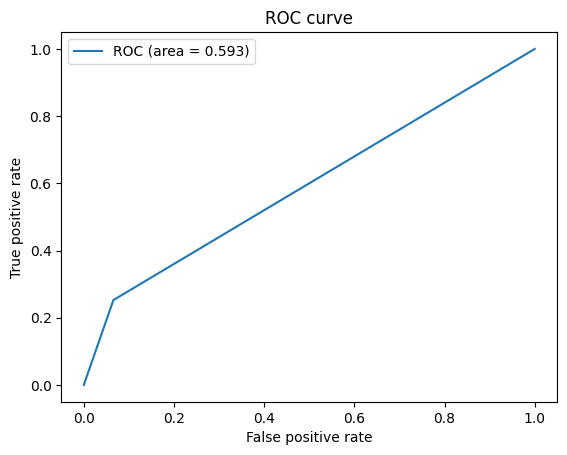

In [371]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_P_Label = test_P_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_P_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [372]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Sep.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_P_Label = test_array[:,147]
test_P_Label[test_P_Label==2]=1
print(test_Features.shape)
print(test_P_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_P_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_P.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_P_Label.shape)
cm = pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400       405       410       415       420  \
0   2022-09-07     A1    6143  0.0  0.000000  0.003416  0.011628  0.016787   
1   2022-09-07     A1    6143  0.0  0.000000  0.003301  0.011208  0.016189   
2   2022-09-07     A1    6143  0.0  0.000000  0.002383  0.009399  0.014325   
3   2022-09-07     A1    6143  0.0  0.000000  0.002479  0.009670  0.014610   
4   2022-09-07     A1    6143  0.0  0.000000  0.002516  0.009545  0.014401   
..         ...    ...     ...  ...       ...       ...       ...       ...   
253 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
254 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
255 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
256 2022-09-07     A1  347741  0.0  0.002485  0.010546  0.020140  0.024983   
257 2022-09-07     A1  347741  0.0  0.002077  0.010145  0.019789  0.024635   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  

Predict    0   1
Labels          
0        125   3
1         80  50

In [373]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 125 TN: 50 FP: 3 FN: 80


Accuracy=  0.6782945736434108
Precision=  0.9765625
Recall=  0.6097560975609756
F1 Score=  0.7507507507507507


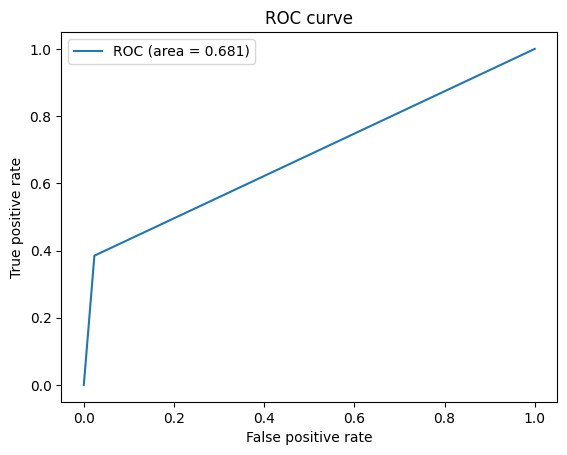

In [374]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_P_Label = test_P_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_P_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [375]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Oct.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_P_Label = test_array[:,147]
test_P_Label[test_P_Label==2]=1
print(test_Features.shape)
print(test_P_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_P_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_P.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_P_Label.shape)
cm = pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
1   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
2   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
3   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
4   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
..         ...    ...     ...       ...       ...       ...       ...   
376 2022-10-07     A1  359546  0.004586  0.003429  0.004329  0.004247   
377 2022-10-07     A1  359546  0.004455  0.003365  0.004407  0.004348   
378 2022-10-07     A1  359546  0.004338  0.003259  0.004238  0.004265   
379 2022-10-07     A1  359546  0.004308  0.003270  0.004318  0.004397   
380 2022-10-07     A1  359546  0.004849  0.003680  0.004640  0.004422   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.002593  0.003662  0.006147  ...   0

Predict    0   1
Labels          
0        133  45
1        131  72

In [376]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 133 TN: 72 FP: 45 FN: 131


Accuracy=  0.5380577427821522
Precision=  0.7471910112359551
Recall=  0.5037878787878788
F1 Score=  0.6018099547511312


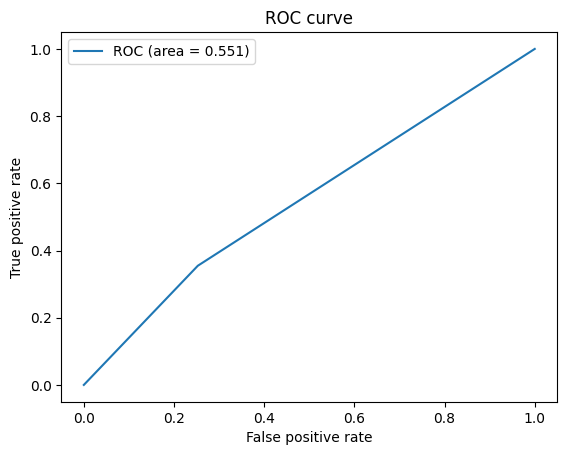

In [377]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_P_Label = test_P_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_P_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [378]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Dec.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_P_Label = test_array[:,147]
test_P_Label[test_P_Label==2]=1
print(test_Features.shape)
print(test_P_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_P_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_P.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_P_Label.shape)
cm = pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_P_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-12-01     A1   14833  0.000000  0.001545  0.008297  0.015744   
1   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
2   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
3   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
4   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
..         ...    ...     ...       ...       ...       ...       ...   
944 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
945 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
946 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
947 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
948 2022-12-01     A1  349435  0.001541  0.000655  0.002853  0.004389   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.018307  0.017876  0.016148  ...   2

Predict    0    1
Labels           
0        359   66
1        371  153

In [379]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 359 TN: 153 FP: 66 FN: 371


Accuracy=  0.5395152792413066
Precision=  0.8447058823529412
Recall=  0.4917808219178082
F1 Score=  0.6216450216450217


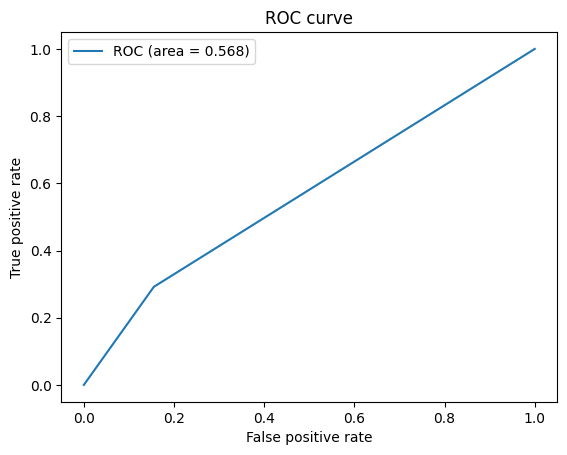

In [380]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_P_Label = test_P_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_P_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [381]:
import tensorflow as tf
from keras.backend import clear_session

# Clear previous session
clear_session()
tf.keras.backend.clear_session()

# Delete previous model
del model

# RBC

In [382]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing3/Test Data_A1.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_RBC.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
cm = pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
1   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
2   2022-08-01     A1    6143  0.000000  0.000000  0.003050  0.011153   
3   2022-09-07     A1    6143  0.000000  0.000000  0.001971  0.008043   
4   2022-08-01     A2    6143  0.148252  0.126552  0.111723  0.096499   
..         ...    ...     ...       ...       ...       ...       ...   
533 2022-12-01     A2  359647  0.142292  0.122239  0.107776  0.093027   
534 2022-12-01     A3  359647  0.165795  0.144012  0.124862  0.113425   
535 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
536 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
537 2022-12-01     A3  359647  0.166244  0.144433  0.125244  0.113740   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.013494  0.017496  0.020375  ...   2

Predict    0    1
Labels           
0        127  105
1         72  234

In [383]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 127 TN: 234 FP: 105 FN: 72


Accuracy=  0.671003717472119
Precision=  0.5474137931034483
Recall=  0.6381909547738693
F1 Score=  0.5893271461716937


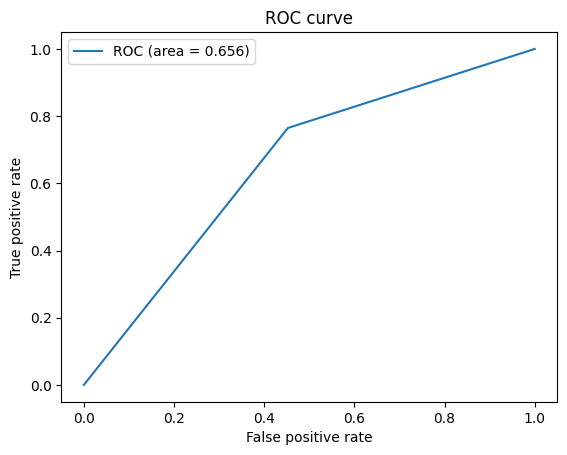

In [384]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_RBC_Label = test_RBC_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_RBC_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [385]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Aug.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_RBC.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
cm = pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400  405       410       415       420  \
0   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003031  0.007161   
1   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
2   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
3   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002464  0.005865   
4   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002149  0.005068   
..         ...    ...     ...  ...  ...       ...       ...       ...   
216 2022-08-01     A1  347741  0.0  0.0  0.000889  0.007565  0.013659   
217 2022-08-01     A1  347741  0.0  0.0  0.000487  0.006754  0.012784   
218 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005869  0.011827   
219 2022-08-01     A1  347741  0.0  0.0  0.000135  0.006321  0.012129   
220 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005827  0.012498   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  TIBC  Fer  
0    0.012492  0.018056  ...   2  0    0  

Predict   0    1
Labels          
0         7   68
1        28  118

In [386]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 7 TN: 118 FP: 68 FN: 28


Accuracy=  0.5656108597285068
Precision=  0.09333333333333334
Recall=  0.2
F1 Score=  0.1272727272727273


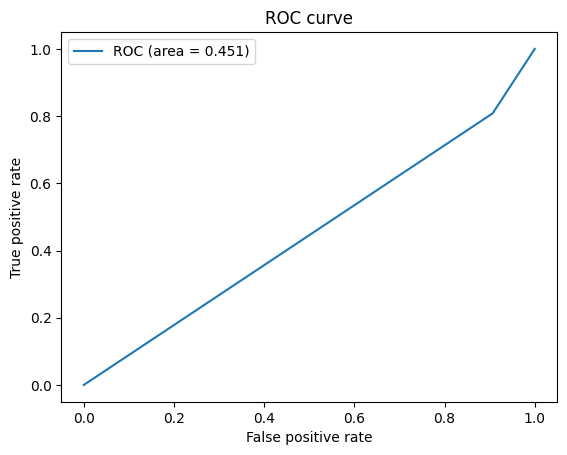

In [387]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_RBC_Label = test_RBC_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_RBC_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [388]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Sep.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_RBC.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
cm = pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400       405       410       415       420  \
0   2022-09-07     A1    6143  0.0  0.000000  0.003416  0.011628  0.016787   
1   2022-09-07     A1    6143  0.0  0.000000  0.003301  0.011208  0.016189   
2   2022-09-07     A1    6143  0.0  0.000000  0.002383  0.009399  0.014325   
3   2022-09-07     A1    6143  0.0  0.000000  0.002479  0.009670  0.014610   
4   2022-09-07     A1    6143  0.0  0.000000  0.002516  0.009545  0.014401   
..         ...    ...     ...  ...       ...       ...       ...       ...   
253 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
254 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
255 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
256 2022-09-07     A1  347741  0.0  0.002485  0.010546  0.020140  0.024983   
257 2022-09-07     A1  347741  0.0  0.002077  0.010145  0.019789  0.024635   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  

Predict   0    1
Labels          
0         3  127
1        28  100

In [389]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 3 TN: 100 FP: 127 FN: 28


Accuracy=  0.3992248062015504
Precision=  0.023076923076923078
Recall=  0.0967741935483871
F1 Score=  0.037267080745341616


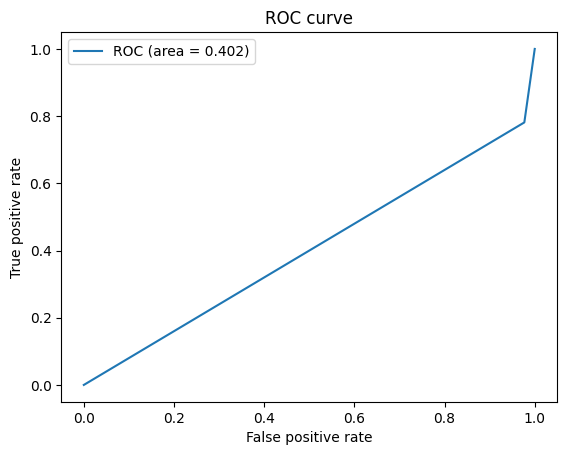

In [390]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_RBC_Label = test_RBC_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_RBC_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [391]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Oct.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_RBC.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
cm = pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
1   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
2   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
3   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
4   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
..         ...    ...     ...       ...       ...       ...       ...   
376 2022-10-07     A1  359546  0.004586  0.003429  0.004329  0.004247   
377 2022-10-07     A1  359546  0.004455  0.003365  0.004407  0.004348   
378 2022-10-07     A1  359546  0.004338  0.003259  0.004238  0.004265   
379 2022-10-07     A1  359546  0.004308  0.003270  0.004318  0.004397   
380 2022-10-07     A1  359546  0.004849  0.003680  0.004640  0.004422   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.002593  0.003662  0.006147  ...   0

Predict   0    1
Labels          
0        76  124
1         7  174

In [392]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 76 TN: 174 FP: 124 FN: 7


Accuracy=  0.6561679790026247
Precision=  0.38
Recall=  0.9156626506024096
F1 Score=  0.5371024734982331


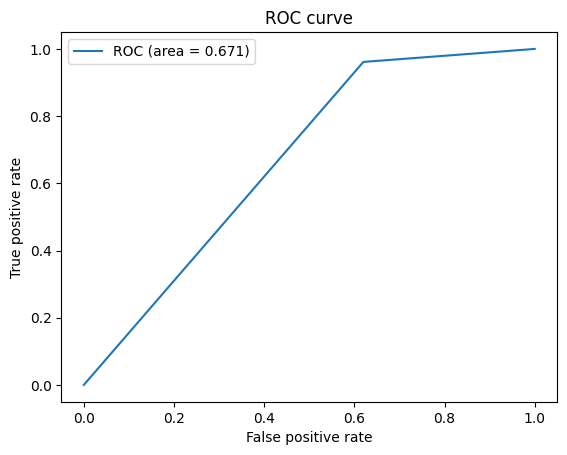

In [393]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_RBC_Label = test_RBC_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_RBC_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [394]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Dec.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_RBC_Label = test_array[:,125]
test_RBC_Label[test_RBC_Label==2]=1
print(test_Features.shape)
print(test_RBC_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_RBC_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_RBC.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_RBC_Label.shape)
cm = pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_RBC_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-12-01     A1   14833  0.000000  0.001545  0.008297  0.015744   
1   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
2   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
3   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
4   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
..         ...    ...     ...       ...       ...       ...       ...   
944 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
945 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
946 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
947 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
948 2022-12-01     A1  349435  0.001541  0.000655  0.002853  0.004389   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.018307  0.017876  0.016148  ...   2

Predict   0    1
Labels          
0        84  315
1        53  497

In [395]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 84 TN: 497 FP: 315 FN: 53


Accuracy=  0.6122233930453108
Precision=  0.21052631578947367
Recall=  0.6131386861313869
F1 Score=  0.3134328358208955


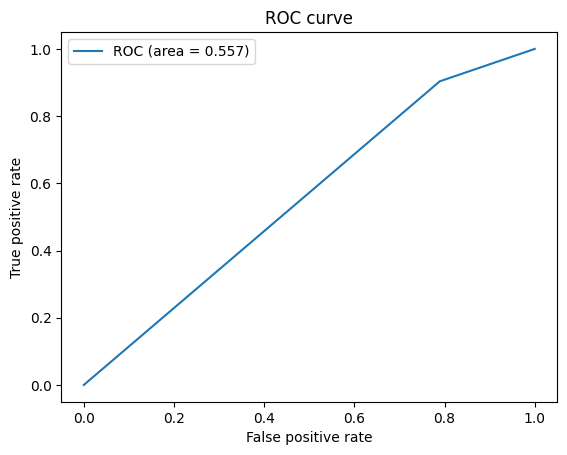

In [396]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_RBC_Label = test_RBC_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_RBC_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [397]:
import tensorflow as tf
from keras.backend import clear_session

# Clear previous session
clear_session()
tf.keras.backend.clear_session()

# Delete previous model
del model

# GOT

In [398]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing3/Test Data_A1.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_GOT_Label = test_array[:,141]
test_GOT_Label[test_GOT_Label==2]=1
print(test_Features.shape)
print(test_GOT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_GOT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_GOT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_GOT_Label.shape)
cm = pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
1   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
2   2022-08-01     A1    6143  0.000000  0.000000  0.003050  0.011153   
3   2022-09-07     A1    6143  0.000000  0.000000  0.001971  0.008043   
4   2022-08-01     A2    6143  0.148252  0.126552  0.111723  0.096499   
..         ...    ...     ...       ...       ...       ...       ...   
533 2022-12-01     A2  359647  0.142292  0.122239  0.107776  0.093027   
534 2022-12-01     A3  359647  0.165795  0.144012  0.124862  0.113425   
535 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
536 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
537 2022-12-01     A3  359647  0.166244  0.144433  0.125244  0.113740   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.013494  0.017496  0.020375  ...   2

Predict    0   1
Labels          
0        265  57
1        154  62

In [399]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 265 TN: 62 FP: 57 FN: 154


Accuracy=  0.6078066914498141
Precision=  0.8229813664596274
Recall=  0.6324582338902148
F1 Score=  0.7152496626180838


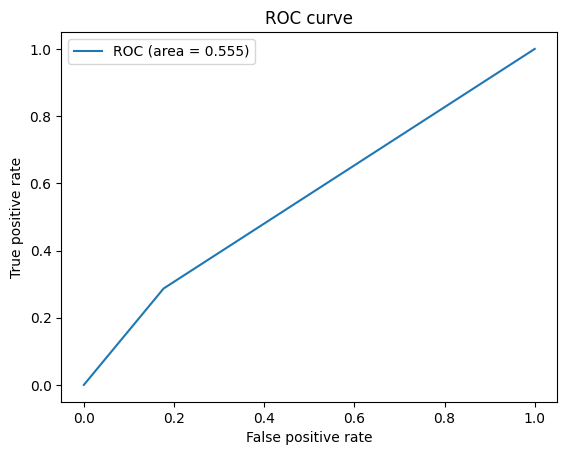

In [400]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_GOT_Label = test_GOT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_GOT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [401]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Aug.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_GOT_Label = test_array[:,141]
test_GOT_Label[test_GOT_Label==2]=1
print(test_Features.shape)
print(test_GOT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_GOT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_GOT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_GOT_Label.shape)
cm = pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400  405       410       415       420  \
0   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003031  0.007161   
1   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
2   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
3   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002464  0.005865   
4   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002149  0.005068   
..         ...    ...     ...  ...  ...       ...       ...       ...   
216 2022-08-01     A1  347741  0.0  0.0  0.000889  0.007565  0.013659   
217 2022-08-01     A1  347741  0.0  0.0  0.000487  0.006754  0.012784   
218 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005869  0.011827   
219 2022-08-01     A1  347741  0.0  0.0  0.000135  0.006321  0.012129   
220 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005827  0.012498   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  TIBC  Fer  
0    0.012492  0.018056  ...   2  0    0  

Predict   0   1
Labels         
0        80  17
1        99  25

In [402]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 80 TN: 25 FP: 17 FN: 99


Accuracy=  0.4751131221719457
Precision=  0.8247422680412371
Recall=  0.44692737430167595
F1 Score=  0.5797101449275363


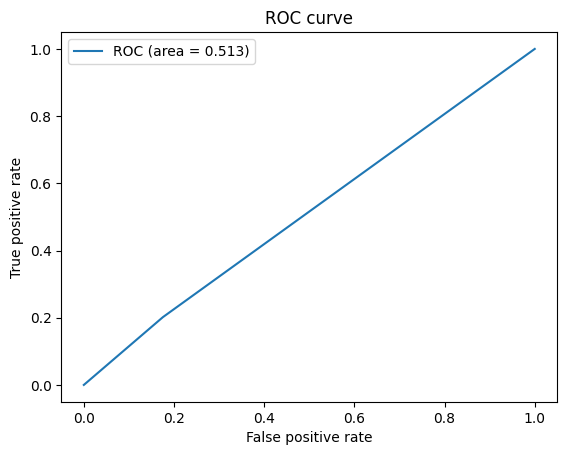

In [403]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_GOT_Label = test_GOT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_GOT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [404]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Sep.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_GOT_Label = test_array[:,141]
test_GOT_Label[test_GOT_Label==2]=1
print(test_Features.shape)
print(test_GOT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_GOT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_GOT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_GOT_Label.shape)
cm = pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400       405       410       415       420  \
0   2022-09-07     A1    6143  0.0  0.000000  0.003416  0.011628  0.016787   
1   2022-09-07     A1    6143  0.0  0.000000  0.003301  0.011208  0.016189   
2   2022-09-07     A1    6143  0.0  0.000000  0.002383  0.009399  0.014325   
3   2022-09-07     A1    6143  0.0  0.000000  0.002479  0.009670  0.014610   
4   2022-09-07     A1    6143  0.0  0.000000  0.002516  0.009545  0.014401   
..         ...    ...     ...  ...       ...       ...       ...       ...   
253 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
254 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
255 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
256 2022-09-07     A1  347741  0.0  0.002485  0.010546  0.020140  0.024983   
257 2022-09-07     A1  347741  0.0  0.002077  0.010145  0.019789  0.024635   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  

Predict    0   1
Labels          
0        177   3
1         68  10

In [405]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 177 TN: 10 FP: 3 FN: 68


Accuracy=  0.7248062015503876
Precision=  0.9833333333333333
Recall=  0.7224489795918367
F1 Score=  0.8329411764705883


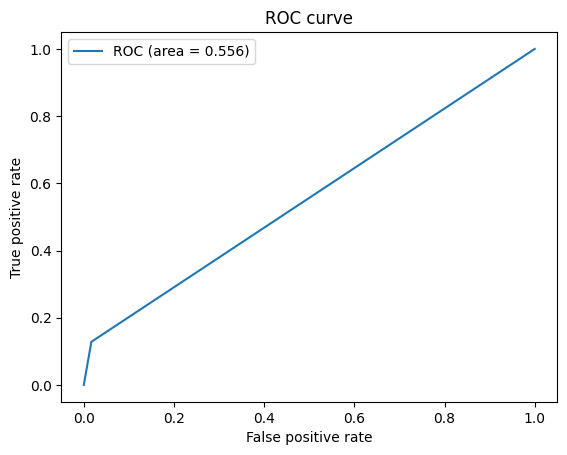

In [406]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_GOT_Label = test_GOT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_GOT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [407]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Oct.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_GOT_Label = test_array[:,141]
test_GOT_Label[test_GOT_Label==2]=1
print(test_Features.shape)
print(test_GOT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_GOT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_GOT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_GOT_Label.shape)
cm = pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
1   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
2   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
3   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
4   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
..         ...    ...     ...       ...       ...       ...       ...   
376 2022-10-07     A1  359546  0.004586  0.003429  0.004329  0.004247   
377 2022-10-07     A1  359546  0.004455  0.003365  0.004407  0.004348   
378 2022-10-07     A1  359546  0.004338  0.003259  0.004238  0.004265   
379 2022-10-07     A1  359546  0.004308  0.003270  0.004318  0.004397   
380 2022-10-07     A1  359546  0.004849  0.003680  0.004640  0.004422   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.002593  0.003662  0.006147  ...   0

Predict    0  1
Labels         
0        229  0
1        147  5

In [408]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 229 TN: 5 FP: 0 FN: 147


Accuracy=  0.6141732283464567
Precision=  1.0
Recall=  0.6090425531914894
F1 Score=  0.7570247933884297


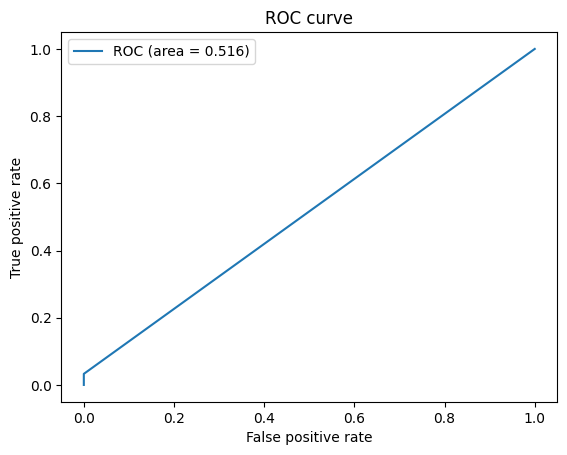

In [409]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_GOT_Label = test_GOT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_GOT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [410]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Dec.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_GOT_Label = test_array[:,141]
test_GOT_Label[test_GOT_Label==2]=1
print(test_Features.shape)
print(test_GOT_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_GOT_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_GOT.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_GOT_Label.shape)
cm = pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_GOT_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-12-01     A1   14833  0.000000  0.001545  0.008297  0.015744   
1   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
2   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
3   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
4   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
..         ...    ...     ...       ...       ...       ...       ...   
944 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
945 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
946 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
947 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
948 2022-12-01     A1  349435  0.001541  0.000655  0.002853  0.004389   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.018307  0.017876  0.016148  ...   2

Predict    0   1
Labels          
0        588  36
1        300  25

In [411]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 588 TN: 25 FP: 36 FN: 300


Accuracy=  0.6459430979978925
Precision=  0.9423076923076923
Recall=  0.6621621621621622
F1 Score=  0.7777777777777779


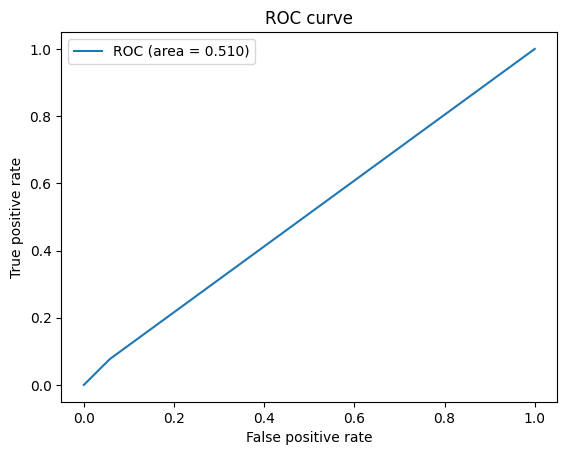

In [412]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_GOT_Label = test_GOT_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_GOT_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [413]:
import tensorflow as tf
from keras.backend import clear_session

# Clear previous session
clear_session()
tf.keras.backend.clear_session()

# Delete previous model
del model

# Na

In [414]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing3/Test Data_A1.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Na_Label = test_array[:,148]
test_Na_Label[test_Na_Label==2]=1
print(test_Features.shape)
print(test_Na_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Na_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_Na.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Na_Label.shape)
cm = pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
1   2022-08-01     A1    6143  0.000000  0.000000  0.001737  0.008512   
2   2022-08-01     A1    6143  0.000000  0.000000  0.003050  0.011153   
3   2022-09-07     A1    6143  0.000000  0.000000  0.001971  0.008043   
4   2022-08-01     A2    6143  0.148252  0.126552  0.111723  0.096499   
..         ...    ...     ...       ...       ...       ...       ...   
533 2022-12-01     A2  359647  0.142292  0.122239  0.107776  0.093027   
534 2022-12-01     A3  359647  0.165795  0.144012  0.124862  0.113425   
535 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
536 2022-12-01     A3  359647  0.165727  0.143984  0.124854  0.113411   
537 2022-12-01     A3  359647  0.166244  0.144433  0.125244  0.113740   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.013494  0.017496  0.020375  ...   2

Predict    0   1
Labels          
0        252  77
1        111  98

In [415]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 252 TN: 98 FP: 77 FN: 111


Accuracy=  0.6505576208178439
Precision=  0.7659574468085106
Recall=  0.6942148760330579
F1 Score=  0.7283236994219653


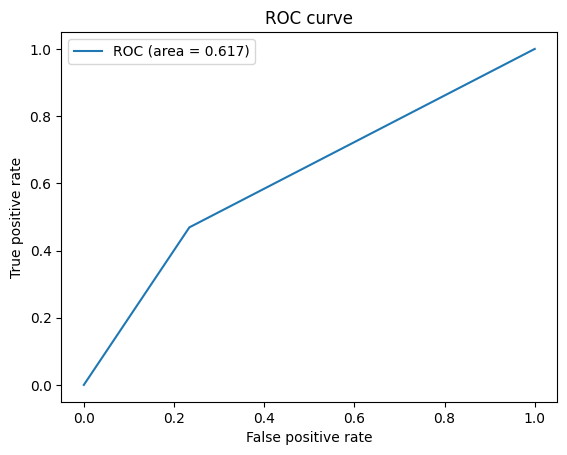

In [416]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Na_Label = test_Na_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Na_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [417]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Aug.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Na_Label = test_array[:,148]
test_Na_Label[test_Na_Label==2]=1
print(test_Features.shape)
print(test_Na_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Na_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_Na.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Na_Label.shape)
cm = pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400  405       410       415       420  \
0   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003031  0.007161   
1   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
2   2022-08-01     A1    6143  0.0  0.0  0.000000  0.003434  0.007563   
3   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002464  0.005865   
4   2022-08-01     A1    6143  0.0  0.0  0.000000  0.002149  0.005068   
..         ...    ...     ...  ...  ...       ...       ...       ...   
216 2022-08-01     A1  347741  0.0  0.0  0.000889  0.007565  0.013659   
217 2022-08-01     A1  347741  0.0  0.0  0.000487  0.006754  0.012784   
218 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005869  0.011827   
219 2022-08-01     A1  347741  0.0  0.0  0.000135  0.006321  0.012129   
220 2022-08-01     A1  347741  0.0  0.0  0.000000  0.005827  0.012498   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  TIBC  Fer  
0    0.012492  0.018056  ...   2  0    0  

Predict   0   1
Labels         
0        74  49
1        36  62

In [418]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 74 TN: 62 FP: 49 FN: 36


Accuracy=  0.6153846153846154
Precision=  0.6016260162601627
Recall=  0.6727272727272727
F1 Score=  0.6351931330472104


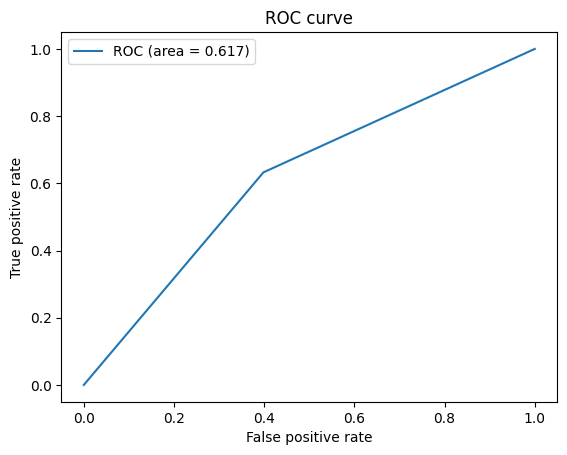

In [419]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Na_Label = test_Na_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Na_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [420]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Sep.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Na_Label = test_array[:,148]
test_Na_Label[test_Na_Label==2]=1
print(test_Features.shape)
print(test_Na_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Na_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_Na.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Na_Label.shape)
cm = pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID  400       405       410       415       420  \
0   2022-09-07     A1    6143  0.0  0.000000  0.003416  0.011628  0.016787   
1   2022-09-07     A1    6143  0.0  0.000000  0.003301  0.011208  0.016189   
2   2022-09-07     A1    6143  0.0  0.000000  0.002383  0.009399  0.014325   
3   2022-09-07     A1    6143  0.0  0.000000  0.002479  0.009670  0.014610   
4   2022-09-07     A1    6143  0.0  0.000000  0.002516  0.009545  0.014401   
..         ...    ...     ...  ...       ...       ...       ...       ...   
253 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
254 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
255 2022-09-07     A1  347741  0.0  0.003182  0.011363  0.020880  0.025536   
256 2022-09-07     A1  347741  0.0  0.002485  0.010546  0.020140  0.024983   
257 2022-09-07     A1  347741  0.0  0.002077  0.010145  0.019789  0.024635   

          425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  

Predict   0   1
Labels         
0        37  91
1        63  67

In [421]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 37 TN: 67 FP: 91 FN: 63


Accuracy=  0.40310077519379844
Precision=  0.2890625
Recall=  0.37
F1 Score=  0.32456140350877194


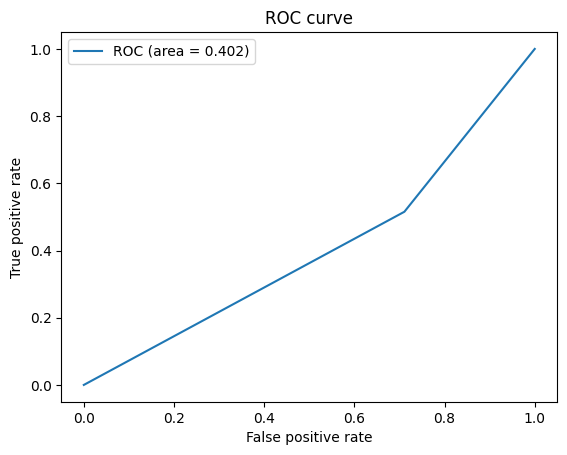

In [422]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Na_Label = test_Na_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Na_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [423]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Oct.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Na_Label = test_array[:,148]
test_Na_Label[test_Na_Label==2]=1
print(test_Features.shape)
print(test_Na_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Na_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_Na.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Na_Label.shape)
cm = pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
1   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
2   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
3   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
4   2022-10-07     A1  106332  0.006964  0.004596  0.004593  0.003177   
..         ...    ...     ...       ...       ...       ...       ...   
376 2022-10-07     A1  359546  0.004586  0.003429  0.004329  0.004247   
377 2022-10-07     A1  359546  0.004455  0.003365  0.004407  0.004348   
378 2022-10-07     A1  359546  0.004338  0.003259  0.004238  0.004265   
379 2022-10-07     A1  359546  0.004308  0.003270  0.004318  0.004397   
380 2022-10-07     A1  359546  0.004849  0.003680  0.004640  0.004422   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.002593  0.003662  0.006147  ...   0

Predict    0   1
Labels          
0        178  78
1         96  29

In [424]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 178 TN: 29 FP: 78 FN: 96


Accuracy=  0.5433070866141733
Precision=  0.6953125
Recall=  0.6496350364963503
F1 Score=  0.6716981132075471


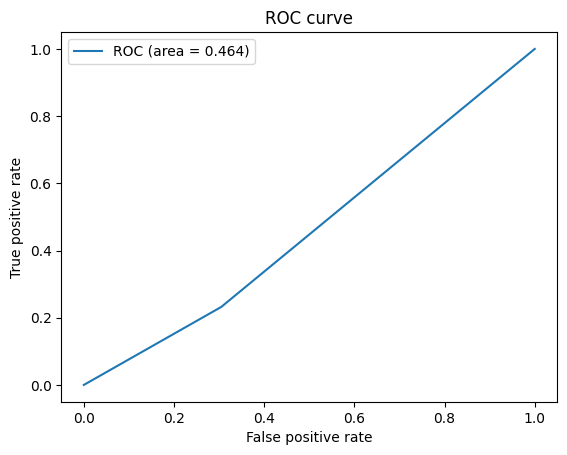

In [425]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Na_Label = test_Na_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Na_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [426]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import sys
from sklearn.preprocessing import MinMaxScaler, normalize
from tensorflow import keras

# min-max
scalar = MinMaxScaler()

test_data_path = "/content/drive/MyDrive/20230419/Data/Testing4/Test Data_A1_Dec.xlsx"
testdata = pd.read_excel(test_data_path, index_col=False)

print(testdata)

test_array = testdata.values
test_Features = test_array[:,3:124]
test_Na_Label = test_array[:,148]
test_Na_Label[test_Na_Label==2]=1
print(test_Features.shape)
print(test_Na_Label)

std_test_Features=scalar.fit_transform(test_Features)
x_test=np.asarray(std_test_Features).astype(np.float32)
# one hot encoding
test_labels = to_categorical(test_Na_Label, num_classes=2)
model = keras.models.load_model("/content/drive/MyDrive/20230419/Model/Testing3/A1_Na.h5")

scores = model.evaluate(x_test,test_labels)
print()
print('Score = ',scores[1])

prediction=model.predict(x_test)
prediction=np.argmax(prediction, axis=1)

print(prediction.shape)
print(test_Na_Label.shape)
cm = pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])
pd.crosstab(test_Na_Label, prediction, colnames=['Predict'], rownames=['Labels'])

         Month Module      ID       400       405       410       415  \
0   2022-12-01     A1   14833  0.000000  0.001545  0.008297  0.015744   
1   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
2   2022-12-01     A1   14833  0.000000  0.001357  0.008201  0.015594   
3   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
4   2022-12-01     A1   14833  0.000000  0.001649  0.008341  0.015598   
..         ...    ...     ...       ...       ...       ...       ...   
944 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
945 2022-12-01     A1  349435  0.001362  0.000554  0.002834  0.004456   
946 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
947 2022-12-01     A1  349435  0.001341  0.000553  0.002850  0.004528   
948 2022-12-01     A1  349435  0.001541  0.000655  0.002853  0.004389   

          420       425       430  ...  Na  K  Pro  Alb  Glo  ALK-P  Fe  UIBC  \
0    0.018307  0.017876  0.016148  ...   2

Predict    0    1
Labels           
0        305  295
1         48  301

In [427]:
from sklearn.metrics import confusion_matrix
cm = cm.values
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN)

TP: 305 TN: 301 FP: 295 FN: 48


Accuracy=  0.6385669125395153
Precision=  0.5083333333333333
Recall=  0.8640226628895185
F1 Score=  0.6400839454354669


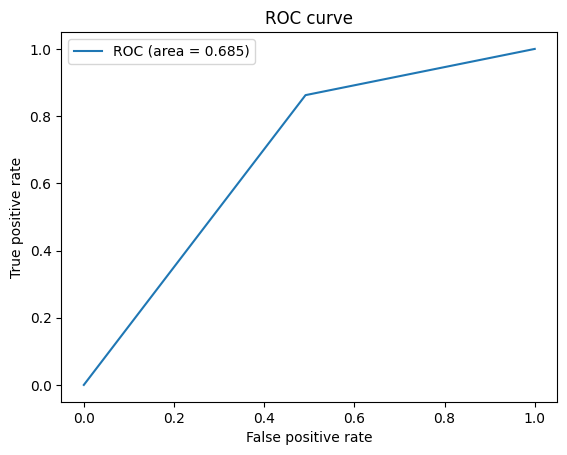

In [428]:
from sklearn.metrics import roc_curve
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc

accuracy = (TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2/(1/precision + 1/recall) 

print("Accuracy= ",accuracy )
print("Precision= ",precision )
print("Recall= ",recall )
print("F1 Score= ",F1 )

test_Na_Label = test_Na_Label.astype(int)
fpr, tpr, thresholds = roc_curve(test_Na_Label, prediction)
auc_keras = auc(fpr,tpr)
plt.figure(1)
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [429]:
import tensorflow as tf
from keras.backend import clear_session

# Clear previous session
clear_session()
tf.keras.backend.clear_session()

# Delete previous model
del model